In [1]:
# import pandas as pd
# Train= pd.read_csv('Train.csv')

In [3]:
# Train.shape

(104660, 14614)

In [4]:
# Train = Train.drop(['Unnamed: 0'],axis=1)
# Train1 = Train[(Train.Time_difference>=360)&(Train.Time_difference<=370)]

In [5]:
# Train1.shape

(75073, 14613)

In [6]:
# Train1.to_csv('一年数据.csv')

In [2]:
import pandas as pd
Train1= pd.read_csv('一年数据.csv')

In [3]:
Train1.shape

(75073, 14614)

In [5]:
### add a new feature for claim and no claim classes
train1 = Train1
def ClaimHappen(Claim_Count):
    if Claim_Count >= 1:
        return 1
    return 0
train1['ClaimHappen']=train1.Claim_Count.apply(ClaimHappen)
Train2 = train1.drop(['Unnamed: 0','Policynumber','Claim_Count','Blame','Total_Incurred'],axis=1)
Train2 = Train2.fillna('0')

In [6]:
Train2.columns[14609]

'ClaimHappen'

In [7]:
import numpy as np
X = np.array(Train2[Train2.columns[0:14608]])
y = np.array (Train2.ClaimHappen)
print (X.shape)
print (y.shape)

(75073, 14608)
(75073,)


In [8]:
from sklearn.cross_validation import train_test_split
X_train_unproc, X_test_unproc,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10)

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# from sklearn.ensemble import GradientBoostingClassifier
# gb_clf = GradientBoostingClassifier(max_depth=4, learning_rate=0.05)
# gb_clf=gb_clf.fit(X_train_unproc,y_train)

In [9]:
from sklearn.externals import joblib
tree=joblib.load('claim_model_tree.m')

In [11]:
###the result of decision tree
y_test_pred = tree.predict(X_test_unproc)
from sklearn.metrics import classification_report
print (classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97     20397
          1       0.94      0.45      0.61      2125

avg / total       0.95      0.95      0.94     22522



In [19]:
tree.score(X_test_unproc,y_test)

0.94556433709262055

In [18]:
tree.score(X_train_unproc,y_train)

0.94489162908412783

In [12]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
roc_auc=metrics.auc(fpr, tpr)

In [13]:
roc_auc

0.72354391216701419

In [17]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr,tpr,'darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Claim Model by Decision Tree ')
plt.legend(loc="lower right")

In [47]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_test_pred )

In [53]:
cnf_matrix

array([[20340,    57],
       [ 1169,   956]])

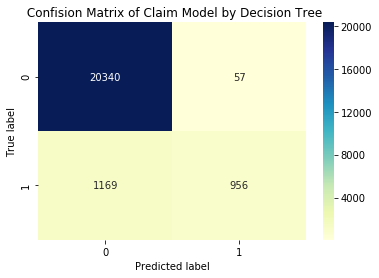

In [111]:
import seaborn as sn
# df_cm = pd.DataFrame(cnf_matrix)
sn.heatmap(cnf_matrix,annot=True, fmt="d", cmap="YlGnBu",linecolor='r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(' Confision Matrix of Claim Model by Decision Tree')

In [15]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,y_test_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.48


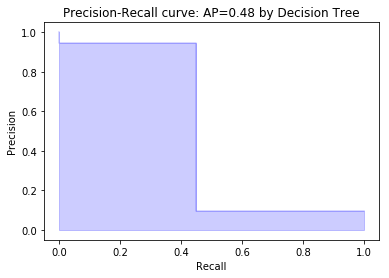

In [20]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f} by Decision Tree'.format(average_precision))

In [8]:
random_clf=joblib.load('claim_model_randomforest.m')

In [96]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(random_state=10,oob_score=True)
random_clf.fit(X_train_unproc,y_train)

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

In [9]:
y_test_pred = random_clf.predict(X_test_unproc)
from sklearn.metrics import classification_report
print (classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     20397
          1       0.95      0.20      0.33      2125

avg / total       0.93      0.92      0.90     22522



In [14]:
random_clf.score(X_test_unproc,y_test)

0.92358582719119087

In [15]:
random_clf.score(X_train_unproc,y_train)

0.98793552929535122

In [98]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
roc_auc=metrics.auc(fpr, tpr)
print(roc_auc)

0.599485218414


In [7]:
from sklearn.externals import joblib

In [19]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred)

In [103]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,y_test_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.27


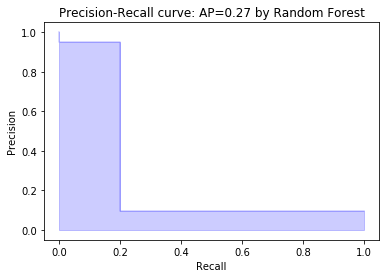

In [112]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f} by Random Forest'.format(average_precision))

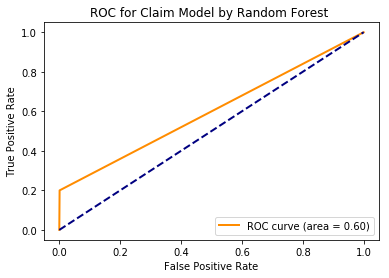

In [105]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr,tpr,'darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Claim Model by Random Forest ')
plt.legend(loc="lower right")

In [11]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_test_pred )
print(cnf_matrix)

[[20376    21]
 [ 1700   425]]


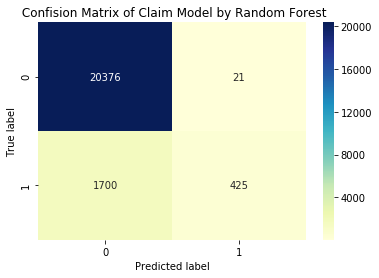

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cnf_matrix,annot=True, fmt="d", cmap="YlGnBu",linecolor='r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(' Confision Matrix of Claim Model by Random Forest')

In [117]:
joblib.dump(random_clf, "claim_model_randomforest.m")

['claim_model_randomforest.m']

In [ ]:
####grediant boosting

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(max_depth=10, learning_rate=0.05)
gb_clf=gb_clf.fit(X_train_unproc,y_train)

In [124]:
y_test_pred = gb_clf.predict(X_test_unproc)
from sklearn.metrics import classification_report
print (classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97     20397
          1       0.97      0.47      0.63      2125

avg / total       0.95      0.95      0.94     22522



In [125]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
roc_auc=metrics.auc(fpr, tpr)
print(roc_auc)

0.733754779394


In [126]:
gb_clf.score(X_test_unproc,y_test)

0.94840600301927003

In [127]:
gb_clf.score(X_train_unproc,y_train)

0.95136153450933381

In [128]:
joblib.dump(gb_clf,"claim_model_gradient_boosting.m")

['claim_model_gradient_boosting.m']

In [129]:
gb=joblib.load('claim_model_gradient_boosting.m')

In [130]:
gb.score(X_test_unproc,y_test)

0.94840600301927003

In [131]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,y_test_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.50


In [132]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred)

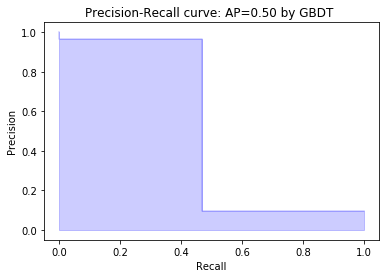

In [134]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f} by GBDT '.format(average_precision))

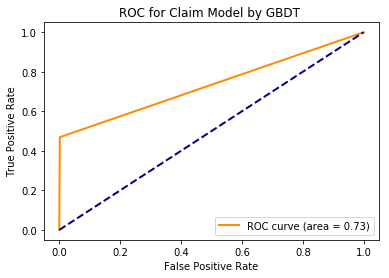

In [135]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr,tpr,'darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Claim Model by GBDT ')
plt.legend(loc="lower right")

In [136]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_test_pred )

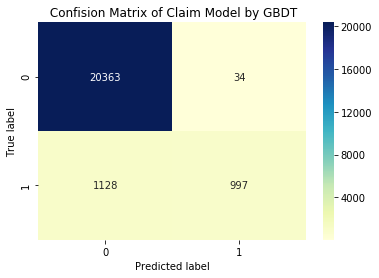

In [137]:
import seaborn as sn
# df_cm = pd.DataFrame(cnf_matrix)
sn.heatmap(cnf_matrix,annot=True, fmt="d", cmap="YlGnBu",linecolor='r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(' Confision Matrix of Claim Model by GBDT')

In [ ]:
#####xgBOOST

In [21]:
from sklearn.decomposition import PCA

In [ ]:
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

In [ ]:
pca = PCA(n_components = 200)
X_new = pca.fit_transform(X)

In [ ]:
X_new

In [12]:
from sklearn.cross_validation import train_test_split
X_train1, X_test1,y_train1, y_test1 = train_test_split(X_new, y, test_size = 0.3, random_state = 10)

In [13]:
import time
import xgboost as xgb

In [14]:
from sklearn.model_selection import GridSearchCV

In [160]:
cv_params = {'learning_rate':[0.01,0.02,0.03,0.05, 0.07,0.1], 'n_estimators':[20, 40, 60, 80, 100],'subsample':[0.5,0.6,0.7,0.8,0.9],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9],'max_depth':[5,6,7,8,9,10]} 

other_params = {'learning_rate': 0.05, 'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 5, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 10}

In [15]:
cv_params = {'learning_rate':[0.01,0.03,0.05, 0.07,0.09,0.1], 'n_estimators':[20, 40, 60, 80, 100]} 

other_params = {'learning_rate': 0.05, 'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 5, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 10}

In [22]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 50)
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[0]	validation_0-error:0.071626	validation_1-error:0.074239
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.0686	validation_1-error:0.070331
[2]	validation_0-error:0.067116	validation_1-error:0.068866
[3]	validation_0-error:0.066488	validation_1-error:0.068777
[4]	validation_0-error:0.066374	validation_1-error:0.067756
[5]	validation_0-error:0.067382	validation_1-error:0.069266
[6]	validation_0-error:0.067591	validation_1-error:0.069177
[7]	validation_0-error:0.067306	validation_1-error:0.068866
[8]	validation_0-error:0.066259	validation_1-error:0.067578
[9]	validation_0-error:0.065803	validation_1-error:0.06749
[10]	validation_0-error:0.065365	validation_1-error:0.066912
[11]	validation_0-error:0.065574	validation_1-error:0.06669
[12]	validation_0-error:0.06586	validation_1-error:0.067046


[2]	validation_0-error:0.067116	validation_1-error:0.068866
[3]	validation_0-error:0.066488	validation_1-error:0.068777
[4]	validation_0-error:0.066374	validation_1-error:0.067756
[5]	validation_0-error:0.067382	validation_1-error:0.069266
[6]	validation_0-error:0.067591	validation_1-error:0.069177
[7]	validation_0-error:0.067306	validation_1-error:0.068866
[8]	validation_0-error:0.066259	validation_1-error:0.067578
[9]	validation_0-error:0.065803	validation_1-error:0.06749
[10]	validation_0-error:0.065365	validation_1-error:0.066912
[11]	validation_0-error:0.065574	validation_1-error:0.06669
[12]	validation_0-error:0.06586	validation_1-error:0.067046
[13]	validation_0-error:0.065517	validation_1-error:0.06709
[14]	validation_0-error:0.065289	validation_1-error:0.066912
[15]	validation_0-error:0.065365	validation_1-error:0.066868
[16]	validation_0-error:0.065384	validation_1-error:0.066912
[17]	validation_0-error:0.065365	validation_1-error:0.066957
[18]	validation_0-error:0.065346	val

[13]	validation_0-error:0.065517	validation_1-error:0.06709
[14]	validation_0-error:0.065289	validation_1-error:0.066912
[15]	validation_0-error:0.065365	validation_1-error:0.066868
[16]	validation_0-error:0.065384	validation_1-error:0.066912
[17]	validation_0-error:0.065365	validation_1-error:0.066957
[18]	validation_0-error:0.065346	validation_1-error:0.066824
[19]	validation_0-error:0.06527	validation_1-error:0.066602
[20]	validation_0-error:0.06508	validation_1-error:0.066513
[21]	validation_0-error:0.065099	validation_1-error:0.066468
[22]	validation_0-error:0.064832	validation_1-error:0.066246
[23]	validation_0-error:0.064889	validation_1-error:0.066158
[24]	validation_0-error:0.064699	validation_1-error:0.065936
[25]	validation_0-error:0.064794	validation_1-error:0.066113
[26]	validation_0-error:0.064737	validation_1-error:0.066113
[27]	validation_0-error:0.06468	validation_1-error:0.066113
[28]	validation_0-error:0.064433	validation_1-error:0.06598
[29]	validation_0-error:0.064

[4]	validation_0-error:0.066374	validation_1-error:0.067756
[5]	validation_0-error:0.067382	validation_1-error:0.069266
[6]	validation_0-error:0.067591	validation_1-error:0.069177
[7]	validation_0-error:0.067306	validation_1-error:0.068866
[8]	validation_0-error:0.066259	validation_1-error:0.067578
[9]	validation_0-error:0.065803	validation_1-error:0.06749
[10]	validation_0-error:0.065365	validation_1-error:0.066912
[11]	validation_0-error:0.065574	validation_1-error:0.06669
[12]	validation_0-error:0.06586	validation_1-error:0.067046
[13]	validation_0-error:0.065517	validation_1-error:0.06709
[14]	validation_0-error:0.065289	validation_1-error:0.066912
[15]	validation_0-error:0.065365	validation_1-error:0.066868
[16]	validation_0-error:0.065384	validation_1-error:0.066912
[17]	validation_0-error:0.065365	validation_1-error:0.066957
[18]	validation_0-error:0.065346	validation_1-error:0.066824
[19]	validation_0-error:0.06527	validation_1-error:0.066602
[20]	validation_0-error:0.06508	val

[37]	validation_0-error:0.066697	validation_1-error:0.066912
[38]	validation_0-error:0.066716	validation_1-error:0.067001
[39]	validation_0-error:0.066754	validation_1-error:0.067046
[40]	validation_0-error:0.066545	validation_1-error:0.067134
[41]	validation_0-error:0.066545	validation_1-error:0.067268
[42]	validation_0-error:0.066545	validation_1-error:0.066957
[43]	validation_0-error:0.066374	validation_1-error:0.067046
[44]	validation_0-error:0.066469	validation_1-error:0.066957
[45]	validation_0-error:0.06645	validation_1-error:0.067046
[46]	validation_0-error:0.066545	validation_1-error:0.067046
[47]	validation_0-error:0.066469	validation_1-error:0.067134
[48]	validation_0-error:0.066412	validation_1-error:0.067134
[49]	validation_0-error:0.066412	validation_1-error:0.066912
[50]	validation_0-error:0.066355	validation_1-error:0.066957
[51]	validation_0-error:0.066374	validation_1-error:0.06709
[52]	validation_0-error:0.066317	validation_1-error:0.066868
[53]	validation_0-error:0.

[23]	validation_0-error:0.065803	validation_1-error:0.06638
[24]	validation_0-error:0.065822	validation_1-error:0.066468
[25]	validation_0-error:0.065651	validation_1-error:0.06638
[26]	validation_0-error:0.065612	validation_1-error:0.06598
[27]	validation_0-error:0.065479	validation_1-error:0.066158
[28]	validation_0-error:0.065384	validation_1-error:0.066158
[29]	validation_0-error:0.065346	validation_1-error:0.066024
[30]	validation_0-error:0.065308	validation_1-error:0.065891
[31]	validation_0-error:0.065251	validation_1-error:0.066024
[32]	validation_0-error:0.065042	validation_1-error:0.065847
[33]	validation_0-error:0.064927	validation_1-error:0.065891
[34]	validation_0-error:0.064794	validation_1-error:0.065847
[35]	validation_0-error:0.064737	validation_1-error:0.065847
[36]	validation_0-error:0.064642	validation_1-error:0.065492
[37]	validation_0-error:0.064395	validation_1-error:0.065447
[38]	validation_0-error:0.064357	validation_1-error:0.065403
[39]	validation_0-error:0.0

[53]	validation_0-error:0.063024	validation_1-error:0.064648
[54]	validation_0-error:0.062948	validation_1-error:0.064515
[55]	validation_0-error:0.062758	validation_1-error:0.064648
[56]	validation_0-error:0.062625	validation_1-error:0.064648
[57]	validation_0-error:0.062568	validation_1-error:0.064381
[58]	validation_0-error:0.062549	validation_1-error:0.064381
[59]	validation_0-error:0.06253	validation_1-error:0.064337
[0]	validation_0-error:0.071626	validation_1-error:0.074239
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.06841	validation_1-error:0.070065
[2]	validation_0-error:0.066868	validation_1-error:0.068466
[3]	validation_0-error:0.066469	validation_1-error:0.068156
[4]	validation_0-error:0.065593	validation_1-error:0.067046
[5]	validation_0-error:0.066735	validation_1-error:0.068289
[6]	validation_0-error:0.066545	validation_1-error:0.0

[43]	validation_0-error:0.063862	validation_1-error:0.06527
[44]	validation_0-error:0.063767	validation_1-error:0.065358
[45]	validation_0-error:0.063805	validation_1-error:0.065314
[46]	validation_0-error:0.063824	validation_1-error:0.065136
[47]	validation_0-error:0.063595	validation_1-error:0.064959
[48]	validation_0-error:0.0635	validation_1-error:0.065003
[49]	validation_0-error:0.063234	validation_1-error:0.064737
[50]	validation_0-error:0.063158	validation_1-error:0.064559
[51]	validation_0-error:0.063063	validation_1-error:0.064604
[52]	validation_0-error:0.063063	validation_1-error:0.064604
[53]	validation_0-error:0.063024	validation_1-error:0.064648
[54]	validation_0-error:0.062948	validation_1-error:0.064515
[55]	validation_0-error:0.062758	validation_1-error:0.064648
[56]	validation_0-error:0.062625	validation_1-error:0.064648
[57]	validation_0-error:0.062568	validation_1-error:0.064381
[58]	validation_0-error:0.062549	validation_1-error:0.064381
[59]	validation_0-error:0.0

[96]	validation_0-error:0.058096	validation_1-error:0.061273
[97]	validation_0-error:0.058115	validation_1-error:0.061362
[98]	validation_0-error:0.058001	validation_1-error:0.061362
[99]	validation_0-error:0.057906	validation_1-error:0.061318
[0]	validation_0-error:0.068486	validation_1-error:0.069798
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.067953	validation_1-error:0.067445
[2]	validation_0-error:0.067839	validation_1-error:0.067889
[3]	validation_0-error:0.067839	validation_1-error:0.067578
[4]	validation_0-error:0.067801	validation_1-error:0.067223
[5]	validation_0-error:0.067002	validation_1-error:0.066646
[6]	validation_0-error:0.06683	validation_1-error:0.06669
[7]	validation_0-error:0.066906	validation_1-error:0.066868
[8]	validation_0-error:0.066545	validation_1-error:0.066912
[9]	validation_0-error:0.066602	validation_1-error:0.0669

[4]	validation_0-error:0.067059	validation_1-error:0.067134
[5]	validation_0-error:0.066545	validation_1-error:0.06669
[6]	validation_0-error:0.066355	validation_1-error:0.066468
[7]	validation_0-error:0.066602	validation_1-error:0.066912
[8]	validation_0-error:0.066183	validation_1-error:0.067001
[9]	validation_0-error:0.065803	validation_1-error:0.066646
[10]	validation_0-error:0.065803	validation_1-error:0.066735
[11]	validation_0-error:0.065727	validation_1-error:0.066557
[12]	validation_0-error:0.066069	validation_1-error:0.066513
[13]	validation_0-error:0.066088	validation_1-error:0.066513
[14]	validation_0-error:0.065879	validation_1-error:0.066557
[15]	validation_0-error:0.066012	validation_1-error:0.066202
[16]	validation_0-error:0.065746	validation_1-error:0.066024
[17]	validation_0-error:0.065631	validation_1-error:0.065669
[18]	validation_0-error:0.065651	validation_1-error:0.065669
[19]	validation_0-error:0.065384	validation_1-error:0.06598
[0]	validation_0-error:0.071626	

[32]	validation_0-error:0.061255	validation_1-error:0.063138
[33]	validation_0-error:0.061217	validation_1-error:0.063094
[34]	validation_0-error:0.061007	validation_1-error:0.062916
[35]	validation_0-error:0.060874	validation_1-error:0.062739
[36]	validation_0-error:0.060931	validation_1-error:0.062783
[37]	validation_0-error:0.060741	validation_1-error:0.06265
[38]	validation_0-error:0.060513	validation_1-error:0.062739
[39]	validation_0-error:0.060456	validation_1-error:0.06265
[40]	validation_0-error:0.060284	validation_1-error:0.062694
[41]	validation_0-error:0.060322	validation_1-error:0.062428
[42]	validation_0-error:0.060246	validation_1-error:0.062295
[43]	validation_0-error:0.060094	validation_1-error:0.06225
[44]	validation_0-error:0.060056	validation_1-error:0.062561
[45]	validation_0-error:0.059866	validation_1-error:0.062295
[46]	validation_0-error:0.059751	validation_1-error:0.062517
[47]	validation_0-error:0.059618	validation_1-error:0.062517
[48]	validation_0-error:0.0

[42]	validation_0-error:0.060246	validation_1-error:0.062295
[43]	validation_0-error:0.060094	validation_1-error:0.06225
[44]	validation_0-error:0.060056	validation_1-error:0.062561
[45]	validation_0-error:0.059866	validation_1-error:0.062295
[46]	validation_0-error:0.059751	validation_1-error:0.062517
[47]	validation_0-error:0.059618	validation_1-error:0.062517
[48]	validation_0-error:0.05958	validation_1-error:0.062428
[49]	validation_0-error:0.059466	validation_1-error:0.062295
[50]	validation_0-error:0.059238	validation_1-error:0.062117
[51]	validation_0-error:0.059181	validation_1-error:0.061939
[52]	validation_0-error:0.05899	validation_1-error:0.062028
[53]	validation_0-error:0.058895	validation_1-error:0.061806
[54]	validation_0-error:0.058933	validation_1-error:0.061629
[55]	validation_0-error:0.058743	validation_1-error:0.061806
[56]	validation_0-error:0.058629	validation_1-error:0.06154
[57]	validation_0-error:0.058496	validation_1-error:0.061407
[58]	validation_0-error:0.05

[12]	validation_0-error:0.064318	validation_1-error:0.065714
[13]	validation_0-error:0.064014	validation_1-error:0.065447
[14]	validation_0-error:0.063824	validation_1-error:0.065181
[15]	validation_0-error:0.063824	validation_1-error:0.064914
[16]	validation_0-error:0.063557	validation_1-error:0.064959
[17]	validation_0-error:0.063614	validation_1-error:0.065092
[18]	validation_0-error:0.063405	validation_1-error:0.065136
[19]	validation_0-error:0.063557	validation_1-error:0.065136
[20]	validation_0-error:0.063063	validation_1-error:0.064914
[21]	validation_0-error:0.062663	validation_1-error:0.064515
[22]	validation_0-error:0.062625	validation_1-error:0.064515
[23]	validation_0-error:0.062473	validation_1-error:0.064071
[24]	validation_0-error:0.062416	validation_1-error:0.064115
[25]	validation_0-error:0.062187	validation_1-error:0.063937
[26]	validation_0-error:0.062168	validation_1-error:0.063582
[27]	validation_0-error:0.061997	validation_1-error:0.063715
[28]	validation_0-error:

[45]	validation_0-error:0.061654	validation_1-error:0.063804
[46]	validation_0-error:0.061578	validation_1-error:0.063804
[47]	validation_0-error:0.061502	validation_1-error:0.063627
[48]	validation_0-error:0.06135	validation_1-error:0.063538
[49]	validation_0-error:0.061045	validation_1-error:0.063582
[50]	validation_0-error:0.061198	validation_1-error:0.063627
[51]	validation_0-error:0.060893	validation_1-error:0.063449
[52]	validation_0-error:0.060817	validation_1-error:0.063138
[53]	validation_0-error:0.060836	validation_1-error:0.063049
[54]	validation_0-error:0.06076	validation_1-error:0.063049
[55]	validation_0-error:0.06057	validation_1-error:0.063005
[56]	validation_0-error:0.060589	validation_1-error:0.062916
[57]	validation_0-error:0.060417	validation_1-error:0.062872
[58]	validation_0-error:0.060379	validation_1-error:0.062916
[59]	validation_0-error:0.060284	validation_1-error:0.063005
[60]	validation_0-error:0.060208	validation_1-error:0.062872
[61]	validation_0-error:0.0

[33]	validation_0-error:0.059352	validation_1-error:0.062694
[34]	validation_0-error:0.059238	validation_1-error:0.062472
[35]	validation_0-error:0.059104	validation_1-error:0.06225
[36]	validation_0-error:0.058914	validation_1-error:0.062028
[37]	validation_0-error:0.058591	validation_1-error:0.062073
[38]	validation_0-error:0.058648	validation_1-error:0.061939
[39]	validation_0-error:0.058477	validation_1-error:0.061984
[0]	validation_0-error:0.068486	validation_1-error:0.069798
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.068029	validation_1-error:0.0678
[2]	validation_0-error:0.067839	validation_1-error:0.068067
[3]	validation_0-error:0.067477	validation_1-error:0.06749
[4]	validation_0-error:0.066754	validation_1-error:0.066912
[5]	validation_0-error:0.065974	validation_1-error:0.06638
[6]	validation_0-error:0.065612	validation_1-error:0.0658

[21]	validation_0-error:0.063329	validation_1-error:0.064559
[22]	validation_0-error:0.063348	validation_1-error:0.064559
[23]	validation_0-error:0.063177	validation_1-error:0.064248
[24]	validation_0-error:0.063005	validation_1-error:0.06447
[25]	validation_0-error:0.062644	validation_1-error:0.064026
[26]	validation_0-error:0.062454	validation_1-error:0.063849
[27]	validation_0-error:0.062397	validation_1-error:0.063627
[28]	validation_0-error:0.062358	validation_1-error:0.063493
[29]	validation_0-error:0.062301	validation_1-error:0.06336
[30]	validation_0-error:0.062149	validation_1-error:0.063227
[31]	validation_0-error:0.062016	validation_1-error:0.063049
[32]	validation_0-error:0.06194	validation_1-error:0.063183
[33]	validation_0-error:0.061731	validation_1-error:0.063183
[34]	validation_0-error:0.061635	validation_1-error:0.063005
[35]	validation_0-error:0.061255	validation_1-error:0.062827
[36]	validation_0-error:0.06095	validation_1-error:0.062827
[37]	validation_0-error:0.06

[11]	validation_0-error:0.064908	validation_1-error:0.065936
[12]	validation_0-error:0.065289	validation_1-error:0.065847
[13]	validation_0-error:0.064965	validation_1-error:0.066113
[14]	validation_0-error:0.064946	validation_1-error:0.06598
[15]	validation_0-error:0.06487	validation_1-error:0.065936
[16]	validation_0-error:0.064528	validation_1-error:0.06527
[17]	validation_0-error:0.064261	validation_1-error:0.064959
[18]	validation_0-error:0.064204	validation_1-error:0.064959
[19]	validation_0-error:0.063748	validation_1-error:0.064692
[20]	validation_0-error:0.063595	validation_1-error:0.064559
[21]	validation_0-error:0.063329	validation_1-error:0.064559
[22]	validation_0-error:0.063348	validation_1-error:0.064559
[23]	validation_0-error:0.063177	validation_1-error:0.064248
[24]	validation_0-error:0.063005	validation_1-error:0.06447
[25]	validation_0-error:0.062644	validation_1-error:0.064026
[26]	validation_0-error:0.062454	validation_1-error:0.063849
[27]	validation_0-error:0.06

[64]	validation_0-error:0.055394	validation_1-error:0.059719
[65]	validation_0-error:0.055204	validation_1-error:0.059586
[66]	validation_0-error:0.055165	validation_1-error:0.059675
[67]	validation_0-error:0.055051	validation_1-error:0.059631
[68]	validation_0-error:0.055051	validation_1-error:0.059542
[69]	validation_0-error:0.054861	validation_1-error:0.059631
[70]	validation_0-error:0.054747	validation_1-error:0.059719
[71]	validation_0-error:0.054557	validation_1-error:0.059675
[72]	validation_0-error:0.054366	validation_1-error:0.059719
[73]	validation_0-error:0.054157	validation_1-error:0.059764
[74]	validation_0-error:0.0541	validation_1-error:0.059719
[75]	validation_0-error:0.054043	validation_1-error:0.059631
[76]	validation_0-error:0.053929	validation_1-error:0.059453
[77]	validation_0-error:0.053681	validation_1-error:0.05932
[78]	validation_0-error:0.053548	validation_1-error:0.05932
[79]	validation_0-error:0.053472	validation_1-error:0.059142
[80]	validation_0-error:0.05

[97]	validation_0-error:0.05351	validation_1-error:0.060075
[98]	validation_0-error:0.05332	validation_1-error:0.059941
[99]	validation_0-error:0.053282	validation_1-error:0.059941
[0]	validation_0-error:0.071626	validation_1-error:0.074239
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.067972	validation_1-error:0.070109
[2]	validation_0-error:0.066621	validation_1-error:0.068156
[3]	validation_0-error:0.066412	validation_1-error:0.067889
[4]	validation_0-error:0.065631	validation_1-error:0.067134
[5]	validation_0-error:0.065803	validation_1-error:0.067445
[6]	validation_0-error:0.065308	validation_1-error:0.066468
[7]	validation_0-error:0.064794	validation_1-error:0.066602
[8]	validation_0-error:0.064128	validation_1-error:0.065492
[9]	validation_0-error:0.063652	validation_1-error:0.065136
[10]	validation_0-error:0.06331	validation_1-error:0.06491

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.067972	validation_1-error:0.070109
[2]	validation_0-error:0.066621	validation_1-error:0.068156
[3]	validation_0-error:0.066412	validation_1-error:0.067889
[4]	validation_0-error:0.065631	validation_1-error:0.067134
[5]	validation_0-error:0.065803	validation_1-error:0.067445
[6]	validation_0-error:0.065308	validation_1-error:0.066468
[7]	validation_0-error:0.064794	validation_1-error:0.066602
[8]	validation_0-error:0.064128	validation_1-error:0.065492
[9]	validation_0-error:0.063652	validation_1-error:0.065136
[10]	validation_0-error:0.06331	validation_1-error:0.064914
[11]	validation_0-error:0.063005	validation_1-error:0.064737
[12]	validation_0-error:0.062815	validation_1-error:0.064559
[13]	validation_0-error:0.062625	validation_1-error:0.063849
[14]	validation_0-error:0.06232	validation_1-error:0.064071
[15]	validation_0-error:0.061959	validation_1-error:0.06376
[16]	validation_0-error:0.06159

[10]	validation_0-error:0.06331	validation_1-error:0.064914
[11]	validation_0-error:0.063005	validation_1-error:0.064737
[12]	validation_0-error:0.062815	validation_1-error:0.064559
[13]	validation_0-error:0.062625	validation_1-error:0.063849
[14]	validation_0-error:0.06232	validation_1-error:0.064071
[15]	validation_0-error:0.061959	validation_1-error:0.06376
[16]	validation_0-error:0.061597	validation_1-error:0.063671
[17]	validation_0-error:0.06135	validation_1-error:0.063671
[18]	validation_0-error:0.061103	validation_1-error:0.063449
[19]	validation_0-error:0.060817	validation_1-error:0.063316
[20]	validation_0-error:0.061122	validation_1-error:0.06336
[21]	validation_0-error:0.060494	validation_1-error:0.063138
[22]	validation_0-error:0.060265	validation_1-error:0.063005
[23]	validation_0-error:0.060189	validation_1-error:0.062739
[24]	validation_0-error:0.060132	validation_1-error:0.062783
[25]	validation_0-error:0.059847	validation_1-error:0.062783
[26]	validation_0-error:0.059

[63]	validation_0-error:0.055242	validation_1-error:0.060119
[64]	validation_0-error:0.054899	validation_1-error:0.060119
[65]	validation_0-error:0.054766	validation_1-error:0.060297
[66]	validation_0-error:0.054804	validation_1-error:0.060163
[67]	validation_0-error:0.054747	validation_1-error:0.059941
[68]	validation_0-error:0.054537	validation_1-error:0.059897
[69]	validation_0-error:0.054347	validation_1-error:0.059853
[70]	validation_0-error:0.054176	validation_1-error:0.059986
[71]	validation_0-error:0.054081	validation_1-error:0.059764
[72]	validation_0-error:0.053986	validation_1-error:0.059897
[73]	validation_0-error:0.053757	validation_1-error:0.059853
[74]	validation_0-error:0.053605	validation_1-error:0.059853
[75]	validation_0-error:0.053415	validation_1-error:0.059941
[76]	validation_0-error:0.053301	validation_1-error:0.059986
[77]	validation_0-error:0.053053	validation_1-error:0.059941
[78]	validation_0-error:0.052768	validation_1-error:0.059941
[79]	validation_0-error:

[13]	validation_0-error:0.064109	validation_1-error:0.065003
[14]	validation_0-error:0.064014	validation_1-error:0.065048
[15]	validation_0-error:0.063691	validation_1-error:0.064959
[16]	validation_0-error:0.063386	validation_1-error:0.064692
[17]	validation_0-error:0.063367	validation_1-error:0.064515
[18]	validation_0-error:0.063158	validation_1-error:0.064604
[19]	validation_0-error:0.062834	validation_1-error:0.064381
[20]	validation_0-error:0.06253	validation_1-error:0.063804
[21]	validation_0-error:0.062263	validation_1-error:0.063582
[22]	validation_0-error:0.062168	validation_1-error:0.063405
[23]	validation_0-error:0.061711	validation_1-error:0.063627
[24]	validation_0-error:0.061635	validation_1-error:0.063449
[25]	validation_0-error:0.061198	validation_1-error:0.063049
[26]	validation_0-error:0.061217	validation_1-error:0.063271
[27]	validation_0-error:0.061026	validation_1-error:0.063138
[28]	validation_0-error:0.060912	validation_1-error:0.063183
[29]	validation_0-error:0

[1]	validation_0-error:0.067839	validation_1-error:0.069932
[2]	validation_0-error:0.066545	validation_1-error:0.068067
[3]	validation_0-error:0.066621	validation_1-error:0.068333
[4]	validation_0-error:0.06527	validation_1-error:0.066779
[5]	validation_0-error:0.065612	validation_1-error:0.067223
[6]	validation_0-error:0.064832	validation_1-error:0.066513
[7]	validation_0-error:0.064642	validation_1-error:0.066468
[8]	validation_0-error:0.064014	validation_1-error:0.065492
[9]	validation_0-error:0.063557	validation_1-error:0.065358
[10]	validation_0-error:0.063024	validation_1-error:0.06487
[11]	validation_0-error:0.062568	validation_1-error:0.06447
[12]	validation_0-error:0.062301	validation_1-error:0.064204
[13]	validation_0-error:0.06175	validation_1-error:0.063671
[14]	validation_0-error:0.061407	validation_1-error:0.063804
[15]	validation_0-error:0.061236	validation_1-error:0.063449
[16]	validation_0-error:0.060912	validation_1-error:0.063271
[17]	validation_0-error:0.060646	vali

[51]	validation_0-error:0.0541	validation_1-error:0.059631
[52]	validation_0-error:0.054043	validation_1-error:0.059719
[53]	validation_0-error:0.053852	validation_1-error:0.059675
[54]	validation_0-error:0.053529	validation_1-error:0.059497
[55]	validation_0-error:0.053529	validation_1-error:0.059631
[56]	validation_0-error:0.053415	validation_1-error:0.059542
[57]	validation_0-error:0.052977	validation_1-error:0.059542
[58]	validation_0-error:0.052711	validation_1-error:0.059497
[59]	validation_0-error:0.052616	validation_1-error:0.059542
[0]	validation_0-error:0.068486	validation_1-error:0.069798
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.067972	validation_1-error:0.068644
[2]	validation_0-error:0.067649	validation_1-error:0.067756
[3]	validation_0-error:0.066792	validation_1-error:0.066868
[4]	validation_0-error:0.06586	validation_1-error:0.

[61]	validation_0-error:0.052444	validation_1-error:0.059142
[62]	validation_0-error:0.052349	validation_1-error:0.059275
[63]	validation_0-error:0.052235	validation_1-error:0.059275
[64]	validation_0-error:0.051969	validation_1-error:0.059053
[65]	validation_0-error:0.051702	validation_1-error:0.059098
[66]	validation_0-error:0.051626	validation_1-error:0.059142
[67]	validation_0-error:0.051626	validation_1-error:0.059098
[68]	validation_0-error:0.051417	validation_1-error:0.05892
[69]	validation_0-error:0.051169	validation_1-error:0.058743
[70]	validation_0-error:0.051093	validation_1-error:0.058876
[71]	validation_0-error:0.050789	validation_1-error:0.058654
[72]	validation_0-error:0.050694	validation_1-error:0.058654
[73]	validation_0-error:0.050541	validation_1-error:0.058609
[74]	validation_0-error:0.050256	validation_1-error:0.058654
[75]	validation_0-error:0.050047	validation_1-error:0.058432
[76]	validation_0-error:0.049856	validation_1-error:0.058654
[77]	validation_0-error:0

[31]	validation_0-error:0.057449	validation_1-error:0.060918
[32]	validation_0-error:0.057354	validation_1-error:0.060563
[33]	validation_0-error:0.057011	validation_1-error:0.060563
[34]	validation_0-error:0.056897	validation_1-error:0.060563
[35]	validation_0-error:0.057011	validation_1-error:0.06043
[36]	validation_0-error:0.056478	validation_1-error:0.060474
[37]	validation_0-error:0.056345	validation_1-error:0.06043
[38]	validation_0-error:0.056079	validation_1-error:0.060563
[39]	validation_0-error:0.055965	validation_1-error:0.060252
[40]	validation_0-error:0.055927	validation_1-error:0.060385
[41]	validation_0-error:0.055851	validation_1-error:0.060297
[42]	validation_0-error:0.055641	validation_1-error:0.060341
[43]	validation_0-error:0.055565	validation_1-error:0.06003
[44]	validation_0-error:0.055489	validation_1-error:0.060119
[45]	validation_0-error:0.055261	validation_1-error:0.059897
[46]	validation_0-error:0.054994	validation_1-error:0.060075
[47]	validation_0-error:0.0

[64]	validation_0-error:0.053776	validation_1-error:0.060385
[65]	validation_0-error:0.053586	validation_1-error:0.060163
[66]	validation_0-error:0.053339	validation_1-error:0.060163
[67]	validation_0-error:0.05332	validation_1-error:0.060119
[68]	validation_0-error:0.053282	validation_1-error:0.060252
[69]	validation_0-error:0.053167	validation_1-error:0.060208
[70]	validation_0-error:0.052863	validation_1-error:0.060163
[71]	validation_0-error:0.052654	validation_1-error:0.06043
[72]	validation_0-error:0.052444	validation_1-error:0.060208
[73]	validation_0-error:0.052159	validation_1-error:0.060385
[74]	validation_0-error:0.051892	validation_1-error:0.06043
[75]	validation_0-error:0.051569	validation_1-error:0.060519
[76]	validation_0-error:0.051512	validation_1-error:0.060474
[77]	validation_0-error:0.051436	validation_1-error:0.060474
[78]	validation_0-error:0.051284	validation_1-error:0.060474
[79]	validation_0-error:0.050922	validation_1-error:0.060519
[80]	validation_0-error:0.0

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 57.2min finished


[0]	validation_0-error:0.064033	validation_1-error:0.068733
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.062473	validation_1-error:0.066957
[2]	validation_0-error:0.062549	validation_1-error:0.065403
[3]	validation_0-error:0.061521	validation_1-error:0.064293
[4]	validation_0-error:0.061255	validation_1-error:0.063671
[5]	validation_0-error:0.06076	validation_1-error:0.063715
[6]	validation_0-error:0.060208	validation_1-error:0.062961
[7]	validation_0-error:0.059809	validation_1-error:0.06336
[8]	validation_0-error:0.059751	validation_1-error:0.062961
[9]	validation_0-error:0.059542	validation_1-error:0.062916
[10]	validation_0-error:0.059085	validation_1-error:0.062694
[11]	validation_0-error:0.05899	validation_1-error:0.062383
[12]	validation_0-error:0.058914	validation_1-error:0.062605
[13]	validation_0-error:0.058762	validation_1-error:0.06238

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [23]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.93096, std: 0.00152, params: {'learning_rate': 0.01, 'n_estimators': 20}, mean: 0.93155, std: 0.00150, params: {'learning_rate': 0.01, 'n_estimators': 40}, mean: 0.93224, std: 0.00128, params: {'learning_rate': 0.01, 'n_estimators': 60}, mean: 0.93209, std: 0.00112, params: {'learning_rate': 0.01, 'n_estimators': 80}, mean: 0.93248, std: 0.00152, params: {'learning_rate': 0.01, 'n_estimators': 100}, mean: 0.93191, std: 0.00122, params: {'learning_rate': 0.03, 'n_estimators': 20}, mean: 0.93338, std: 0.00128, params: {'learning_rate': 0.03, 'n_estimators': 40}, mean: 0.93494, std: 0.00101, params: {'learning_rate': 0.03, 'n_estimators': 60}, mean: 0.93576, std: 0.00110, params: {'learning_rate': 0.03, 'n_estimators': 80}, mean: 0.93682, std: 0.00103, params: {'learning_rate': 0.03, 'n_estimators': 100}, mean: 0.93239, std: 0.00097, params: {'learning_rate': 0.05, 'n_estimators': 20}, mean: 0.93515, std: 0.00076, params: {'learning_rate': 0.05, 'n_estimators': 40}, mean

In [24]:
####第二次调参
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}

other_params = {'learning_rate': 0.09, 'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 5, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 10}

In [26]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 50,eval_metric = 'auc')
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[0]	validation_0-auc:0.703654	validation_1-auc:0.700066
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.775286	validation_1-auc:0.77271
[2]	validation_0-auc:0.792265	validation_1-auc:0.790589
[3]	validation_0-auc:0.792241	validation_1-auc:0.790897
[4]	validation_0-auc:0.792861	validation_1-auc:0.791639
[5]	validation_0-auc:0.792648	validation_1-auc:0.790956
[6]	validation_0-auc:0.793714	validation_1-auc:0.792072
[7]	validation_0-auc:0.795892	validation_1-auc:0.794559
[8]	validation_0-auc:0.796192	validation_1-auc:0.794675
[9]	validation_0-auc:0.79696	validation_1-auc:0.795776
[10]	validation_0-auc:0.798187	validation_1-auc:0.797298
[11]	validation_0-auc:0.79898	validation_1-auc:0.798435
[12]	validation_0-auc:0.80214	validation_1-auc:0.800874
[13]	validation_0-auc:0.806048	validation_1-auc:0.80515

[39]	validation_0-auc:0.829179	validation_1-auc:0.824214
[40]	validation_0-auc:0.829952	validation_1-auc:0.824611
[41]	validation_0-auc:0.830361	validation_1-auc:0.824785
[42]	validation_0-auc:0.832535	validation_1-auc:0.826659
[43]	validation_0-auc:0.834192	validation_1-auc:0.827952
[44]	validation_0-auc:0.834912	validation_1-auc:0.8287
[45]	validation_0-auc:0.835151	validation_1-auc:0.829003
[46]	validation_0-auc:0.836798	validation_1-auc:0.830352
[47]	validation_0-auc:0.837562	validation_1-auc:0.831447
[48]	validation_0-auc:0.839515	validation_1-auc:0.832293
[49]	validation_0-auc:0.840046	validation_1-auc:0.832422
[50]	validation_0-auc:0.840779	validation_1-auc:0.83297
[51]	validation_0-auc:0.8414	validation_1-auc:0.833307
[52]	validation_0-auc:0.842475	validation_1-auc:0.834337
[53]	validation_0-auc:0.843449	validation_1-auc:0.835128
[54]	validation_0-auc:0.844276	validation_1-auc:0.835392
[55]	validation_0-auc:0.844703	validation_1-auc:0.836183
[56]	validation_0-auc:0.845598	valid

[81]	validation_0-auc:0.856696	validation_1-auc:0.840418
[82]	validation_0-auc:0.857473	validation_1-auc:0.841101
[83]	validation_0-auc:0.857966	validation_1-auc:0.84109
[84]	validation_0-auc:0.85828	validation_1-auc:0.840968
[85]	validation_0-auc:0.858531	validation_1-auc:0.840939
[86]	validation_0-auc:0.858893	validation_1-auc:0.841307
[87]	validation_0-auc:0.85943	validation_1-auc:0.841814
[88]	validation_0-auc:0.860202	validation_1-auc:0.842719
[89]	validation_0-auc:0.860834	validation_1-auc:0.843218
[90]	validation_0-auc:0.860784	validation_1-auc:0.84319
[91]	validation_0-auc:0.861089	validation_1-auc:0.843565
[92]	validation_0-auc:0.861445	validation_1-auc:0.843579
[93]	validation_0-auc:0.861827	validation_1-auc:0.84341
[94]	validation_0-auc:0.862166	validation_1-auc:0.843553
[95]	validation_0-auc:0.862629	validation_1-auc:0.843535
[96]	validation_0-auc:0.863378	validation_1-auc:0.844136
[97]	validation_0-auc:0.863467	validation_1-auc:0.844118
[98]	validation_0-auc:0.863601	valid

[21]	validation_0-auc:0.816875	validation_1-auc:0.814695
[22]	validation_0-auc:0.819046	validation_1-auc:0.815956
[23]	validation_0-auc:0.820069	validation_1-auc:0.816802
[24]	validation_0-auc:0.820072	validation_1-auc:0.816888
[25]	validation_0-auc:0.820485	validation_1-auc:0.817804
[26]	validation_0-auc:0.821285	validation_1-auc:0.818334
[27]	validation_0-auc:0.821931	validation_1-auc:0.818575
[28]	validation_0-auc:0.824535	validation_1-auc:0.821427
[29]	validation_0-auc:0.825583	validation_1-auc:0.822292
[30]	validation_0-auc:0.826267	validation_1-auc:0.822563
[31]	validation_0-auc:0.827198	validation_1-auc:0.822966
[32]	validation_0-auc:0.827497	validation_1-auc:0.822736
[33]	validation_0-auc:0.827918	validation_1-auc:0.822894
[34]	validation_0-auc:0.828284	validation_1-auc:0.823022
[35]	validation_0-auc:0.828343	validation_1-auc:0.822869
[36]	validation_0-auc:0.829148	validation_1-auc:0.822816
[37]	validation_0-auc:0.830601	validation_1-auc:0.823322
[38]	validation_0-auc:0.83105	v

[63]	validation_0-auc:0.850845	validation_1-auc:0.840637
[64]	validation_0-auc:0.851249	validation_1-auc:0.840704
[65]	validation_0-auc:0.852689	validation_1-auc:0.841629
[66]	validation_0-auc:0.853034	validation_1-auc:0.842085
[67]	validation_0-auc:0.853083	validation_1-auc:0.842002
[68]	validation_0-auc:0.853631	validation_1-auc:0.842417
[69]	validation_0-auc:0.85398	validation_1-auc:0.842712
[70]	validation_0-auc:0.854094	validation_1-auc:0.842459
[71]	validation_0-auc:0.854501	validation_1-auc:0.8429
[72]	validation_0-auc:0.855421	validation_1-auc:0.843636
[73]	validation_0-auc:0.856055	validation_1-auc:0.843773
[74]	validation_0-auc:0.856602	validation_1-auc:0.843502
[75]	validation_0-auc:0.85684	validation_1-auc:0.843492
[76]	validation_0-auc:0.857768	validation_1-auc:0.844246
[77]	validation_0-auc:0.857728	validation_1-auc:0.844168
[78]	validation_0-auc:0.858415	validation_1-auc:0.84424
[79]	validation_0-auc:0.858942	validation_1-auc:0.844321
[80]	validation_0-auc:0.859307	valid

[2]	validation_0-auc:0.785182	validation_1-auc:0.785357
[3]	validation_0-auc:0.785354	validation_1-auc:0.786273
[4]	validation_0-auc:0.789148	validation_1-auc:0.789354
[5]	validation_0-auc:0.79189	validation_1-auc:0.791634
[6]	validation_0-auc:0.796196	validation_1-auc:0.794647
[7]	validation_0-auc:0.798544	validation_1-auc:0.796889
[8]	validation_0-auc:0.80433	validation_1-auc:0.80158
[9]	validation_0-auc:0.805386	validation_1-auc:0.803303
[10]	validation_0-auc:0.807852	validation_1-auc:0.803944
[11]	validation_0-auc:0.807186	validation_1-auc:0.803505
[12]	validation_0-auc:0.808352	validation_1-auc:0.803875
[13]	validation_0-auc:0.808572	validation_1-auc:0.804045
[14]	validation_0-auc:0.809471	validation_1-auc:0.805047
[15]	validation_0-auc:0.809271	validation_1-auc:0.805028
[16]	validation_0-auc:0.811499	validation_1-auc:0.807818
[17]	validation_0-auc:0.812273	validation_1-auc:0.809182
[18]	validation_0-auc:0.813586	validation_1-auc:0.809903
[19]	validation_0-auc:0.813415	validation_

[44]	validation_0-auc:0.834969	validation_1-auc:0.827155
[45]	validation_0-auc:0.835771	validation_1-auc:0.828208
[46]	validation_0-auc:0.836265	validation_1-auc:0.828281
[47]	validation_0-auc:0.836751	validation_1-auc:0.828118
[48]	validation_0-auc:0.837157	validation_1-auc:0.828639
[49]	validation_0-auc:0.837408	validation_1-auc:0.828675
[50]	validation_0-auc:0.837446	validation_1-auc:0.828724
[51]	validation_0-auc:0.839041	validation_1-auc:0.8306
[52]	validation_0-auc:0.84026	validation_1-auc:0.831223
[53]	validation_0-auc:0.841368	validation_1-auc:0.831904
[54]	validation_0-auc:0.84223	validation_1-auc:0.832503
[55]	validation_0-auc:0.843204	validation_1-auc:0.833109
[56]	validation_0-auc:0.843663	validation_1-auc:0.834019
[57]	validation_0-auc:0.843901	validation_1-auc:0.834297
[58]	validation_0-auc:0.844925	validation_1-auc:0.834977
[59]	validation_0-auc:0.84523	validation_1-auc:0.835163
[60]	validation_0-auc:0.845796	validation_1-auc:0.83558
[61]	validation_0-auc:0.845938	valida

[86]	validation_0-auc:0.859787	validation_1-auc:0.842675
[87]	validation_0-auc:0.860902	validation_1-auc:0.843563
[88]	validation_0-auc:0.861309	validation_1-auc:0.843571
[89]	validation_0-auc:0.861955	validation_1-auc:0.843744
[90]	validation_0-auc:0.862126	validation_1-auc:0.84361
[91]	validation_0-auc:0.862672	validation_1-auc:0.844109
[92]	validation_0-auc:0.863284	validation_1-auc:0.844573
[93]	validation_0-auc:0.863482	validation_1-auc:0.844743
[94]	validation_0-auc:0.863848	validation_1-auc:0.844883
[95]	validation_0-auc:0.864029	validation_1-auc:0.844995
[96]	validation_0-auc:0.864651	validation_1-auc:0.845327
[97]	validation_0-auc:0.864887	validation_1-auc:0.845512
[98]	validation_0-auc:0.865116	validation_1-auc:0.845738
[99]	validation_0-auc:0.865427	validation_1-auc:0.845871
[0]	validation_0-auc:0.703654	validation_1-auc:0.700066
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 5

[26]	validation_0-auc:0.821806	validation_1-auc:0.816865
[27]	validation_0-auc:0.822119	validation_1-auc:0.817061
[28]	validation_0-auc:0.822144	validation_1-auc:0.817103
[29]	validation_0-auc:0.822355	validation_1-auc:0.817354
[30]	validation_0-auc:0.823043	validation_1-auc:0.818879
[31]	validation_0-auc:0.823484	validation_1-auc:0.819016
[32]	validation_0-auc:0.823483	validation_1-auc:0.819032
[33]	validation_0-auc:0.823467	validation_1-auc:0.819143
[34]	validation_0-auc:0.823661	validation_1-auc:0.819366
[35]	validation_0-auc:0.823844	validation_1-auc:0.81935
[36]	validation_0-auc:0.826163	validation_1-auc:0.820801
[37]	validation_0-auc:0.826022	validation_1-auc:0.820758
[38]	validation_0-auc:0.826951	validation_1-auc:0.821805
[39]	validation_0-auc:0.827176	validation_1-auc:0.821967
[40]	validation_0-auc:0.828349	validation_1-auc:0.822755
[41]	validation_0-auc:0.829538	validation_1-auc:0.8238
[42]	validation_0-auc:0.832482	validation_1-auc:0.826222
[43]	validation_0-auc:0.833529	val

[68]	validation_0-auc:0.866418	validation_1-auc:0.844429
[69]	validation_0-auc:0.868098	validation_1-auc:0.846042
[70]	validation_0-auc:0.86881	validation_1-auc:0.846411
[71]	validation_0-auc:0.86921	validation_1-auc:0.846773
[72]	validation_0-auc:0.869759	validation_1-auc:0.847172
[73]	validation_0-auc:0.870402	validation_1-auc:0.847405
[74]	validation_0-auc:0.871348	validation_1-auc:0.847536
[75]	validation_0-auc:0.87201	validation_1-auc:0.847069
[76]	validation_0-auc:0.872153	validation_1-auc:0.84712
[77]	validation_0-auc:0.872901	validation_1-auc:0.847285
[78]	validation_0-auc:0.873462	validation_1-auc:0.847399
[79]	validation_0-auc:0.874062	validation_1-auc:0.847765
[80]	validation_0-auc:0.874671	validation_1-auc:0.848209
[81]	validation_0-auc:0.874852	validation_1-auc:0.848127
[82]	validation_0-auc:0.875386	validation_1-auc:0.84831
[83]	validation_0-auc:0.875696	validation_1-auc:0.848673
[84]	validation_0-auc:0.87644	validation_1-auc:0.84883
[85]	validation_0-auc:0.876967	validat

[8]	validation_0-auc:0.814466	validation_1-auc:0.811119
[9]	validation_0-auc:0.815793	validation_1-auc:0.811856
[10]	validation_0-auc:0.817273	validation_1-auc:0.813519
[11]	validation_0-auc:0.820694	validation_1-auc:0.817168
[12]	validation_0-auc:0.821968	validation_1-auc:0.819646
[13]	validation_0-auc:0.82307	validation_1-auc:0.820311
[14]	validation_0-auc:0.825855	validation_1-auc:0.821288
[15]	validation_0-auc:0.825464	validation_1-auc:0.821113
[16]	validation_0-auc:0.826297	validation_1-auc:0.821931
[17]	validation_0-auc:0.826792	validation_1-auc:0.822087
[18]	validation_0-auc:0.826756	validation_1-auc:0.822367
[19]	validation_0-auc:0.827077	validation_1-auc:0.82233
[20]	validation_0-auc:0.827249	validation_1-auc:0.822463
[21]	validation_0-auc:0.827631	validation_1-auc:0.822703
[22]	validation_0-auc:0.828536	validation_1-auc:0.823229
[23]	validation_0-auc:0.828732	validation_1-auc:0.823287
[24]	validation_0-auc:0.830277	validation_1-auc:0.825064
[25]	validation_0-auc:0.830783	vali

[50]	validation_0-auc:0.856877	validation_1-auc:0.842541
[51]	validation_0-auc:0.857116	validation_1-auc:0.842831
[52]	validation_0-auc:0.858108	validation_1-auc:0.843582
[53]	validation_0-auc:0.858389	validation_1-auc:0.844081
[54]	validation_0-auc:0.858944	validation_1-auc:0.844143
[55]	validation_0-auc:0.859456	validation_1-auc:0.844024
[56]	validation_0-auc:0.860238	validation_1-auc:0.844309
[57]	validation_0-auc:0.861043	validation_1-auc:0.844607
[58]	validation_0-auc:0.862046	validation_1-auc:0.845342
[59]	validation_0-auc:0.862927	validation_1-auc:0.845829
[60]	validation_0-auc:0.863396	validation_1-auc:0.84627
[61]	validation_0-auc:0.863478	validation_1-auc:0.84658
[62]	validation_0-auc:0.864355	validation_1-auc:0.846657
[63]	validation_0-auc:0.864852	validation_1-auc:0.846929
[64]	validation_0-auc:0.865605	validation_1-auc:0.84707
[65]	validation_0-auc:0.866007	validation_1-auc:0.84722
[66]	validation_0-auc:0.867076	validation_1-auc:0.847203
[67]	validation_0-auc:0.867376	vali

[92]	validation_0-auc:0.879607	validation_1-auc:0.851079
[93]	validation_0-auc:0.879909	validation_1-auc:0.851205
[94]	validation_0-auc:0.879982	validation_1-auc:0.851211
[95]	validation_0-auc:0.880346	validation_1-auc:0.850934
[96]	validation_0-auc:0.880789	validation_1-auc:0.850718
[97]	validation_0-auc:0.880885	validation_1-auc:0.850558
[98]	validation_0-auc:0.8812	validation_1-auc:0.850533
[99]	validation_0-auc:0.881663	validation_1-auc:0.850704
[0]	validation_0-auc:0.78937	validation_1-auc:0.787215
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.797011	validation_1-auc:0.792791
[2]	validation_0-auc:0.802649	validation_1-auc:0.798951
[3]	validation_0-auc:0.802737	validation_1-auc:0.799751
[4]	validation_0-auc:0.807554	validation_1-auc:0.804076
[5]	validation_0-auc:0.810089	validation_1-auc:0.805719
[6]	validation_0-auc:0.812439	validation_1-auc:0.80779

[32]	validation_0-auc:0.839083	validation_1-auc:0.832328
[33]	validation_0-auc:0.840721	validation_1-auc:0.833915
[34]	validation_0-auc:0.841106	validation_1-auc:0.834138
[35]	validation_0-auc:0.841654	validation_1-auc:0.834285
[36]	validation_0-auc:0.842296	validation_1-auc:0.83466
[37]	validation_0-auc:0.843163	validation_1-auc:0.835298
[38]	validation_0-auc:0.844304	validation_1-auc:0.835884
[39]	validation_0-auc:0.844222	validation_1-auc:0.835985
[40]	validation_0-auc:0.845057	validation_1-auc:0.836692
[41]	validation_0-auc:0.845693	validation_1-auc:0.837128
[42]	validation_0-auc:0.84622	validation_1-auc:0.83768
[43]	validation_0-auc:0.846764	validation_1-auc:0.837975
[44]	validation_0-auc:0.848855	validation_1-auc:0.839333
[45]	validation_0-auc:0.849318	validation_1-auc:0.839801
[46]	validation_0-auc:0.849408	validation_1-auc:0.840073
[47]	validation_0-auc:0.85052	validation_1-auc:0.840701
[48]	validation_0-auc:0.850973	validation_1-auc:0.840857
[49]	validation_0-auc:0.851985	vali

[74]	validation_0-auc:0.872104	validation_1-auc:0.849234
[75]	validation_0-auc:0.872372	validation_1-auc:0.849165
[76]	validation_0-auc:0.872767	validation_1-auc:0.849101
[77]	validation_0-auc:0.873164	validation_1-auc:0.849207
[78]	validation_0-auc:0.874066	validation_1-auc:0.849562
[79]	validation_0-auc:0.874933	validation_1-auc:0.850229
[80]	validation_0-auc:0.875663	validation_1-auc:0.850208
[81]	validation_0-auc:0.876267	validation_1-auc:0.850074
[82]	validation_0-auc:0.877047	validation_1-auc:0.850154
[83]	validation_0-auc:0.877257	validation_1-auc:0.850408
[84]	validation_0-auc:0.877958	validation_1-auc:0.850312
[85]	validation_0-auc:0.878511	validation_1-auc:0.850157
[86]	validation_0-auc:0.878827	validation_1-auc:0.850063
[87]	validation_0-auc:0.879183	validation_1-auc:0.850206
[88]	validation_0-auc:0.879824	validation_1-auc:0.849932
[89]	validation_0-auc:0.88042	validation_1-auc:0.850081
[90]	validation_0-auc:0.880763	validation_1-auc:0.850065
[91]	validation_0-auc:0.881205	v

[14]	validation_0-auc:0.824448	validation_1-auc:0.817699
[15]	validation_0-auc:0.825134	validation_1-auc:0.818519
[16]	validation_0-auc:0.825586	validation_1-auc:0.819411
[17]	validation_0-auc:0.825738	validation_1-auc:0.819841
[18]	validation_0-auc:0.826161	validation_1-auc:0.81959
[19]	validation_0-auc:0.826211	validation_1-auc:0.819629
[20]	validation_0-auc:0.826455	validation_1-auc:0.81987
[21]	validation_0-auc:0.826396	validation_1-auc:0.821231
[22]	validation_0-auc:0.826768	validation_1-auc:0.821156
[23]	validation_0-auc:0.826952	validation_1-auc:0.821389
[24]	validation_0-auc:0.82906	validation_1-auc:0.822232
[25]	validation_0-auc:0.830058	validation_1-auc:0.822759
[26]	validation_0-auc:0.830258	validation_1-auc:0.822692
[27]	validation_0-auc:0.830778	validation_1-auc:0.822696
[28]	validation_0-auc:0.831007	validation_1-auc:0.823367
[29]	validation_0-auc:0.836393	validation_1-auc:0.828063
[30]	validation_0-auc:0.836662	validation_1-auc:0.828139
[31]	validation_0-auc:0.836821	val

[56]	validation_0-auc:0.857088	validation_1-auc:0.843711
[57]	validation_0-auc:0.857494	validation_1-auc:0.84398
[58]	validation_0-auc:0.858134	validation_1-auc:0.844407
[59]	validation_0-auc:0.858697	validation_1-auc:0.843737
[60]	validation_0-auc:0.859285	validation_1-auc:0.844062
[61]	validation_0-auc:0.860226	validation_1-auc:0.844498
[62]	validation_0-auc:0.860548	validation_1-auc:0.844726
[63]	validation_0-auc:0.861911	validation_1-auc:0.845927
[64]	validation_0-auc:0.862819	validation_1-auc:0.845825
[65]	validation_0-auc:0.8631	validation_1-auc:0.845516
[66]	validation_0-auc:0.864043	validation_1-auc:0.845947
[67]	validation_0-auc:0.864798	validation_1-auc:0.846254
[68]	validation_0-auc:0.865532	validation_1-auc:0.846597
[69]	validation_0-auc:0.867081	validation_1-auc:0.847911
[70]	validation_0-auc:0.867809	validation_1-auc:0.84755
[71]	validation_0-auc:0.868482	validation_1-auc:0.848004
[72]	validation_0-auc:0.868908	validation_1-auc:0.848267
[73]	validation_0-auc:0.869246	vali

[98]	validation_0-auc:0.883852	validation_1-auc:0.85114
[99]	validation_0-auc:0.884345	validation_1-auc:0.851253
[0]	validation_0-auc:0.711466	validation_1-auc:0.707696
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.805182	validation_1-auc:0.804332
[2]	validation_0-auc:0.812993	validation_1-auc:0.809548
[3]	validation_0-auc:0.814985	validation_1-auc:0.810673
[4]	validation_0-auc:0.816545	validation_1-auc:0.813177
[5]	validation_0-auc:0.817185	validation_1-auc:0.813241
[6]	validation_0-auc:0.819947	validation_1-auc:0.81583
[7]	validation_0-auc:0.822344	validation_1-auc:0.818186
[8]	validation_0-auc:0.823178	validation_1-auc:0.818987
[9]	validation_0-auc:0.824101	validation_1-auc:0.819272
[10]	validation_0-auc:0.824956	validation_1-auc:0.82
[11]	validation_0-auc:0.825249	validation_1-auc:0.820058
[12]	validation_0-auc:0.827682	validation_1-auc:0.823261
[13]

[38]	validation_0-auc:0.859036	validation_1-auc:0.84327
[39]	validation_0-auc:0.859649	validation_1-auc:0.843877
[40]	validation_0-auc:0.860158	validation_1-auc:0.843806
[41]	validation_0-auc:0.86035	validation_1-auc:0.843973
[42]	validation_0-auc:0.861879	validation_1-auc:0.844636
[43]	validation_0-auc:0.86262	validation_1-auc:0.845284
[44]	validation_0-auc:0.863457	validation_1-auc:0.846043
[45]	validation_0-auc:0.864088	validation_1-auc:0.846371
[46]	validation_0-auc:0.864904	validation_1-auc:0.847094
[47]	validation_0-auc:0.865747	validation_1-auc:0.846981
[48]	validation_0-auc:0.866692	validation_1-auc:0.847311
[49]	validation_0-auc:0.868177	validation_1-auc:0.84817
[50]	validation_0-auc:0.868831	validation_1-auc:0.848662
[51]	validation_0-auc:0.869415	validation_1-auc:0.849043
[52]	validation_0-auc:0.870483	validation_1-auc:0.849404
[53]	validation_0-auc:0.870943	validation_1-auc:0.849581
[54]	validation_0-auc:0.871789	validation_1-auc:0.849044
[55]	validation_0-auc:0.872549	vali

[80]	validation_0-auc:0.887929	validation_1-auc:0.849934
[81]	validation_0-auc:0.888303	validation_1-auc:0.849864
[82]	validation_0-auc:0.888852	validation_1-auc:0.849934
[83]	validation_0-auc:0.889504	validation_1-auc:0.849726
[84]	validation_0-auc:0.890304	validation_1-auc:0.849713
[85]	validation_0-auc:0.891018	validation_1-auc:0.849883
[86]	validation_0-auc:0.891582	validation_1-auc:0.850261
[87]	validation_0-auc:0.891976	validation_1-auc:0.850006
[88]	validation_0-auc:0.892225	validation_1-auc:0.850258
[89]	validation_0-auc:0.892607	validation_1-auc:0.849939
[90]	validation_0-auc:0.893103	validation_1-auc:0.849958
[91]	validation_0-auc:0.893773	validation_1-auc:0.850385
[92]	validation_0-auc:0.894732	validation_1-auc:0.850395
[93]	validation_0-auc:0.895098	validation_1-auc:0.850168
[94]	validation_0-auc:0.895699	validation_1-auc:0.850169
[95]	validation_0-auc:0.896039	validation_1-auc:0.849889
[96]	validation_0-auc:0.896713	validation_1-auc:0.849869
[97]	validation_0-auc:0.897048	

[20]	validation_0-auc:0.834236	validation_1-auc:0.827006
[21]	validation_0-auc:0.834096	validation_1-auc:0.826754
[22]	validation_0-auc:0.835473	validation_1-auc:0.827101
[23]	validation_0-auc:0.835267	validation_1-auc:0.827224
[24]	validation_0-auc:0.838139	validation_1-auc:0.830312
[25]	validation_0-auc:0.839226	validation_1-auc:0.830813
[26]	validation_0-auc:0.842665	validation_1-auc:0.833221
[27]	validation_0-auc:0.844769	validation_1-auc:0.834507
[28]	validation_0-auc:0.845018	validation_1-auc:0.834726
[29]	validation_0-auc:0.845776	validation_1-auc:0.835691
[30]	validation_0-auc:0.84739	validation_1-auc:0.836891
[31]	validation_0-auc:0.848794	validation_1-auc:0.837931
[32]	validation_0-auc:0.849548	validation_1-auc:0.83881
[33]	validation_0-auc:0.851612	validation_1-auc:0.84001
[34]	validation_0-auc:0.852026	validation_1-auc:0.839984
[35]	validation_0-auc:0.852494	validation_1-auc:0.840193
[36]	validation_0-auc:0.853645	validation_1-auc:0.839836
[37]	validation_0-auc:0.8549	valid

[62]	validation_0-auc:0.878001	validation_1-auc:0.849646
[63]	validation_0-auc:0.878653	validation_1-auc:0.849368
[64]	validation_0-auc:0.879477	validation_1-auc:0.84978
[65]	validation_0-auc:0.879902	validation_1-auc:0.850116
[66]	validation_0-auc:0.880541	validation_1-auc:0.850602
[67]	validation_0-auc:0.880697	validation_1-auc:0.850551
[68]	validation_0-auc:0.881197	validation_1-auc:0.850529
[69]	validation_0-auc:0.881873	validation_1-auc:0.850942
[70]	validation_0-auc:0.882279	validation_1-auc:0.851053
[71]	validation_0-auc:0.883131	validation_1-auc:0.851189
[72]	validation_0-auc:0.883834	validation_1-auc:0.851362
[73]	validation_0-auc:0.884265	validation_1-auc:0.851332
[74]	validation_0-auc:0.884781	validation_1-auc:0.851114
[75]	validation_0-auc:0.885236	validation_1-auc:0.851095
[76]	validation_0-auc:0.885842	validation_1-auc:0.851229
[77]	validation_0-auc:0.886288	validation_1-auc:0.851119
[78]	validation_0-auc:0.886901	validation_1-auc:0.850965
[79]	validation_0-auc:0.887769	v

[1]	validation_0-auc:0.804116	validation_1-auc:0.800157
[2]	validation_0-auc:0.806957	validation_1-auc:0.802921
[3]	validation_0-auc:0.807143	validation_1-auc:0.803602
[4]	validation_0-auc:0.808995	validation_1-auc:0.80511
[5]	validation_0-auc:0.812186	validation_1-auc:0.809349
[6]	validation_0-auc:0.814695	validation_1-auc:0.811348
[7]	validation_0-auc:0.82029	validation_1-auc:0.814327
[8]	validation_0-auc:0.82113	validation_1-auc:0.815052
[9]	validation_0-auc:0.822673	validation_1-auc:0.815925
[10]	validation_0-auc:0.823093	validation_1-auc:0.816197
[11]	validation_0-auc:0.824533	validation_1-auc:0.818038
[12]	validation_0-auc:0.825783	validation_1-auc:0.81869
[13]	validation_0-auc:0.827311	validation_1-auc:0.818879
[14]	validation_0-auc:0.828223	validation_1-auc:0.819743
[15]	validation_0-auc:0.829432	validation_1-auc:0.821194
[16]	validation_0-auc:0.830657	validation_1-auc:0.822277
[17]	validation_0-auc:0.831111	validation_1-auc:0.822693
[18]	validation_0-auc:0.830818	validation_1-

[43]	validation_0-auc:0.860757	validation_1-auc:0.841983
[44]	validation_0-auc:0.861934	validation_1-auc:0.843313
[45]	validation_0-auc:0.862371	validation_1-auc:0.843579
[46]	validation_0-auc:0.862913	validation_1-auc:0.843846
[47]	validation_0-auc:0.86436	validation_1-auc:0.844472
[48]	validation_0-auc:0.864788	validation_1-auc:0.84457
[49]	validation_0-auc:0.865677	validation_1-auc:0.845035
[50]	validation_0-auc:0.865981	validation_1-auc:0.845347
[51]	validation_0-auc:0.867148	validation_1-auc:0.84528
[52]	validation_0-auc:0.868262	validation_1-auc:0.846151
[53]	validation_0-auc:0.869162	validation_1-auc:0.846873
[54]	validation_0-auc:0.870345	validation_1-auc:0.847114
[55]	validation_0-auc:0.870673	validation_1-auc:0.847183
[56]	validation_0-auc:0.871969	validation_1-auc:0.847763
[57]	validation_0-auc:0.873005	validation_1-auc:0.8482
[58]	validation_0-auc:0.8736	validation_1-auc:0.848577
[59]	validation_0-auc:0.874002	validation_1-auc:0.849082
[60]	validation_0-auc:0.874437	validat

[85]	validation_0-auc:0.891694	validation_1-auc:0.853505
[86]	validation_0-auc:0.892133	validation_1-auc:0.853527
[87]	validation_0-auc:0.892524	validation_1-auc:0.853447
[88]	validation_0-auc:0.893408	validation_1-auc:0.853527
[89]	validation_0-auc:0.893698	validation_1-auc:0.853503
[90]	validation_0-auc:0.89437	validation_1-auc:0.853805
[91]	validation_0-auc:0.89498	validation_1-auc:0.854082
[92]	validation_0-auc:0.895456	validation_1-auc:0.854091
[93]	validation_0-auc:0.895689	validation_1-auc:0.854344
[94]	validation_0-auc:0.896368	validation_1-auc:0.854334
[95]	validation_0-auc:0.896907	validation_1-auc:0.854299
[96]	validation_0-auc:0.897564	validation_1-auc:0.854493
[97]	validation_0-auc:0.898192	validation_1-auc:0.854595
[98]	validation_0-auc:0.898648	validation_1-auc:0.854537
[99]	validation_0-auc:0.899079	validation_1-auc:0.854533
[0]	validation_0-auc:0.709519	validation_1-auc:0.705413
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

[24]	validation_0-auc:0.838385	validation_1-auc:0.828783
[25]	validation_0-auc:0.840409	validation_1-auc:0.829651
[26]	validation_0-auc:0.841263	validation_1-auc:0.831268
[27]	validation_0-auc:0.841718	validation_1-auc:0.831107
[28]	validation_0-auc:0.841584	validation_1-auc:0.831875
[29]	validation_0-auc:0.844444	validation_1-auc:0.834346
[30]	validation_0-auc:0.846069	validation_1-auc:0.834871
[31]	validation_0-auc:0.846199	validation_1-auc:0.834811
[32]	validation_0-auc:0.846704	validation_1-auc:0.835424
[33]	validation_0-auc:0.848394	validation_1-auc:0.836869
[34]	validation_0-auc:0.849261	validation_1-auc:0.837564
[35]	validation_0-auc:0.849255	validation_1-auc:0.83757
[36]	validation_0-auc:0.850497	validation_1-auc:0.837497
[37]	validation_0-auc:0.853819	validation_1-auc:0.840188
[38]	validation_0-auc:0.855509	validation_1-auc:0.841957
[39]	validation_0-auc:0.856211	validation_1-auc:0.842095
[40]	validation_0-auc:0.856832	validation_1-auc:0.841947
[41]	validation_0-auc:0.85748	va

[66]	validation_0-auc:0.893365	validation_1-auc:0.851415
[67]	validation_0-auc:0.894492	validation_1-auc:0.851062
[68]	validation_0-auc:0.895075	validation_1-auc:0.850778
[69]	validation_0-auc:0.896364	validation_1-auc:0.851965
[70]	validation_0-auc:0.897208	validation_1-auc:0.851554
[71]	validation_0-auc:0.897846	validation_1-auc:0.851893
[72]	validation_0-auc:0.898304	validation_1-auc:0.851528
[73]	validation_0-auc:0.899099	validation_1-auc:0.851207
[74]	validation_0-auc:0.899931	validation_1-auc:0.851313
[75]	validation_0-auc:0.900403	validation_1-auc:0.851586
[76]	validation_0-auc:0.900869	validation_1-auc:0.851906
[77]	validation_0-auc:0.901546	validation_1-auc:0.851591
[78]	validation_0-auc:0.902094	validation_1-auc:0.851597
[79]	validation_0-auc:0.902746	validation_1-auc:0.851579
[80]	validation_0-auc:0.903284	validation_1-auc:0.851661
[81]	validation_0-auc:0.903522	validation_1-auc:0.851603
[82]	validation_0-auc:0.904243	validation_1-auc:0.851601
[83]	validation_0-auc:0.904764	

[5]	validation_0-auc:0.821654	validation_1-auc:0.815749
[6]	validation_0-auc:0.824719	validation_1-auc:0.817801
[7]	validation_0-auc:0.826768	validation_1-auc:0.820491
[8]	validation_0-auc:0.827452	validation_1-auc:0.820887
[9]	validation_0-auc:0.830122	validation_1-auc:0.823052
[10]	validation_0-auc:0.83055	validation_1-auc:0.822599
[11]	validation_0-auc:0.830794	validation_1-auc:0.822473
[12]	validation_0-auc:0.832986	validation_1-auc:0.824464
[13]	validation_0-auc:0.834139	validation_1-auc:0.825731
[14]	validation_0-auc:0.83687	validation_1-auc:0.826328
[15]	validation_0-auc:0.83787	validation_1-auc:0.82661
[16]	validation_0-auc:0.838582	validation_1-auc:0.827865
[17]	validation_0-auc:0.840968	validation_1-auc:0.830095
[18]	validation_0-auc:0.841237	validation_1-auc:0.830134
[19]	validation_0-auc:0.841825	validation_1-auc:0.830757
[20]	validation_0-auc:0.842541	validation_1-auc:0.83157
[21]	validation_0-auc:0.843036	validation_1-auc:0.831703
[22]	validation_0-auc:0.843703	validation

[47]	validation_0-auc:0.87858	validation_1-auc:0.849082
[48]	validation_0-auc:0.879153	validation_1-auc:0.84935
[49]	validation_0-auc:0.880296	validation_1-auc:0.849376
[50]	validation_0-auc:0.881407	validation_1-auc:0.84929
[51]	validation_0-auc:0.881992	validation_1-auc:0.849501
[52]	validation_0-auc:0.883196	validation_1-auc:0.850415
[53]	validation_0-auc:0.884005	validation_1-auc:0.850425
[54]	validation_0-auc:0.885078	validation_1-auc:0.850155
[55]	validation_0-auc:0.885995	validation_1-auc:0.850097
[56]	validation_0-auc:0.887058	validation_1-auc:0.850166
[57]	validation_0-auc:0.887946	validation_1-auc:0.850395
[58]	validation_0-auc:0.888838	validation_1-auc:0.850709
[59]	validation_0-auc:0.889424	validation_1-auc:0.851258
[60]	validation_0-auc:0.890134	validation_1-auc:0.851978
[61]	validation_0-auc:0.891253	validation_1-auc:0.852282
[62]	validation_0-auc:0.892267	validation_1-auc:0.852656
[63]	validation_0-auc:0.892613	validation_1-auc:0.853046
[64]	validation_0-auc:0.8934	valid

[89]	validation_0-auc:0.907648	validation_1-auc:0.85305
[90]	validation_0-auc:0.907955	validation_1-auc:0.852777
[91]	validation_0-auc:0.908552	validation_1-auc:0.852655
[92]	validation_0-auc:0.909244	validation_1-auc:0.852654
[93]	validation_0-auc:0.909742	validation_1-auc:0.852479
[94]	validation_0-auc:0.910197	validation_1-auc:0.852256
[95]	validation_0-auc:0.910688	validation_1-auc:0.851594
[96]	validation_0-auc:0.911603	validation_1-auc:0.852258
[97]	validation_0-auc:0.911718	validation_1-auc:0.852332
[98]	validation_0-auc:0.912106	validation_1-auc:0.852395
[99]	validation_0-auc:0.912395	validation_1-auc:0.852051
[0]	validation_0-auc:0.805663	validation_1-auc:0.800786
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.810265	validation_1-auc:0.805398
[2]	validation_0-auc:0.814039	validation_1-auc:0.807997
[3]	validation_0-auc:0.816634	validation_1-auc:0.

[29]	validation_0-auc:0.853213	validation_1-auc:0.837989
[30]	validation_0-auc:0.854708	validation_1-auc:0.839695
[31]	validation_0-auc:0.855937	validation_1-auc:0.840674
[32]	validation_0-auc:0.857439	validation_1-auc:0.841695
[33]	validation_0-auc:0.859588	validation_1-auc:0.842748
[34]	validation_0-auc:0.860287	validation_1-auc:0.843238
[35]	validation_0-auc:0.861173	validation_1-auc:0.843232
[36]	validation_0-auc:0.862361	validation_1-auc:0.842888
[37]	validation_0-auc:0.863698	validation_1-auc:0.842968
[38]	validation_0-auc:0.865955	validation_1-auc:0.844402
[39]	validation_0-auc:0.867382	validation_1-auc:0.845402
[40]	validation_0-auc:0.867894	validation_1-auc:0.84603
[41]	validation_0-auc:0.868533	validation_1-auc:0.846009
[42]	validation_0-auc:0.868878	validation_1-auc:0.84636
[43]	validation_0-auc:0.869886	validation_1-auc:0.846212
[44]	validation_0-auc:0.870628	validation_1-auc:0.846268
[45]	validation_0-auc:0.871263	validation_1-auc:0.847165
[46]	validation_0-auc:0.872466	va

[71]	validation_0-auc:0.894459	validation_1-auc:0.852987
[72]	validation_0-auc:0.895	validation_1-auc:0.853424
[73]	validation_0-auc:0.895365	validation_1-auc:0.853661
[74]	validation_0-auc:0.896227	validation_1-auc:0.853827
[75]	validation_0-auc:0.896679	validation_1-auc:0.853867
[76]	validation_0-auc:0.897166	validation_1-auc:0.853747
[77]	validation_0-auc:0.898102	validation_1-auc:0.85325
[78]	validation_0-auc:0.899241	validation_1-auc:0.853501
[79]	validation_0-auc:0.899712	validation_1-auc:0.853619
[80]	validation_0-auc:0.900973	validation_1-auc:0.853619
[81]	validation_0-auc:0.901796	validation_1-auc:0.854105
[82]	validation_0-auc:0.902716	validation_1-auc:0.854169
[83]	validation_0-auc:0.903449	validation_1-auc:0.854198
[84]	validation_0-auc:0.903754	validation_1-auc:0.854223
[85]	validation_0-auc:0.904766	validation_1-auc:0.854001
[86]	validation_0-auc:0.905335	validation_1-auc:0.853913
[87]	validation_0-auc:0.906037	validation_1-auc:0.85357
[88]	validation_0-auc:0.906972	valid

[11]	validation_0-auc:0.830106	validation_1-auc:0.823386
[12]	validation_0-auc:0.831524	validation_1-auc:0.823259
[13]	validation_0-auc:0.832653	validation_1-auc:0.82346
[14]	validation_0-auc:0.833466	validation_1-auc:0.823336
[15]	validation_0-auc:0.834226	validation_1-auc:0.823986
[16]	validation_0-auc:0.835953	validation_1-auc:0.82497
[17]	validation_0-auc:0.839366	validation_1-auc:0.828933
[18]	validation_0-auc:0.841588	validation_1-auc:0.830108
[19]	validation_0-auc:0.842889	validation_1-auc:0.830476
[20]	validation_0-auc:0.844757	validation_1-auc:0.831122
[21]	validation_0-auc:0.845797	validation_1-auc:0.831278
[22]	validation_0-auc:0.84783	validation_1-auc:0.832399
[23]	validation_0-auc:0.850362	validation_1-auc:0.834566
[24]	validation_0-auc:0.851071	validation_1-auc:0.834826
[25]	validation_0-auc:0.851592	validation_1-auc:0.835618
[26]	validation_0-auc:0.851155	validation_1-auc:0.835384
[27]	validation_0-auc:0.852545	validation_1-auc:0.836036
[28]	validation_0-auc:0.853855	val

[53]	validation_0-auc:0.879973	validation_1-auc:0.848128
[54]	validation_0-auc:0.881078	validation_1-auc:0.848497
[55]	validation_0-auc:0.882295	validation_1-auc:0.849593
[56]	validation_0-auc:0.883582	validation_1-auc:0.850204
[57]	validation_0-auc:0.884572	validation_1-auc:0.850047
[58]	validation_0-auc:0.885008	validation_1-auc:0.850441
[59]	validation_0-auc:0.885321	validation_1-auc:0.850839
[60]	validation_0-auc:0.886262	validation_1-auc:0.850725
[61]	validation_0-auc:0.886905	validation_1-auc:0.850847
[62]	validation_0-auc:0.887979	validation_1-auc:0.85097
[63]	validation_0-auc:0.888891	validation_1-auc:0.851218
[64]	validation_0-auc:0.889853	validation_1-auc:0.850995
[65]	validation_0-auc:0.890603	validation_1-auc:0.850581
[66]	validation_0-auc:0.890852	validation_1-auc:0.850823
[67]	validation_0-auc:0.891823	validation_1-auc:0.851143
[68]	validation_0-auc:0.892178	validation_1-auc:0.851315
[69]	validation_0-auc:0.893968	validation_1-auc:0.852649
[70]	validation_0-auc:0.895112	v

[95]	validation_0-auc:0.908731	validation_1-auc:0.853831
[96]	validation_0-auc:0.909512	validation_1-auc:0.853764
[97]	validation_0-auc:0.910114	validation_1-auc:0.853736
[98]	validation_0-auc:0.910879	validation_1-auc:0.853729
[99]	validation_0-auc:0.911199	validation_1-auc:0.853594
[0]	validation_0-auc:0.712892	validation_1-auc:0.70768
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.810157	validation_1-auc:0.806803
[2]	validation_0-auc:0.81636	validation_1-auc:0.811913
[3]	validation_0-auc:0.818761	validation_1-auc:0.81333
[4]	validation_0-auc:0.819723	validation_1-auc:0.814977
[5]	validation_0-auc:0.821936	validation_1-auc:0.816058
[6]	validation_0-auc:0.825771	validation_1-auc:0.817961
[7]	validation_0-auc:0.82853	validation_1-auc:0.820504
[8]	validation_0-auc:0.829588	validation_1-auc:0.821073
[9]	validation_0-auc:0.832086	validation_1-auc:0.822896
[1

[35]	validation_0-auc:0.877524	validation_1-auc:0.844623
[36]	validation_0-auc:0.878729	validation_1-auc:0.845572
[37]	validation_0-auc:0.878997	validation_1-auc:0.845719
[38]	validation_0-auc:0.880769	validation_1-auc:0.846696
[39]	validation_0-auc:0.882418	validation_1-auc:0.847966
[40]	validation_0-auc:0.882903	validation_1-auc:0.847965
[41]	validation_0-auc:0.883486	validation_1-auc:0.848482
[42]	validation_0-auc:0.884717	validation_1-auc:0.848594
[43]	validation_0-auc:0.885442	validation_1-auc:0.849008
[44]	validation_0-auc:0.886489	validation_1-auc:0.849666
[45]	validation_0-auc:0.887585	validation_1-auc:0.849971
[46]	validation_0-auc:0.888515	validation_1-auc:0.850918
[47]	validation_0-auc:0.889414	validation_1-auc:0.850637
[48]	validation_0-auc:0.890314	validation_1-auc:0.851069
[49]	validation_0-auc:0.891183	validation_1-auc:0.851171
[50]	validation_0-auc:0.892626	validation_1-auc:0.851247
[51]	validation_0-auc:0.893496	validation_1-auc:0.851571
[52]	validation_0-auc:0.894531	

[77]	validation_0-auc:0.911871	validation_1-auc:0.851383
[78]	validation_0-auc:0.912476	validation_1-auc:0.851438
[79]	validation_0-auc:0.912899	validation_1-auc:0.85172
[80]	validation_0-auc:0.913474	validation_1-auc:0.852068
[81]	validation_0-auc:0.91418	validation_1-auc:0.852074
[82]	validation_0-auc:0.914811	validation_1-auc:0.851917
[83]	validation_0-auc:0.915501	validation_1-auc:0.85186
[84]	validation_0-auc:0.916152	validation_1-auc:0.851977
[85]	validation_0-auc:0.917066	validation_1-auc:0.852187
[86]	validation_0-auc:0.917889	validation_1-auc:0.852462
[87]	validation_0-auc:0.918347	validation_1-auc:0.852124
[88]	validation_0-auc:0.918863	validation_1-auc:0.851933
[89]	validation_0-auc:0.918998	validation_1-auc:0.85222
[90]	validation_0-auc:0.919205	validation_1-auc:0.852044
[91]	validation_0-auc:0.919931	validation_1-auc:0.852267
[92]	validation_0-auc:0.920305	validation_1-auc:0.852375
[93]	validation_0-auc:0.920557	validation_1-auc:0.852211
[94]	validation_0-auc:0.921011	vali

[17]	validation_0-auc:0.847253	validation_1-auc:0.834076
[18]	validation_0-auc:0.84799	validation_1-auc:0.83469
[19]	validation_0-auc:0.849331	validation_1-auc:0.835833
[20]	validation_0-auc:0.850058	validation_1-auc:0.836218
[21]	validation_0-auc:0.851078	validation_1-auc:0.836995
[22]	validation_0-auc:0.851813	validation_1-auc:0.837404
[23]	validation_0-auc:0.852947	validation_1-auc:0.83765
[24]	validation_0-auc:0.8548	validation_1-auc:0.838326
[25]	validation_0-auc:0.856175	validation_1-auc:0.838823
[26]	validation_0-auc:0.858541	validation_1-auc:0.840501
[27]	validation_0-auc:0.860021	validation_1-auc:0.84034
[28]	validation_0-auc:0.860727	validation_1-auc:0.839997
[29]	validation_0-auc:0.861736	validation_1-auc:0.840374
[30]	validation_0-auc:0.864035	validation_1-auc:0.841954
[31]	validation_0-auc:0.866627	validation_1-auc:0.84404
[32]	validation_0-auc:0.867994	validation_1-auc:0.844338
[33]	validation_0-auc:0.870358	validation_1-auc:0.845665
[34]	validation_0-auc:0.871327	validat

[59]	validation_0-auc:0.899637	validation_1-auc:0.851114
[60]	validation_0-auc:0.900506	validation_1-auc:0.851604
[61]	validation_0-auc:0.901437	validation_1-auc:0.851507
[62]	validation_0-auc:0.902353	validation_1-auc:0.851513
[63]	validation_0-auc:0.902917	validation_1-auc:0.852246
[64]	validation_0-auc:0.90375	validation_1-auc:0.852582
[65]	validation_0-auc:0.904557	validation_1-auc:0.852492
[66]	validation_0-auc:0.905268	validation_1-auc:0.852436
[67]	validation_0-auc:0.905568	validation_1-auc:0.85222
[68]	validation_0-auc:0.905964	validation_1-auc:0.852131
[69]	validation_0-auc:0.906298	validation_1-auc:0.852258
[70]	validation_0-auc:0.906713	validation_1-auc:0.852527
[71]	validation_0-auc:0.907786	validation_1-auc:0.852575
[72]	validation_0-auc:0.908233	validation_1-auc:0.852511
[73]	validation_0-auc:0.908599	validation_1-auc:0.852654
[74]	validation_0-auc:0.909769	validation_1-auc:0.852701
[75]	validation_0-auc:0.910394	validation_1-auc:0.852378
[76]	validation_0-auc:0.910956	va

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.811835	validation_1-auc:0.807354
[2]	validation_0-auc:0.815627	validation_1-auc:0.808998
[3]	validation_0-auc:0.818195	validation_1-auc:0.812235
[4]	validation_0-auc:0.819112	validation_1-auc:0.812307
[5]	validation_0-auc:0.822638	validation_1-auc:0.816231
[6]	validation_0-auc:0.825953	validation_1-auc:0.817834
[7]	validation_0-auc:0.827666	validation_1-auc:0.818205
[8]	validation_0-auc:0.827978	validation_1-auc:0.81814
[9]	validation_0-auc:0.829289	validation_1-auc:0.818508
[10]	validation_0-auc:0.82935	validation_1-auc:0.817653
[11]	validation_0-auc:0.831802	validation_1-auc:0.820645
[12]	validation_0-auc:0.833434	validation_1-auc:0.820964
[13]	validation_0-auc:0.835308	validation_1-auc:0.821691
[14]	validation_0-auc:0.836488	validation_1-auc:0.821318
[15]	validation_0-auc:0.838346	validation_1-auc:0.823761

[41]	validation_0-auc:0.878981	validation_1-auc:0.84639
[42]	validation_0-auc:0.879551	validation_1-auc:0.846541
[43]	validation_0-auc:0.880335	validation_1-auc:0.846924
[44]	validation_0-auc:0.881432	validation_1-auc:0.847361
[45]	validation_0-auc:0.882286	validation_1-auc:0.847981
[46]	validation_0-auc:0.884121	validation_1-auc:0.848525
[47]	validation_0-auc:0.88506	validation_1-auc:0.849003
[48]	validation_0-auc:0.88612	validation_1-auc:0.849528
[49]	validation_0-auc:0.887313	validation_1-auc:0.849705
[50]	validation_0-auc:0.888031	validation_1-auc:0.849805
[51]	validation_0-auc:0.889163	validation_1-auc:0.849608
[52]	validation_0-auc:0.890869	validation_1-auc:0.850114
[53]	validation_0-auc:0.892167	validation_1-auc:0.849964
[54]	validation_0-auc:0.893448	validation_1-auc:0.850239
[55]	validation_0-auc:0.894857	validation_1-auc:0.851053
[56]	validation_0-auc:0.895564	validation_1-auc:0.851225
[57]	validation_0-auc:0.8966	validation_1-auc:0.851474
[58]	validation_0-auc:0.89697	valida

[83]	validation_0-auc:0.915423	validation_1-auc:0.852435
[84]	validation_0-auc:0.91576	validation_1-auc:0.852337
[85]	validation_0-auc:0.916494	validation_1-auc:0.852086
[86]	validation_0-auc:0.917064	validation_1-auc:0.852203
[87]	validation_0-auc:0.917665	validation_1-auc:0.852148
[88]	validation_0-auc:0.918182	validation_1-auc:0.852237
[89]	validation_0-auc:0.918836	validation_1-auc:0.852081
[90]	validation_0-auc:0.919014	validation_1-auc:0.852052
[91]	validation_0-auc:0.919416	validation_1-auc:0.852632
[92]	validation_0-auc:0.919975	validation_1-auc:0.852387
[93]	validation_0-auc:0.920206	validation_1-auc:0.852621
[94]	validation_0-auc:0.920811	validation_1-auc:0.852769
[95]	validation_0-auc:0.921041	validation_1-auc:0.852712
[96]	validation_0-auc:0.921692	validation_1-auc:0.852654
[97]	validation_0-auc:0.922109	validation_1-auc:0.85299
[98]	validation_0-auc:0.922347	validation_1-auc:0.852951
[99]	validation_0-auc:0.922777	validation_1-auc:0.853006
[0]	validation_0-auc:0.710344	val

[23]	validation_0-auc:0.855256	validation_1-auc:0.836883
[24]	validation_0-auc:0.856943	validation_1-auc:0.837016
[25]	validation_0-auc:0.857895	validation_1-auc:0.83736
[26]	validation_0-auc:0.858585	validation_1-auc:0.837849
[27]	validation_0-auc:0.861012	validation_1-auc:0.839275
[28]	validation_0-auc:0.862343	validation_1-auc:0.838747
[29]	validation_0-auc:0.863192	validation_1-auc:0.83976
[30]	validation_0-auc:0.865085	validation_1-auc:0.839178
[31]	validation_0-auc:0.865715	validation_1-auc:0.839838
[32]	validation_0-auc:0.867053	validation_1-auc:0.840187
[33]	validation_0-auc:0.868469	validation_1-auc:0.840877
[34]	validation_0-auc:0.871904	validation_1-auc:0.841945
[35]	validation_0-auc:0.872772	validation_1-auc:0.842855
[36]	validation_0-auc:0.87432	validation_1-auc:0.844589
[37]	validation_0-auc:0.875022	validation_1-auc:0.845032
[38]	validation_0-auc:0.875924	validation_1-auc:0.845708
[39]	validation_0-auc:0.87791	validation_1-auc:0.84763
[40]	validation_0-auc:0.878396	valid

[65]	validation_0-auc:0.916193	validation_1-auc:0.849674
[66]	validation_0-auc:0.916535	validation_1-auc:0.849688
[67]	validation_0-auc:0.916756	validation_1-auc:0.84975
[68]	validation_0-auc:0.917426	validation_1-auc:0.849422
[69]	validation_0-auc:0.918019	validation_1-auc:0.849801
[70]	validation_0-auc:0.918589	validation_1-auc:0.849884
[71]	validation_0-auc:0.919147	validation_1-auc:0.84985
[72]	validation_0-auc:0.919383	validation_1-auc:0.849792
[73]	validation_0-auc:0.919876	validation_1-auc:0.849706
[74]	validation_0-auc:0.92077	validation_1-auc:0.850254
[75]	validation_0-auc:0.921362	validation_1-auc:0.849935
[76]	validation_0-auc:0.921563	validation_1-auc:0.849838
[77]	validation_0-auc:0.922091	validation_1-auc:0.850266
[78]	validation_0-auc:0.922478	validation_1-auc:0.850211
[79]	validation_0-auc:0.922869	validation_1-auc:0.850069
[80]	validation_0-auc:0.923086	validation_1-auc:0.85004
[81]	validation_0-auc:0.92334	validation_1-auc:0.8502
[82]	validation_0-auc:0.924006	validat

[5]	validation_0-auc:0.826501	validation_1-auc:0.816574
[6]	validation_0-auc:0.830271	validation_1-auc:0.817001
[7]	validation_0-auc:0.833082	validation_1-auc:0.820337
[8]	validation_0-auc:0.834395	validation_1-auc:0.82086
[9]	validation_0-auc:0.837357	validation_1-auc:0.823424
[10]	validation_0-auc:0.838481	validation_1-auc:0.82373
[11]	validation_0-auc:0.840297	validation_1-auc:0.82485
[12]	validation_0-auc:0.842664	validation_1-auc:0.826974
[13]	validation_0-auc:0.84332	validation_1-auc:0.828121
[14]	validation_0-auc:0.844642	validation_1-auc:0.829785
[15]	validation_0-auc:0.845795	validation_1-auc:0.829874
[16]	validation_0-auc:0.84672	validation_1-auc:0.830817
[17]	validation_0-auc:0.851843	validation_1-auc:0.833662
[18]	validation_0-auc:0.851921	validation_1-auc:0.833576
[19]	validation_0-auc:0.853779	validation_1-auc:0.835188
[20]	validation_0-auc:0.855374	validation_1-auc:0.835798
[21]	validation_0-auc:0.857406	validation_1-auc:0.836275
[22]	validation_0-auc:0.858818	validation

[47]	validation_0-auc:0.900295	validation_1-auc:0.85143
[48]	validation_0-auc:0.901799	validation_1-auc:0.851198
[49]	validation_0-auc:0.902773	validation_1-auc:0.851729
[50]	validation_0-auc:0.903906	validation_1-auc:0.851685
[51]	validation_0-auc:0.904822	validation_1-auc:0.851723
[52]	validation_0-auc:0.906137	validation_1-auc:0.851917
[53]	validation_0-auc:0.907015	validation_1-auc:0.852268
[54]	validation_0-auc:0.908023	validation_1-auc:0.852482
[55]	validation_0-auc:0.90932	validation_1-auc:0.852443
[56]	validation_0-auc:0.910041	validation_1-auc:0.8523
[57]	validation_0-auc:0.910407	validation_1-auc:0.852873
[58]	validation_0-auc:0.910943	validation_1-auc:0.852919
[59]	validation_0-auc:0.911737	validation_1-auc:0.853096
[60]	validation_0-auc:0.912279	validation_1-auc:0.853337
[61]	validation_0-auc:0.91334	validation_1-auc:0.853842
[62]	validation_0-auc:0.914248	validation_1-auc:0.853517
[63]	validation_0-auc:0.915238	validation_1-auc:0.853469
[64]	validation_0-auc:0.916099	valid

[89]	validation_0-auc:0.924047	validation_1-auc:0.851242
[90]	validation_0-auc:0.924291	validation_1-auc:0.851409
[91]	validation_0-auc:0.924785	validation_1-auc:0.851208
[92]	validation_0-auc:0.925132	validation_1-auc:0.85118
[93]	validation_0-auc:0.925328	validation_1-auc:0.851019
[94]	validation_0-auc:0.925538	validation_1-auc:0.85096
[95]	validation_0-auc:0.925845	validation_1-auc:0.850668
[96]	validation_0-auc:0.926041	validation_1-auc:0.850588
[97]	validation_0-auc:0.926261	validation_1-auc:0.850502
[98]	validation_0-auc:0.92676	validation_1-auc:0.850817
[99]	validation_0-auc:0.926914	validation_1-auc:0.850936
[0]	validation_0-auc:0.808881	validation_1-auc:0.803184
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.813658	validation_1-auc:0.80766
[2]	validation_0-auc:0.817611	validation_1-auc:0.809453
[3]	validation_0-auc:0.820545	validation_1-auc:0.813

[29]	validation_0-auc:0.87003	validation_1-auc:0.841514
[30]	validation_0-auc:0.872062	validation_1-auc:0.843046
[31]	validation_0-auc:0.872931	validation_1-auc:0.843557
[32]	validation_0-auc:0.875363	validation_1-auc:0.844439
[33]	validation_0-auc:0.877444	validation_1-auc:0.84454
[34]	validation_0-auc:0.878571	validation_1-auc:0.845254
[35]	validation_0-auc:0.880411	validation_1-auc:0.844806
[36]	validation_0-auc:0.883148	validation_1-auc:0.844785
[37]	validation_0-auc:0.884399	validation_1-auc:0.844689
[38]	validation_0-auc:0.88623	validation_1-auc:0.845985
[39]	validation_0-auc:0.88711	validation_1-auc:0.845543
[40]	validation_0-auc:0.88846	validation_1-auc:0.845753
[41]	validation_0-auc:0.889185	validation_1-auc:0.84618
[42]	validation_0-auc:0.889768	validation_1-auc:0.846965
[43]	validation_0-auc:0.890432	validation_1-auc:0.847546
[44]	validation_0-auc:0.891402	validation_1-auc:0.847799
[45]	validation_0-auc:0.892064	validation_1-auc:0.847822
[46]	validation_0-auc:0.893094	valida

[71]	validation_0-auc:0.918865	validation_1-auc:0.85249
[72]	validation_0-auc:0.919118	validation_1-auc:0.852563
[73]	validation_0-auc:0.919636	validation_1-auc:0.852944
[74]	validation_0-auc:0.920407	validation_1-auc:0.853058
[75]	validation_0-auc:0.920602	validation_1-auc:0.853036
[76]	validation_0-auc:0.920855	validation_1-auc:0.853156
[77]	validation_0-auc:0.921405	validation_1-auc:0.852683
[78]	validation_0-auc:0.921747	validation_1-auc:0.852259
[79]	validation_0-auc:0.922075	validation_1-auc:0.852079
[80]	validation_0-auc:0.922264	validation_1-auc:0.852143
[81]	validation_0-auc:0.922492	validation_1-auc:0.852096
[82]	validation_0-auc:0.922843	validation_1-auc:0.852231
[83]	validation_0-auc:0.923256	validation_1-auc:0.852229
[84]	validation_0-auc:0.923857	validation_1-auc:0.852661
[85]	validation_0-auc:0.924826	validation_1-auc:0.852912
[86]	validation_0-auc:0.925252	validation_1-auc:0.852939
[87]	validation_0-auc:0.925832	validation_1-auc:0.853046
[88]	validation_0-auc:0.926116	v

[10]	validation_0-auc:0.837347	validation_1-auc:0.824845
[11]	validation_0-auc:0.839152	validation_1-auc:0.826379
[12]	validation_0-auc:0.841027	validation_1-auc:0.826378
[13]	validation_0-auc:0.843587	validation_1-auc:0.828513
[14]	validation_0-auc:0.845045	validation_1-auc:0.82751
[15]	validation_0-auc:0.846465	validation_1-auc:0.829189
[16]	validation_0-auc:0.850059	validation_1-auc:0.832566
[17]	validation_0-auc:0.851742	validation_1-auc:0.833964
[18]	validation_0-auc:0.855353	validation_1-auc:0.834455
[19]	validation_0-auc:0.856795	validation_1-auc:0.834662
[20]	validation_0-auc:0.858906	validation_1-auc:0.835698
[21]	validation_0-auc:0.859636	validation_1-auc:0.835733
[22]	validation_0-auc:0.861175	validation_1-auc:0.836833
[23]	validation_0-auc:0.863571	validation_1-auc:0.838684
[24]	validation_0-auc:0.865289	validation_1-auc:0.83942
[25]	validation_0-auc:0.866446	validation_1-auc:0.839665
[26]	validation_0-auc:0.867099	validation_1-auc:0.839177
[27]	validation_0-auc:0.868353	va

[52]	validation_0-auc:0.899594	validation_1-auc:0.8487
[53]	validation_0-auc:0.90054	validation_1-auc:0.84935
[54]	validation_0-auc:0.901541	validation_1-auc:0.849567
[55]	validation_0-auc:0.902811	validation_1-auc:0.849859
[56]	validation_0-auc:0.903268	validation_1-auc:0.850182
[57]	validation_0-auc:0.904109	validation_1-auc:0.849971
[58]	validation_0-auc:0.904422	validation_1-auc:0.850353
[59]	validation_0-auc:0.904846	validation_1-auc:0.850885
[60]	validation_0-auc:0.906008	validation_1-auc:0.850913
[61]	validation_0-auc:0.906647	validation_1-auc:0.850961
[62]	validation_0-auc:0.907453	validation_1-auc:0.850778
[63]	validation_0-auc:0.908136	validation_1-auc:0.851247
[64]	validation_0-auc:0.908849	validation_1-auc:0.850964
[65]	validation_0-auc:0.9092	validation_1-auc:0.850926
[66]	validation_0-auc:0.909913	validation_1-auc:0.850967
[67]	validation_0-auc:0.910174	validation_1-auc:0.851107
[68]	validation_0-auc:0.910364	validation_1-auc:0.851178
[69]	validation_0-auc:0.911928	valida

[94]	validation_0-auc:0.924136	validation_1-auc:0.853677
[95]	validation_0-auc:0.924659	validation_1-auc:0.853564
[96]	validation_0-auc:0.92521	validation_1-auc:0.853485
[97]	validation_0-auc:0.925657	validation_1-auc:0.853362
[98]	validation_0-auc:0.925954	validation_1-auc:0.853202
[99]	validation_0-auc:0.92621	validation_1-auc:0.85281
[0]	validation_0-auc:0.714555	validation_1-auc:0.707261
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.813342	validation_1-auc:0.807687
[2]	validation_0-auc:0.817924	validation_1-auc:0.810853
[3]	validation_0-auc:0.822135	validation_1-auc:0.81387
[4]	validation_0-auc:0.826591	validation_1-auc:0.816701
[5]	validation_0-auc:0.827912	validation_1-auc:0.816232
[6]	validation_0-auc:0.832024	validation_1-auc:0.817067
[7]	validation_0-auc:0.83493	validation_1-auc:0.819758
[8]	validation_0-auc:0.836669	validation_1-auc:0.820669
[9

[34]	validation_0-auc:0.894691	validation_1-auc:0.841958
[35]	validation_0-auc:0.896684	validation_1-auc:0.843315
[36]	validation_0-auc:0.898176	validation_1-auc:0.843924
[37]	validation_0-auc:0.899951	validation_1-auc:0.845024
[38]	validation_0-auc:0.902507	validation_1-auc:0.844929
[39]	validation_0-auc:0.903772	validation_1-auc:0.845584
[40]	validation_0-auc:0.904497	validation_1-auc:0.845316
[41]	validation_0-auc:0.905093	validation_1-auc:0.845542
[42]	validation_0-auc:0.906527	validation_1-auc:0.845764
[43]	validation_0-auc:0.907986	validation_1-auc:0.846337
[44]	validation_0-auc:0.909319	validation_1-auc:0.846824
[45]	validation_0-auc:0.910826	validation_1-auc:0.847759
[46]	validation_0-auc:0.911948	validation_1-auc:0.848758
[47]	validation_0-auc:0.913072	validation_1-auc:0.848662
[48]	validation_0-auc:0.913803	validation_1-auc:0.849305
[49]	validation_0-auc:0.915046	validation_1-auc:0.849173
[50]	validation_0-auc:0.916556	validation_1-auc:0.849006
[51]	validation_0-auc:0.917723	

[76]	validation_0-auc:0.927136	validation_1-auc:0.849025
[77]	validation_0-auc:0.92768	validation_1-auc:0.848967
[78]	validation_0-auc:0.928066	validation_1-auc:0.848698
[79]	validation_0-auc:0.928256	validation_1-auc:0.848494
[80]	validation_0-auc:0.92833	validation_1-auc:0.848415
[81]	validation_0-auc:0.928334	validation_1-auc:0.848364
[82]	validation_0-auc:0.928591	validation_1-auc:0.848431
[83]	validation_0-auc:0.928726	validation_1-auc:0.848283
[84]	validation_0-auc:0.929131	validation_1-auc:0.849109
[85]	validation_0-auc:0.929459	validation_1-auc:0.84862
[86]	validation_0-auc:0.929606	validation_1-auc:0.848621
[87]	validation_0-auc:0.929744	validation_1-auc:0.848112
[88]	validation_0-auc:0.929799	validation_1-auc:0.847804
[89]	validation_0-auc:0.930106	validation_1-auc:0.848308
[90]	validation_0-auc:0.930179	validation_1-auc:0.848204
[91]	validation_0-auc:0.930385	validation_1-auc:0.848233
[92]	validation_0-auc:0.930653	validation_1-auc:0.847956
[93]	validation_0-auc:0.930831	val

[16]	validation_0-auc:0.853079	validation_1-auc:0.83081
[17]	validation_0-auc:0.857182	validation_1-auc:0.833523
[18]	validation_0-auc:0.860195	validation_1-auc:0.835555
[19]	validation_0-auc:0.862345	validation_1-auc:0.83637
[20]	validation_0-auc:0.862996	validation_1-auc:0.836254
[21]	validation_0-auc:0.864693	validation_1-auc:0.837003
[22]	validation_0-auc:0.866164	validation_1-auc:0.837264
[23]	validation_0-auc:0.867244	validation_1-auc:0.837535
[24]	validation_0-auc:0.870067	validation_1-auc:0.83888
[25]	validation_0-auc:0.871496	validation_1-auc:0.839259
[26]	validation_0-auc:0.874925	validation_1-auc:0.840942
[27]	validation_0-auc:0.878016	validation_1-auc:0.841664
[28]	validation_0-auc:0.879278	validation_1-auc:0.842499
[29]	validation_0-auc:0.8814	validation_1-auc:0.842339
[30]	validation_0-auc:0.885071	validation_1-auc:0.843729
[31]	validation_0-auc:0.886725	validation_1-auc:0.845178
[32]	validation_0-auc:0.889388	validation_1-auc:0.846618
[33]	validation_0-auc:0.89072	valida

[58]	validation_0-auc:0.9184	validation_1-auc:0.851511
[59]	validation_0-auc:0.918919	validation_1-auc:0.852209
[60]	validation_0-auc:0.91965	validation_1-auc:0.852392
[61]	validation_0-auc:0.920383	validation_1-auc:0.852599
[62]	validation_0-auc:0.920778	validation_1-auc:0.852395
[63]	validation_0-auc:0.921473	validation_1-auc:0.852036
[64]	validation_0-auc:0.922085	validation_1-auc:0.852588
[65]	validation_0-auc:0.922696	validation_1-auc:0.852369
[66]	validation_0-auc:0.923356	validation_1-auc:0.85222
[67]	validation_0-auc:0.923837	validation_1-auc:0.852659
[68]	validation_0-auc:0.924389	validation_1-auc:0.852303
[69]	validation_0-auc:0.924828	validation_1-auc:0.852516
[70]	validation_0-auc:0.925479	validation_1-auc:0.852973
[71]	validation_0-auc:0.925744	validation_1-auc:0.852681
[72]	validation_0-auc:0.925975	validation_1-auc:0.85255
[73]	validation_0-auc:0.926326	validation_1-auc:0.852628
[74]	validation_0-auc:0.926958	validation_1-auc:0.852409
[75]	validation_0-auc:0.927289	valid

[0]	validation_0-auc:0.809746	validation_1-auc:0.804283
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.81483	validation_1-auc:0.808407
[2]	validation_0-auc:0.818674	validation_1-auc:0.809642
[3]	validation_0-auc:0.822281	validation_1-auc:0.812285
[4]	validation_0-auc:0.823479	validation_1-auc:0.812288
[5]	validation_0-auc:0.828148	validation_1-auc:0.816872
[6]	validation_0-auc:0.830472	validation_1-auc:0.818251
[7]	validation_0-auc:0.832232	validation_1-auc:0.819292
[8]	validation_0-auc:0.832423	validation_1-auc:0.819169
[9]	validation_0-auc:0.834248	validation_1-auc:0.820115
[10]	validation_0-auc:0.839087	validation_1-auc:0.823092
[11]	validation_0-auc:0.841325	validation_1-auc:0.824477
[12]	validation_0-auc:0.843084	validation_1-auc:0.825118
[13]	validation_0-auc:0.845459	validation_1-auc:0.827156
[14]	validation_0-auc:0.847682	validation_1-auc:0.826516

[40]	validation_0-auc:0.896217	validation_1-auc:0.848617
[41]	validation_0-auc:0.897655	validation_1-auc:0.849517
[42]	validation_0-auc:0.898446	validation_1-auc:0.850086
[43]	validation_0-auc:0.898843	validation_1-auc:0.849972
[44]	validation_0-auc:0.899961	validation_1-auc:0.849667
[45]	validation_0-auc:0.900787	validation_1-auc:0.849632
[46]	validation_0-auc:0.901714	validation_1-auc:0.849607
[47]	validation_0-auc:0.902733	validation_1-auc:0.85056
[48]	validation_0-auc:0.903597	validation_1-auc:0.850422
[49]	validation_0-auc:0.904674	validation_1-auc:0.849697
[50]	validation_0-auc:0.905817	validation_1-auc:0.849185
[51]	validation_0-auc:0.907201	validation_1-auc:0.849196
[52]	validation_0-auc:0.908135	validation_1-auc:0.849506
[53]	validation_0-auc:0.909189	validation_1-auc:0.849854
[54]	validation_0-auc:0.910095	validation_1-auc:0.850111
[55]	validation_0-auc:0.911256	validation_1-auc:0.850611
[56]	validation_0-auc:0.911654	validation_1-auc:0.851175
[57]	validation_0-auc:0.912535	v

[82]	validation_0-auc:0.927718	validation_1-auc:0.85373
[83]	validation_0-auc:0.928251	validation_1-auc:0.853942
[84]	validation_0-auc:0.928612	validation_1-auc:0.853675
[85]	validation_0-auc:0.929223	validation_1-auc:0.853089
[86]	validation_0-auc:0.92969	validation_1-auc:0.85305
[87]	validation_0-auc:0.929965	validation_1-auc:0.853011
[88]	validation_0-auc:0.930332	validation_1-auc:0.852823
[89]	validation_0-auc:0.930448	validation_1-auc:0.852912
[90]	validation_0-auc:0.930539	validation_1-auc:0.852961
[91]	validation_0-auc:0.930761	validation_1-auc:0.852943
[92]	validation_0-auc:0.931116	validation_1-auc:0.852757
[93]	validation_0-auc:0.931262	validation_1-auc:0.853028
[94]	validation_0-auc:0.931407	validation_1-auc:0.85297
[95]	validation_0-auc:0.931591	validation_1-auc:0.852956
[96]	validation_0-auc:0.932056	validation_1-auc:0.853163
[97]	validation_0-auc:0.932232	validation_1-auc:0.853456
[98]	validation_0-auc:0.932412	validation_1-auc:0.8537
[99]	validation_0-auc:0.932633	valida

[22]	validation_0-auc:0.864565	validation_1-auc:0.832886
[23]	validation_0-auc:0.866146	validation_1-auc:0.83411
[24]	validation_0-auc:0.86841	validation_1-auc:0.83482
[25]	validation_0-auc:0.870183	validation_1-auc:0.834825
[26]	validation_0-auc:0.870854	validation_1-auc:0.835668
[27]	validation_0-auc:0.872049	validation_1-auc:0.835359
[28]	validation_0-auc:0.874441	validation_1-auc:0.83533
[29]	validation_0-auc:0.876798	validation_1-auc:0.837653
[30]	validation_0-auc:0.879378	validation_1-auc:0.837857
[31]	validation_0-auc:0.880484	validation_1-auc:0.837741
[32]	validation_0-auc:0.882496	validation_1-auc:0.838448
[33]	validation_0-auc:0.884645	validation_1-auc:0.840739
[34]	validation_0-auc:0.887574	validation_1-auc:0.84199
[35]	validation_0-auc:0.888748	validation_1-auc:0.842959
[36]	validation_0-auc:0.890177	validation_1-auc:0.843859
[37]	validation_0-auc:0.891324	validation_1-auc:0.844235
[38]	validation_0-auc:0.892411	validation_1-auc:0.845405
[39]	validation_0-auc:0.894255	valid

[64]	validation_0-auc:0.927186	validation_1-auc:0.851328
[65]	validation_0-auc:0.927767	validation_1-auc:0.851725
[66]	validation_0-auc:0.928084	validation_1-auc:0.851434
[67]	validation_0-auc:0.928321	validation_1-auc:0.851702
[68]	validation_0-auc:0.92879	validation_1-auc:0.851978
[69]	validation_0-auc:0.929432	validation_1-auc:0.852244
[70]	validation_0-auc:0.929525	validation_1-auc:0.852432
[71]	validation_0-auc:0.929751	validation_1-auc:0.852623
[72]	validation_0-auc:0.929764	validation_1-auc:0.852352
[73]	validation_0-auc:0.929847	validation_1-auc:0.852011
[74]	validation_0-auc:0.930231	validation_1-auc:0.851639
[75]	validation_0-auc:0.930311	validation_1-auc:0.851955
[76]	validation_0-auc:0.930443	validation_1-auc:0.85162
[77]	validation_0-auc:0.930803	validation_1-auc:0.851932
[78]	validation_0-auc:0.931068	validation_1-auc:0.852242
[79]	validation_0-auc:0.931325	validation_1-auc:0.851961
[80]	validation_0-auc:0.931417	validation_1-auc:0.851788
[81]	validation_0-auc:0.931341	va

[3]	validation_0-auc:0.823419	validation_1-auc:0.81123
[4]	validation_0-auc:0.828043	validation_1-auc:0.815235
[5]	validation_0-auc:0.829809	validation_1-auc:0.815241
[6]	validation_0-auc:0.833428	validation_1-auc:0.815383
[7]	validation_0-auc:0.837041	validation_1-auc:0.818156
[8]	validation_0-auc:0.838805	validation_1-auc:0.819325
[9]	validation_0-auc:0.842363	validation_1-auc:0.821705
[10]	validation_0-auc:0.843874	validation_1-auc:0.821867
[11]	validation_0-auc:0.845806	validation_1-auc:0.822874
[12]	validation_0-auc:0.848124	validation_1-auc:0.823584
[13]	validation_0-auc:0.849827	validation_1-auc:0.824983
[14]	validation_0-auc:0.851065	validation_1-auc:0.82652
[15]	validation_0-auc:0.853153	validation_1-auc:0.828215
[16]	validation_0-auc:0.855375	validation_1-auc:0.829607
[17]	validation_0-auc:0.859518	validation_1-auc:0.831593
[18]	validation_0-auc:0.864012	validation_1-auc:0.833286
[19]	validation_0-auc:0.867189	validation_1-auc:0.835413
[20]	validation_0-auc:0.868832	validatio

[45]	validation_0-auc:0.916779	validation_1-auc:0.851618
[46]	validation_0-auc:0.918298	validation_1-auc:0.852855
[47]	validation_0-auc:0.919534	validation_1-auc:0.852471
[48]	validation_0-auc:0.920785	validation_1-auc:0.852437
[49]	validation_0-auc:0.921818	validation_1-auc:0.853182
[50]	validation_0-auc:0.922289	validation_1-auc:0.853429
[51]	validation_0-auc:0.923002	validation_1-auc:0.854106
[52]	validation_0-auc:0.923816	validation_1-auc:0.854766
[53]	validation_0-auc:0.924421	validation_1-auc:0.854329
[54]	validation_0-auc:0.925227	validation_1-auc:0.854026
[55]	validation_0-auc:0.926032	validation_1-auc:0.853742
[56]	validation_0-auc:0.926468	validation_1-auc:0.853147
[57]	validation_0-auc:0.927053	validation_1-auc:0.853973
[58]	validation_0-auc:0.927536	validation_1-auc:0.853697
[59]	validation_0-auc:0.928035	validation_1-auc:0.853624
[60]	validation_0-auc:0.928537	validation_1-auc:0.853567
[61]	validation_0-auc:0.92928	validation_1-auc:0.854056
[62]	validation_0-auc:0.929668	v

[87]	validation_0-auc:0.930569	validation_1-auc:0.851368
[88]	validation_0-auc:0.930798	validation_1-auc:0.851297
[89]	validation_0-auc:0.930902	validation_1-auc:0.851339
[90]	validation_0-auc:0.931009	validation_1-auc:0.851471
[91]	validation_0-auc:0.931296	validation_1-auc:0.851561
[92]	validation_0-auc:0.931421	validation_1-auc:0.851312
[93]	validation_0-auc:0.931626	validation_1-auc:0.851145
[94]	validation_0-auc:0.931768	validation_1-auc:0.85106
[95]	validation_0-auc:0.931865	validation_1-auc:0.850641
[96]	validation_0-auc:0.931958	validation_1-auc:0.850564
[97]	validation_0-auc:0.93202	validation_1-auc:0.850671
[98]	validation_0-auc:0.932073	validation_1-auc:0.850608
[99]	validation_0-auc:0.932366	validation_1-auc:0.850982
[0]	validation_0-auc:0.810202	validation_1-auc:0.802415
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.815899	validation_1-auc:0

[26]	validation_0-auc:0.878174	validation_1-auc:0.84088
[27]	validation_0-auc:0.881225	validation_1-auc:0.842527
[28]	validation_0-auc:0.882894	validation_1-auc:0.842785
[29]	validation_0-auc:0.884214	validation_1-auc:0.842895
[30]	validation_0-auc:0.887403	validation_1-auc:0.843827
[31]	validation_0-auc:0.889324	validation_1-auc:0.845161
[32]	validation_0-auc:0.891732	validation_1-auc:0.845801
[33]	validation_0-auc:0.894071	validation_1-auc:0.846372
[34]	validation_0-auc:0.894977	validation_1-auc:0.846906
[35]	validation_0-auc:0.896049	validation_1-auc:0.846601
[36]	validation_0-auc:0.898112	validation_1-auc:0.846269
[37]	validation_0-auc:0.899279	validation_1-auc:0.845458
[38]	validation_0-auc:0.901046	validation_1-auc:0.846024
[39]	validation_0-auc:0.902076	validation_1-auc:0.846065
[40]	validation_0-auc:0.903943	validation_1-auc:0.84541
[41]	validation_0-auc:0.905795	validation_1-auc:0.846331
[42]	validation_0-auc:0.906899	validation_1-auc:0.846064
[43]	validation_0-auc:0.907544	va

[68]	validation_0-auc:0.926937	validation_1-auc:0.854751
[69]	validation_0-auc:0.927711	validation_1-auc:0.854539
[70]	validation_0-auc:0.92812	validation_1-auc:0.854433
[71]	validation_0-auc:0.928279	validation_1-auc:0.854397
[72]	validation_0-auc:0.928727	validation_1-auc:0.854482
[73]	validation_0-auc:0.928881	validation_1-auc:0.854671
[74]	validation_0-auc:0.929158	validation_1-auc:0.854835
[75]	validation_0-auc:0.929445	validation_1-auc:0.854797
[76]	validation_0-auc:0.929518	validation_1-auc:0.855131
[77]	validation_0-auc:0.929537	validation_1-auc:0.855133
[78]	validation_0-auc:0.929729	validation_1-auc:0.854875
[79]	validation_0-auc:0.930075	validation_1-auc:0.854508
[80]	validation_0-auc:0.93049	validation_1-auc:0.854504
[81]	validation_0-auc:0.930623	validation_1-auc:0.854425
[82]	validation_0-auc:0.930907	validation_1-auc:0.854077
[83]	validation_0-auc:0.931166	validation_1-auc:0.853472
[84]	validation_0-auc:0.931431	validation_1-auc:0.853577
[85]	validation_0-auc:0.931552	va

[8]	validation_0-auc:0.833816	validation_1-auc:0.818602
[9]	validation_0-auc:0.836359	validation_1-auc:0.82034
[10]	validation_0-auc:0.841327	validation_1-auc:0.823724
[11]	validation_0-auc:0.84342	validation_1-auc:0.82498
[12]	validation_0-auc:0.845629	validation_1-auc:0.825789
[13]	validation_0-auc:0.847789	validation_1-auc:0.827871
[14]	validation_0-auc:0.849756	validation_1-auc:0.828056
[15]	validation_0-auc:0.851387	validation_1-auc:0.829745
[16]	validation_0-auc:0.853312	validation_1-auc:0.830662
[17]	validation_0-auc:0.856845	validation_1-auc:0.831808
[18]	validation_0-auc:0.861198	validation_1-auc:0.831206
[19]	validation_0-auc:0.863114	validation_1-auc:0.832033
[20]	validation_0-auc:0.864676	validation_1-auc:0.833481
[21]	validation_0-auc:0.867589	validation_1-auc:0.833579
[22]	validation_0-auc:0.86981	validation_1-auc:0.835293
[23]	validation_0-auc:0.87255	validation_1-auc:0.836348
[24]	validation_0-auc:0.874471	validation_1-auc:0.836993
[25]	validation_0-auc:0.876228	validat

[50]	validation_0-auc:0.909993	validation_1-auc:0.844415
[51]	validation_0-auc:0.911073	validation_1-auc:0.844808
[52]	validation_0-auc:0.911734	validation_1-auc:0.845088
[53]	validation_0-auc:0.912238	validation_1-auc:0.84511
[54]	validation_0-auc:0.913568	validation_1-auc:0.845118
[55]	validation_0-auc:0.914658	validation_1-auc:0.846284
[56]	validation_0-auc:0.915124	validation_1-auc:0.846606
[57]	validation_0-auc:0.915893	validation_1-auc:0.846959
[58]	validation_0-auc:0.916811	validation_1-auc:0.846839
[59]	validation_0-auc:0.917446	validation_1-auc:0.847355
[60]	validation_0-auc:0.917827	validation_1-auc:0.847335
[61]	validation_0-auc:0.918191	validation_1-auc:0.846912
[62]	validation_0-auc:0.918694	validation_1-auc:0.847233
[63]	validation_0-auc:0.919003	validation_1-auc:0.847123
[64]	validation_0-auc:0.919658	validation_1-auc:0.846836
[65]	validation_0-auc:0.920276	validation_1-auc:0.846679
[66]	validation_0-auc:0.92066	validation_1-auc:0.846642
[67]	validation_0-auc:0.920897	va

[92]	validation_0-auc:0.933035	validation_1-auc:0.84993
[93]	validation_0-auc:0.93314	validation_1-auc:0.850019
[94]	validation_0-auc:0.933266	validation_1-auc:0.85019
[95]	validation_0-auc:0.933495	validation_1-auc:0.850232
[96]	validation_0-auc:0.933756	validation_1-auc:0.850218
[97]	validation_0-auc:0.933832	validation_1-auc:0.850234
[98]	validation_0-auc:0.933874	validation_1-auc:0.850214
[99]	validation_0-auc:0.93411	validation_1-auc:0.850119


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 178.2min finished


[0]	validation_0-auc:0.806584	validation_1-auc:0.800562
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.820106	validation_1-auc:0.810841
[2]	validation_0-auc:0.82472	validation_1-auc:0.814101
[3]	validation_0-auc:0.829897	validation_1-auc:0.819118
[4]	validation_0-auc:0.833261	validation_1-auc:0.822809
[5]	validation_0-auc:0.833887	validation_1-auc:0.823122
[6]	validation_0-auc:0.836903	validation_1-auc:0.824141
[7]	validation_0-auc:0.837873	validation_1-auc:0.825188
[8]	validation_0-auc:0.841233	validation_1-auc:0.826463
[9]	validation_0-auc:0.842873	validation_1-auc:0.827511
[10]	validation_0-auc:0.843958	validation_1-auc:0.828511
[11]	validation_0-auc:0.845598	validation_1-auc:0.828469
[12]	validation_0-auc:0.846609	validation_1-auc:0.829641
[13]	validation_0-auc:0.847606	validation_1-auc:0.830389
[14]	validation_0-auc:0.849679	validation_1-auc:0.830682

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [27]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.93406, std: 0.00059, params: {'max_depth': 3, 'min_child_weight': 1}, mean: 0.93431, std: 0.00076, params: {'max_depth': 3, 'min_child_weight': 2}, mean: 0.93422, std: 0.00036, params: {'max_depth': 3, 'min_child_weight': 3}, mean: 0.93403, std: 0.00032, params: {'max_depth': 3, 'min_child_weight': 4}, mean: 0.93443, std: 0.00065, params: {'max_depth': 3, 'min_child_weight': 5}, mean: 0.93416, std: 0.00034, params: {'max_depth': 3, 'min_child_weight': 6}, mean: 0.93738, std: 0.00105, params: {'max_depth': 4, 'min_child_weight': 1}, mean: 0.93770, std: 0.00137, params: {'max_depth': 4, 'min_child_weight': 2}, mean: 0.93758, std: 0.00103, params: {'max_depth': 4, 'min_child_weight': 3}, mean: 0.93711, std: 0.00097, params: {'max_depth': 4, 'min_child_weight': 4}, mean: 0.93732, std: 0.00091, params: {'max_depth': 4, 'min_child_weight': 5}, mean: 0.93722, std: 0.00135, params: {'max_depth': 4, 'min_child_weight': 6}, mean: 0.93905, std: 0.00097, params: {'max_depth': 5, 

In [29]:
###迭代次数再次测试
cv_params = {'n_estimators': [80, 100, 150, 200, 300]}
other_params = {'learning_rate': 0.09, 'n_estimators': 100, 'max_depth': 8, 'min_child_weight': 6, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 10}

In [30]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 20,eval_metric = 'auc')
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[0]	validation_0-auc:0.715472	validation_1-auc:0.717021
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.806339	validation_1-auc:0.804716
[2]	validation_0-auc:0.816178	validation_1-auc:0.814235
[3]	validation_0-auc:0.821401	validation_1-auc:0.817013
[4]	validation_0-auc:0.827052	validation_1-auc:0.820723
[5]	validation_0-auc:0.828107	validation_1-auc:0.819748
[6]	validation_0-auc:0.831087	validation_1-auc:0.820929
[7]	validation_0-auc:0.834083	validation_1-auc:0.823225
[8]	validation_0-auc:0.835499	validation_1-auc:0.823286
[9]	validation_0-auc:0.837594	validation_1-auc:0.824819
[10]	validation_0-auc:0.838803	validation_1-auc:0.825929
[11]	validation_0-auc:0.839444	validation_1-auc:0.826528
[12]	validation_0-auc:0.841144	validation_1-auc:0.827501
[13]	validation_0-auc:0.842042	validation_1-auc:0.82

[58]	validation_0-auc:0.903365	validation_1-auc:0.854469
[59]	validation_0-auc:0.90444	validation_1-auc:0.854889
[60]	validation_0-auc:0.905084	validation_1-auc:0.855034
[61]	validation_0-auc:0.906558	validation_1-auc:0.855535
[62]	validation_0-auc:0.907811	validation_1-auc:0.855192
[63]	validation_0-auc:0.908304	validation_1-auc:0.855198
[64]	validation_0-auc:0.909296	validation_1-auc:0.855799
[65]	validation_0-auc:0.910622	validation_1-auc:0.856356
[66]	validation_0-auc:0.911654	validation_1-auc:0.856628
[67]	validation_0-auc:0.912048	validation_1-auc:0.856396
[68]	validation_0-auc:0.912735	validation_1-auc:0.85672
[69]	validation_0-auc:0.913039	validation_1-auc:0.856894
[70]	validation_0-auc:0.913574	validation_1-auc:0.856739
[71]	validation_0-auc:0.914375	validation_1-auc:0.856634
[72]	validation_0-auc:0.915067	validation_1-auc:0.85669
[73]	validation_0-auc:0.915179	validation_1-auc:0.856791
[74]	validation_0-auc:0.916094	validation_1-auc:0.856515
[75]	validation_0-auc:0.916483	val

[18]	validation_0-auc:0.850672	validation_1-auc:0.827929
[19]	validation_0-auc:0.852215	validation_1-auc:0.828936
[20]	validation_0-auc:0.854211	validation_1-auc:0.83013
[21]	validation_0-auc:0.856301	validation_1-auc:0.832269
[22]	validation_0-auc:0.856695	validation_1-auc:0.832185
[23]	validation_0-auc:0.859313	validation_1-auc:0.83368
[24]	validation_0-auc:0.861028	validation_1-auc:0.834884
[25]	validation_0-auc:0.862992	validation_1-auc:0.836012
[26]	validation_0-auc:0.863868	validation_1-auc:0.836904
[27]	validation_0-auc:0.867664	validation_1-auc:0.839225
[28]	validation_0-auc:0.868424	validation_1-auc:0.838816
[29]	validation_0-auc:0.870269	validation_1-auc:0.8404
[30]	validation_0-auc:0.871909	validation_1-auc:0.839437
[31]	validation_0-auc:0.872248	validation_1-auc:0.840592
[32]	validation_0-auc:0.873726	validation_1-auc:0.841273
[33]	validation_0-auc:0.876303	validation_1-auc:0.842453
[34]	validation_0-auc:0.878327	validation_1-auc:0.842881
[35]	validation_0-auc:0.879583	vali

[60]	validation_0-auc:0.907366	validation_1-auc:0.850798
[61]	validation_0-auc:0.907837	validation_1-auc:0.850632
[62]	validation_0-auc:0.90874	validation_1-auc:0.850574
[63]	validation_0-auc:0.909227	validation_1-auc:0.850175
[64]	validation_0-auc:0.909861	validation_1-auc:0.850013
[65]	validation_0-auc:0.910447	validation_1-auc:0.850155
[66]	validation_0-auc:0.91089	validation_1-auc:0.850152
[67]	validation_0-auc:0.911103	validation_1-auc:0.850198
[68]	validation_0-auc:0.911267	validation_1-auc:0.850301
[69]	validation_0-auc:0.911652	validation_1-auc:0.850362
[70]	validation_0-auc:0.912215	validation_1-auc:0.850834
[71]	validation_0-auc:0.912648	validation_1-auc:0.850997
[72]	validation_0-auc:0.912959	validation_1-auc:0.851165
[73]	validation_0-auc:0.913242	validation_1-auc:0.850887
[74]	validation_0-auc:0.91386	validation_1-auc:0.851083
[75]	validation_0-auc:0.914375	validation_1-auc:0.851132
[76]	validation_0-auc:0.914649	validation_1-auc:0.851182
[77]	validation_0-auc:0.915179	val

[75]	validation_0-auc:0.916483	validation_1-auc:0.856093
[76]	validation_0-auc:0.917571	validation_1-auc:0.85697
[77]	validation_0-auc:0.9181	validation_1-auc:0.857024
[78]	validation_0-auc:0.91854	validation_1-auc:0.857022
[79]	validation_0-auc:0.918988	validation_1-auc:0.857416
[80]	validation_0-auc:0.919506	validation_1-auc:0.857375
[81]	validation_0-auc:0.92001	validation_1-auc:0.856914
[82]	validation_0-auc:0.920629	validation_1-auc:0.857097
[83]	validation_0-auc:0.921352	validation_1-auc:0.85704
[84]	validation_0-auc:0.921863	validation_1-auc:0.857311
[85]	validation_0-auc:0.922667	validation_1-auc:0.857311
[86]	validation_0-auc:0.922863	validation_1-auc:0.857249
[87]	validation_0-auc:0.923209	validation_1-auc:0.857341
[88]	validation_0-auc:0.923613	validation_1-auc:0.857446
[89]	validation_0-auc:0.923831	validation_1-auc:0.857617
[90]	validation_0-auc:0.924075	validation_1-auc:0.857245
[91]	validation_0-auc:0.924451	validation_1-auc:0.857099
[92]	validation_0-auc:0.924692	valida

[106]	validation_0-auc:0.927434	validation_1-auc:0.853256
[107]	validation_0-auc:0.927486	validation_1-auc:0.852919
[108]	validation_0-auc:0.927695	validation_1-auc:0.852746
[109]	validation_0-auc:0.927892	validation_1-auc:0.852499
[110]	validation_0-auc:0.928088	validation_1-auc:0.852416
[111]	validation_0-auc:0.928279	validation_1-auc:0.852423
[112]	validation_0-auc:0.928546	validation_1-auc:0.852663
[113]	validation_0-auc:0.92861	validation_1-auc:0.852632
[114]	validation_0-auc:0.928818	validation_1-auc:0.852449
[115]	validation_0-auc:0.928991	validation_1-auc:0.852587
[116]	validation_0-auc:0.928928	validation_1-auc:0.852546
[117]	validation_0-auc:0.929065	validation_1-auc:0.852419
[118]	validation_0-auc:0.929172	validation_1-auc:0.852354
[119]	validation_0-auc:0.929179	validation_1-auc:0.852272
[120]	validation_0-auc:0.929192	validation_1-auc:0.852044
[121]	validation_0-auc:0.92933	validation_1-auc:0.851944
[122]	validation_0-auc:0.929493	validation_1-auc:0.851932
[123]	validation

[7]	validation_0-auc:0.834083	validation_1-auc:0.823225
[8]	validation_0-auc:0.835499	validation_1-auc:0.823286
[9]	validation_0-auc:0.837594	validation_1-auc:0.824819
[10]	validation_0-auc:0.838803	validation_1-auc:0.825929
[11]	validation_0-auc:0.839444	validation_1-auc:0.826528
[12]	validation_0-auc:0.841144	validation_1-auc:0.827501
[13]	validation_0-auc:0.842042	validation_1-auc:0.827988
[14]	validation_0-auc:0.843352	validation_1-auc:0.828654
[15]	validation_0-auc:0.844858	validation_1-auc:0.82864
[16]	validation_0-auc:0.846299	validation_1-auc:0.829719
[17]	validation_0-auc:0.847822	validation_1-auc:0.830414
[18]	validation_0-auc:0.849598	validation_1-auc:0.831044
[19]	validation_0-auc:0.850782	validation_1-auc:0.83178
[20]	validation_0-auc:0.852408	validation_1-auc:0.832699
[21]	validation_0-auc:0.853215	validation_1-auc:0.833208
[22]	validation_0-auc:0.85712	validation_1-auc:0.834276
[23]	validation_0-auc:0.858665	validation_1-auc:0.835603
[24]	validation_0-auc:0.861061	valida

[22]	validation_0-auc:0.856695	validation_1-auc:0.832185
[23]	validation_0-auc:0.859313	validation_1-auc:0.83368
[24]	validation_0-auc:0.861028	validation_1-auc:0.834884
[25]	validation_0-auc:0.862992	validation_1-auc:0.836012
[26]	validation_0-auc:0.863868	validation_1-auc:0.836904
[27]	validation_0-auc:0.867664	validation_1-auc:0.839225
[28]	validation_0-auc:0.868424	validation_1-auc:0.838816
[29]	validation_0-auc:0.870269	validation_1-auc:0.8404
[30]	validation_0-auc:0.871909	validation_1-auc:0.839437
[31]	validation_0-auc:0.872248	validation_1-auc:0.840592
[32]	validation_0-auc:0.873726	validation_1-auc:0.841273
[33]	validation_0-auc:0.876303	validation_1-auc:0.842453
[34]	validation_0-auc:0.878327	validation_1-auc:0.842881
[35]	validation_0-auc:0.879583	validation_1-auc:0.844397
[36]	validation_0-auc:0.880614	validation_1-auc:0.845514
[37]	validation_0-auc:0.881461	validation_1-auc:0.846025
[38]	validation_0-auc:0.882596	validation_1-auc:0.846997
[39]	validation_0-auc:0.882913	val

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.9min finished


[0]	validation_0-auc:0.806599	validation_1-auc:0.800569
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.81971	validation_1-auc:0.811239
[2]	validation_0-auc:0.822713	validation_1-auc:0.814059
[3]	validation_0-auc:0.828532	validation_1-auc:0.81803
[4]	validation_0-auc:0.833685	validation_1-auc:0.821593
[5]	validation_0-auc:0.834102	validation_1-auc:0.820506
[6]	validation_0-auc:0.836656	validation_1-auc:0.822814
[7]	validation_0-auc:0.838287	validation_1-auc:0.823937
[8]	validation_0-auc:0.838289	validation_1-auc:0.823795
[9]	validation_0-auc:0.840536	validation_1-auc:0.825446
[10]	validation_0-auc:0.842205	validation_1-auc:0.827045
[11]	validation_0-auc:0.844681	validation_1-auc:0.827796
[12]	validation_0-auc:0.847487	validation_1-auc:0.829275
[13]	validation_0-auc:0.848459	validation_1-auc:0.829954
[14]	validation_0-auc:0.850717	validation_1-auc:0.830611


[141]	validation_0-auc:0.989114	validation_1-auc:0.865977
[142]	validation_0-auc:0.989429	validation_1-auc:0.865917
[143]	validation_0-auc:0.989839	validation_1-auc:0.866362
[144]	validation_0-auc:0.989907	validation_1-auc:0.866447
Stopping. Best iteration:
[124]	validation_0-auc:0.983213	validation_1-auc:0.866794

Took 1174.0799000263214 seconds.


/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [31]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.93966, std: 0.00074, params: {'n_estimators': 80}, mean: 0.94002, std: 0.00072, params: {'n_estimators': 100}, mean: 0.94008, std: 0.00059, params: {'n_estimators': 150}, mean: 0.94008, std: 0.00059, params: {'n_estimators': 200}, mean: 0.94008, std: 0.00059, params: {'n_estimators': 300}]
参数的最佳取值：{'n_estimators': 150}
最佳模型得分:0.9400772582824304


In [33]:
###第三次调参
cv_params = {'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}

other_params = {'learning_rate': 0.09, 'n_estimators': 150, 'max_depth': 8, 'min_child_weight': 6, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 10}

In [34]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 20,eval_metric = 'auc')
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[0]	validation_0-auc:0.710575	validation_1-auc:0.705313
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.812037	validation_1-auc:0.808831
[2]	validation_0-auc:0.81659	validation_1-auc:0.813429
[3]	validation_0-auc:0.820818	validation_1-auc:0.81604
[4]	validation_0-auc:0.825602	validation_1-auc:0.819274
[5]	validation_0-auc:0.82716	validation_1-auc:0.818108
[6]	validation_0-auc:0.830447	validation_1-auc:0.819409
[7]	validation_0-auc:0.832648	validation_1-auc:0.821731
[8]	validation_0-auc:0.834351	validation_1-auc:0.822057
[9]	validation_0-auc:0.836507	validation_1-auc:0.823866
[10]	validation_0-auc:0.838124	validation_1-auc:0.823945
[11]	validation_0-auc:0.839001	validation_1-auc:0.824228
[12]	validation_0-auc:0.841705	validation_1-auc:0.825265
[13]	validation_0-auc:0.843407	validation_1-auc:0.82569

[45]	validation_0-auc:0.893656	validation_1-auc:0.848376
[46]	validation_0-auc:0.894582	validation_1-auc:0.849418
[47]	validation_0-auc:0.895016	validation_1-auc:0.849343
[48]	validation_0-auc:0.89662	validation_1-auc:0.849368
[49]	validation_0-auc:0.897277	validation_1-auc:0.85013
[50]	validation_0-auc:0.898042	validation_1-auc:0.850669
[51]	validation_0-auc:0.899331	validation_1-auc:0.851917
[52]	validation_0-auc:0.899957	validation_1-auc:0.852446
[53]	validation_0-auc:0.900992	validation_1-auc:0.852459
[54]	validation_0-auc:0.902082	validation_1-auc:0.852558
[55]	validation_0-auc:0.903703	validation_1-auc:0.852837
[56]	validation_0-auc:0.904429	validation_1-auc:0.853023
[57]	validation_0-auc:0.904979	validation_1-auc:0.853278
[58]	validation_0-auc:0.905888	validation_1-auc:0.852708
[59]	validation_0-auc:0.906873	validation_1-auc:0.85254
[60]	validation_0-auc:0.907443	validation_1-auc:0.852856
[61]	validation_0-auc:0.90857	validation_1-auc:0.853051
[62]	validation_0-auc:0.909502	vali

[80]	validation_0-auc:0.916735	validation_1-auc:0.850876
[81]	validation_0-auc:0.917102	validation_1-auc:0.850761
[82]	validation_0-auc:0.917861	validation_1-auc:0.850978
[83]	validation_0-auc:0.918478	validation_1-auc:0.850931
[84]	validation_0-auc:0.91873	validation_1-auc:0.85121
[85]	validation_0-auc:0.919317	validation_1-auc:0.851332
[86]	validation_0-auc:0.919587	validation_1-auc:0.85131
[87]	validation_0-auc:0.920371	validation_1-auc:0.851182
[88]	validation_0-auc:0.920597	validation_1-auc:0.851051
[89]	validation_0-auc:0.920897	validation_1-auc:0.85075
[90]	validation_0-auc:0.921141	validation_1-auc:0.850477
[91]	validation_0-auc:0.921814	validation_1-auc:0.851031
[92]	validation_0-auc:0.922247	validation_1-auc:0.851155
[93]	validation_0-auc:0.922788	validation_1-auc:0.85118
[94]	validation_0-auc:0.923307	validation_1-auc:0.850846
[95]	validation_0-auc:0.923545	validation_1-auc:0.850195
[96]	validation_0-auc:0.923733	validation_1-auc:0.850091
[97]	validation_0-auc:0.92376	valida

[98]	validation_0-auc:0.928039	validation_1-auc:0.852976
[99]	validation_0-auc:0.928354	validation_1-auc:0.852781
[100]	validation_0-auc:0.928836	validation_1-auc:0.852534
[101]	validation_0-auc:0.928942	validation_1-auc:0.85205
[102]	validation_0-auc:0.929093	validation_1-auc:0.852032
[103]	validation_0-auc:0.929445	validation_1-auc:0.851988
[104]	validation_0-auc:0.929642	validation_1-auc:0.851889
[105]	validation_0-auc:0.929669	validation_1-auc:0.851989
[106]	validation_0-auc:0.930012	validation_1-auc:0.852001
[107]	validation_0-auc:0.930334	validation_1-auc:0.852621
Stopping. Best iteration:
[87]	validation_0-auc:0.924219	validation_1-auc:0.853596

[0]	validation_0-auc:0.710575	validation_1-auc:0.705313
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.812037	validation_1-auc:0.808831
[2]	validation_0-auc:0.816682	validation_1-auc:0.813025
[3]	validation

[36]	validation_0-auc:0.881354	validation_1-auc:0.846711
[37]	validation_0-auc:0.882916	validation_1-auc:0.847117
[38]	validation_0-auc:0.883936	validation_1-auc:0.847754
[39]	validation_0-auc:0.884798	validation_1-auc:0.847601
[40]	validation_0-auc:0.885807	validation_1-auc:0.847196
[41]	validation_0-auc:0.886188	validation_1-auc:0.847733
[42]	validation_0-auc:0.887738	validation_1-auc:0.84779
[43]	validation_0-auc:0.889167	validation_1-auc:0.848099
[44]	validation_0-auc:0.891062	validation_1-auc:0.849206
[45]	validation_0-auc:0.891488	validation_1-auc:0.850049
[46]	validation_0-auc:0.892567	validation_1-auc:0.851124
[47]	validation_0-auc:0.893549	validation_1-auc:0.851011
[48]	validation_0-auc:0.895407	validation_1-auc:0.851187
[49]	validation_0-auc:0.896784	validation_1-auc:0.85111
[50]	validation_0-auc:0.89759	validation_1-auc:0.850797
[51]	validation_0-auc:0.898363	validation_1-auc:0.850934
[52]	validation_0-auc:0.898976	validation_1-auc:0.851481
[53]	validation_0-auc:0.900046	val

[89]	validation_0-auc:0.92139	validation_1-auc:0.849847
[90]	validation_0-auc:0.921598	validation_1-auc:0.849968
[91]	validation_0-auc:0.92175	validation_1-auc:0.849983
[92]	validation_0-auc:0.92226	validation_1-auc:0.849847
[93]	validation_0-auc:0.922988	validation_1-auc:0.850198
[94]	validation_0-auc:0.923482	validation_1-auc:0.850062
[95]	validation_0-auc:0.923773	validation_1-auc:0.849911
[96]	validation_0-auc:0.92393	validation_1-auc:0.850032
[97]	validation_0-auc:0.924405	validation_1-auc:0.850499
[98]	validation_0-auc:0.924835	validation_1-auc:0.850273
[99]	validation_0-auc:0.925473	validation_1-auc:0.850829
[100]	validation_0-auc:0.925725	validation_1-auc:0.850753
[101]	validation_0-auc:0.925922	validation_1-auc:0.850834
[102]	validation_0-auc:0.926098	validation_1-auc:0.850925
[103]	validation_0-auc:0.926176	validation_1-auc:0.850696
[104]	validation_0-auc:0.926339	validation_1-auc:0.850513
[105]	validation_0-auc:0.926521	validation_1-auc:0.850788
[106]	validation_0-auc:0.9269

[98]	validation_0-auc:0.927264	validation_1-auc:0.852582
[99]	validation_0-auc:0.927389	validation_1-auc:0.852597
[100]	validation_0-auc:0.927766	validation_1-auc:0.852245
[101]	validation_0-auc:0.927939	validation_1-auc:0.852178
[102]	validation_0-auc:0.928092	validation_1-auc:0.852278
[103]	validation_0-auc:0.928357	validation_1-auc:0.852293
[104]	validation_0-auc:0.928481	validation_1-auc:0.852538
[105]	validation_0-auc:0.928854	validation_1-auc:0.85265
[106]	validation_0-auc:0.92898	validation_1-auc:0.852591
[107]	validation_0-auc:0.929367	validation_1-auc:0.853275
[108]	validation_0-auc:0.929506	validation_1-auc:0.853238
[109]	validation_0-auc:0.929692	validation_1-auc:0.853299
[110]	validation_0-auc:0.929778	validation_1-auc:0.853179
[111]	validation_0-auc:0.929843	validation_1-auc:0.85365
[112]	validation_0-auc:0.930061	validation_1-auc:0.853781
[113]	validation_0-auc:0.930165	validation_1-auc:0.853893
[114]	validation_0-auc:0.930281	validation_1-auc:0.853758
[115]	validation_0-

[104]	validation_0-auc:0.92694	validation_1-auc:0.850598
[105]	validation_0-auc:0.927297	validation_1-auc:0.850286
[106]	validation_0-auc:0.927453	validation_1-auc:0.850387
[107]	validation_0-auc:0.927527	validation_1-auc:0.850082
[108]	validation_0-auc:0.927936	validation_1-auc:0.850578
[109]	validation_0-auc:0.928141	validation_1-auc:0.850555
[110]	validation_0-auc:0.928288	validation_1-auc:0.850818
[111]	validation_0-auc:0.928485	validation_1-auc:0.850968
[112]	validation_0-auc:0.928655	validation_1-auc:0.850853
[113]	validation_0-auc:0.928728	validation_1-auc:0.850883
[114]	validation_0-auc:0.928862	validation_1-auc:0.850928
[115]	validation_0-auc:0.928959	validation_1-auc:0.850838
[116]	validation_0-auc:0.928986	validation_1-auc:0.850842
[117]	validation_0-auc:0.929098	validation_1-auc:0.850626
[118]	validation_0-auc:0.929133	validation_1-auc:0.85063
[119]	validation_0-auc:0.929274	validation_1-auc:0.850601
[120]	validation_0-auc:0.929321	validation_1-auc:0.850545
Stopping. Best i

[28]	validation_0-auc:0.8686	validation_1-auc:0.841685
[29]	validation_0-auc:0.870043	validation_1-auc:0.842415
[30]	validation_0-auc:0.873591	validation_1-auc:0.844171
[31]	validation_0-auc:0.875752	validation_1-auc:0.845698
[32]	validation_0-auc:0.877255	validation_1-auc:0.845338
[33]	validation_0-auc:0.879066	validation_1-auc:0.846784
[34]	validation_0-auc:0.880065	validation_1-auc:0.84724
[35]	validation_0-auc:0.881537	validation_1-auc:0.847486
[36]	validation_0-auc:0.883545	validation_1-auc:0.84726
[37]	validation_0-auc:0.884035	validation_1-auc:0.847005
[38]	validation_0-auc:0.886305	validation_1-auc:0.848036
[39]	validation_0-auc:0.886872	validation_1-auc:0.847673
[40]	validation_0-auc:0.887734	validation_1-auc:0.848307
[41]	validation_0-auc:0.888758	validation_1-auc:0.848737
[42]	validation_0-auc:0.889668	validation_1-auc:0.849262
[43]	validation_0-auc:0.890206	validation_1-auc:0.849475
[44]	validation_0-auc:0.891288	validation_1-auc:0.85008
[45]	validation_0-auc:0.892391	valid

[43]	validation_0-auc:0.891494	validation_1-auc:0.847022
[44]	validation_0-auc:0.893472	validation_1-auc:0.846893
[45]	validation_0-auc:0.894169	validation_1-auc:0.847087
[46]	validation_0-auc:0.895745	validation_1-auc:0.848841
[47]	validation_0-auc:0.897219	validation_1-auc:0.849056
[48]	validation_0-auc:0.898193	validation_1-auc:0.849762
[49]	validation_0-auc:0.899492	validation_1-auc:0.85024
[50]	validation_0-auc:0.900235	validation_1-auc:0.850777
[51]	validation_0-auc:0.900758	validation_1-auc:0.851023
[52]	validation_0-auc:0.901667	validation_1-auc:0.851451
[53]	validation_0-auc:0.902198	validation_1-auc:0.851775
[54]	validation_0-auc:0.903212	validation_1-auc:0.851807
[55]	validation_0-auc:0.904475	validation_1-auc:0.851663
[56]	validation_0-auc:0.90578	validation_1-auc:0.852197
[57]	validation_0-auc:0.906579	validation_1-auc:0.852494
[58]	validation_0-auc:0.907094	validation_1-auc:0.852317
[59]	validation_0-auc:0.907672	validation_1-auc:0.852188
[60]	validation_0-auc:0.908592	va

[17]	validation_0-auc:0.8505	validation_1-auc:0.83227
[18]	validation_0-auc:0.85377	validation_1-auc:0.833151
[19]	validation_0-auc:0.855406	validation_1-auc:0.83267
[20]	validation_0-auc:0.857872	validation_1-auc:0.833389
[21]	validation_0-auc:0.858632	validation_1-auc:0.833272
[22]	validation_0-auc:0.85863	validation_1-auc:0.833262
[23]	validation_0-auc:0.86131	validation_1-auc:0.835921
[24]	validation_0-auc:0.863503	validation_1-auc:0.836172
[25]	validation_0-auc:0.865395	validation_1-auc:0.836455
[26]	validation_0-auc:0.867093	validation_1-auc:0.836665
[27]	validation_0-auc:0.868424	validation_1-auc:0.837612
[28]	validation_0-auc:0.869661	validation_1-auc:0.839264
[29]	validation_0-auc:0.871226	validation_1-auc:0.839979
[30]	validation_0-auc:0.873363	validation_1-auc:0.839022
[31]	validation_0-auc:0.87391	validation_1-auc:0.839525
[32]	validation_0-auc:0.875058	validation_1-auc:0.840357
[33]	validation_0-auc:0.877955	validation_1-auc:0.842326
[34]	validation_0-auc:0.879671	validati

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 21.0min finished


[0]	validation_0-auc:0.806584	validation_1-auc:0.800562
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.820106	validation_1-auc:0.810841
[2]	validation_0-auc:0.82472	validation_1-auc:0.814101
[3]	validation_0-auc:0.829897	validation_1-auc:0.819118
[4]	validation_0-auc:0.833261	validation_1-auc:0.822809
[5]	validation_0-auc:0.833887	validation_1-auc:0.823122
[6]	validation_0-auc:0.836903	validation_1-auc:0.824141
[7]	validation_0-auc:0.837873	validation_1-auc:0.825188
[8]	validation_0-auc:0.841233	validation_1-auc:0.826463
[9]	validation_0-auc:0.842873	validation_1-auc:0.827511
[10]	validation_0-auc:0.843958	validation_1-auc:0.828511
[11]	validation_0-auc:0.845598	validation_1-auc:0.828469
[12]	validation_0-auc:0.846609	validation_1-auc:0.829641
[13]	validation_0-auc:0.847606	validation_1-auc:0.830389
[14]	validation_0-auc:0.849679	validation_1-auc:0.830682

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [35]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.93994, std: 0.00027, params: {'gamma': 0}, mean: 0.93983, std: 0.00038, params: {'gamma': 0.1}, mean: 0.93954, std: 0.00074, params: {'gamma': 0.2}, mean: 0.93977, std: 0.00044, params: {'gamma': 0.3}, mean: 0.93987, std: 0.00084, params: {'gamma': 0.4}, mean: 0.93958, std: 0.00093, params: {'gamma': 0.5}, mean: 0.93953, std: 0.00015, params: {'gamma': 0.6}]
参数的最佳取值：{'gamma': 0}
最佳模型得分:0.9399440543472056


In [36]:
##第四次调参
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}

other_params = {'learning_rate': 0.09, 'n_estimators': 150, 'max_depth': 8, 'min_child_weight': 6, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.9, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 10}

In [37]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 20,eval_metric = 'auc')
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[0]	validation_0-auc:0.693914	validation_1-auc:0.692505
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.758406	validation_1-auc:0.754475
[2]	validation_0-auc:0.774701	validation_1-auc:0.76849
[3]	validation_0-auc:0.803937	validation_1-auc:0.79541
[4]	validation_0-auc:0.817996	validation_1-auc:0.806539
[5]	validation_0-auc:0.812676	validation_1-auc:0.802221
[6]	validation_0-auc:0.813531	validation_1-auc:0.802756
[7]	validation_0-auc:0.818664	validation_1-auc:0.806675
[8]	validation_0-auc:0.819302	validation_1-auc:0.807592
[9]	validation_0-auc:0.82215	validation_1-auc:0.810445
[10]	validation_0-auc:0.823668	validation_1-auc:0.811734
[11]	validation_0-auc:0.826635	validation_1-auc:0.812041
[12]	validation_0-auc:0.828438	validation_1-auc:0.813754
[13]	validation_0-auc:0.829417	validation_1-auc:0.8141

[23]	validation_0-auc:0.852696	validation_1-auc:0.828528
[24]	validation_0-auc:0.8546	validation_1-auc:0.829193
[25]	validation_0-auc:0.856903	validation_1-auc:0.829199
[26]	validation_0-auc:0.857923	validation_1-auc:0.829675
[27]	validation_0-auc:0.859099	validation_1-auc:0.828523
[28]	validation_0-auc:0.859951	validation_1-auc:0.828575
[29]	validation_0-auc:0.861336	validation_1-auc:0.829297
[30]	validation_0-auc:0.862468	validation_1-auc:0.829764
[31]	validation_0-auc:0.864081	validation_1-auc:0.830574
[32]	validation_0-auc:0.866843	validation_1-auc:0.83123
[33]	validation_0-auc:0.868708	validation_1-auc:0.831305
[34]	validation_0-auc:0.872018	validation_1-auc:0.833555
[35]	validation_0-auc:0.872973	validation_1-auc:0.834843
[36]	validation_0-auc:0.875082	validation_1-auc:0.835727
[37]	validation_0-auc:0.877458	validation_1-auc:0.836937
[38]	validation_0-auc:0.878984	validation_1-auc:0.8375
[39]	validation_0-auc:0.88005	validation_1-auc:0.837605
[40]	validation_0-auc:0.881414	valida

[47]	validation_0-auc:0.890185	validation_1-auc:0.846929
[48]	validation_0-auc:0.891396	validation_1-auc:0.847685
[49]	validation_0-auc:0.892699	validation_1-auc:0.848021
[50]	validation_0-auc:0.894149	validation_1-auc:0.847387
[51]	validation_0-auc:0.895002	validation_1-auc:0.847696
[52]	validation_0-auc:0.895879	validation_1-auc:0.847539
[53]	validation_0-auc:0.896523	validation_1-auc:0.847924
[54]	validation_0-auc:0.897971	validation_1-auc:0.847741
[55]	validation_0-auc:0.898674	validation_1-auc:0.848343
[56]	validation_0-auc:0.899613	validation_1-auc:0.848281
[57]	validation_0-auc:0.900144	validation_1-auc:0.848896
[58]	validation_0-auc:0.901268	validation_1-auc:0.849106
[59]	validation_0-auc:0.902412	validation_1-auc:0.849173
[60]	validation_0-auc:0.903346	validation_1-auc:0.848974
[61]	validation_0-auc:0.903967	validation_1-auc:0.848911
[62]	validation_0-auc:0.904543	validation_1-auc:0.849287
[63]	validation_0-auc:0.905227	validation_1-auc:0.849481
[64]	validation_0-auc:0.905742	

[61]	validation_0-auc:0.904431	validation_1-auc:0.845364
[62]	validation_0-auc:0.905287	validation_1-auc:0.845984
[63]	validation_0-auc:0.90602	validation_1-auc:0.845829
[64]	validation_0-auc:0.906171	validation_1-auc:0.846001
[65]	validation_0-auc:0.907255	validation_1-auc:0.846894
[66]	validation_0-auc:0.907938	validation_1-auc:0.846962
[67]	validation_0-auc:0.90831	validation_1-auc:0.847202
[68]	validation_0-auc:0.908711	validation_1-auc:0.846845
[69]	validation_0-auc:0.909689	validation_1-auc:0.847539
[70]	validation_0-auc:0.910312	validation_1-auc:0.847614
[71]	validation_0-auc:0.911168	validation_1-auc:0.847862
[72]	validation_0-auc:0.911783	validation_1-auc:0.848131
[73]	validation_0-auc:0.912207	validation_1-auc:0.848388
[74]	validation_0-auc:0.912883	validation_1-auc:0.848122
[75]	validation_0-auc:0.913193	validation_1-auc:0.848426
[76]	validation_0-auc:0.913893	validation_1-auc:0.848314
[77]	validation_0-auc:0.914545	validation_1-auc:0.84905
[78]	validation_0-auc:0.914835	val

[77]	validation_0-auc:0.913333	validation_1-auc:0.84746
[78]	validation_0-auc:0.913729	validation_1-auc:0.847471
Stopping. Best iteration:
[58]	validation_0-auc:0.903357	validation_1-auc:0.847735

[0]	validation_0-auc:0.799931	validation_1-auc:0.795877
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.8083	validation_1-auc:0.800716
[2]	validation_0-auc:0.815384	validation_1-auc:0.806953
[3]	validation_0-auc:0.821537	validation_1-auc:0.811017
[4]	validation_0-auc:0.827148	validation_1-auc:0.81658
[5]	validation_0-auc:0.824392	validation_1-auc:0.812273
[6]	validation_0-auc:0.82195	validation_1-auc:0.807988
[7]	validation_0-auc:0.824215	validation_1-auc:0.810101
[8]	validation_0-auc:0.825522	validation_1-auc:0.811219
[9]	validation_0-auc:0.828622	validation_1-auc:0.812904
[10]	validation_0-auc:0.831038	validation_1-auc:0.814471
[11]	validation_0-auc:0.831565	va

[35]	validation_0-auc:0.877251	validation_1-auc:0.84383
[36]	validation_0-auc:0.879927	validation_1-auc:0.844706
[37]	validation_0-auc:0.881471	validation_1-auc:0.845281
[38]	validation_0-auc:0.884883	validation_1-auc:0.847116
[39]	validation_0-auc:0.885709	validation_1-auc:0.847623
[40]	validation_0-auc:0.886548	validation_1-auc:0.848461
[41]	validation_0-auc:0.887751	validation_1-auc:0.848162
[42]	validation_0-auc:0.888653	validation_1-auc:0.849222
[43]	validation_0-auc:0.889645	validation_1-auc:0.849861
[44]	validation_0-auc:0.891435	validation_1-auc:0.84993
[45]	validation_0-auc:0.892968	validation_1-auc:0.850396
[46]	validation_0-auc:0.893345	validation_1-auc:0.850469
[47]	validation_0-auc:0.893534	validation_1-auc:0.851313
[48]	validation_0-auc:0.894949	validation_1-auc:0.851696
[49]	validation_0-auc:0.896011	validation_1-auc:0.852434
[50]	validation_0-auc:0.897711	validation_1-auc:0.852828
[51]	validation_0-auc:0.898523	validation_1-auc:0.853083
[52]	validation_0-auc:0.899019	va

[102]	validation_0-auc:0.92601	validation_1-auc:0.853872
[103]	validation_0-auc:0.926238	validation_1-auc:0.853418
[104]	validation_0-auc:0.926658	validation_1-auc:0.853517
[105]	validation_0-auc:0.926771	validation_1-auc:0.853294
[106]	validation_0-auc:0.927307	validation_1-auc:0.853875
[107]	validation_0-auc:0.927547	validation_1-auc:0.853663
[108]	validation_0-auc:0.927986	validation_1-auc:0.853637
[109]	validation_0-auc:0.92813	validation_1-auc:0.853807
[110]	validation_0-auc:0.928353	validation_1-auc:0.853911
[111]	validation_0-auc:0.928594	validation_1-auc:0.853911
[112]	validation_0-auc:0.928771	validation_1-auc:0.853974
[113]	validation_0-auc:0.928864	validation_1-auc:0.853815
[114]	validation_0-auc:0.929028	validation_1-auc:0.854024
[115]	validation_0-auc:0.929163	validation_1-auc:0.853988
Stopping. Best iteration:
[95]	validation_0-auc:0.923615	validation_1-auc:0.854051

[0]	validation_0-auc:0.694047	validation_1-auc:0.692731
Multiple eval metrics have been passed: 'validatio

[33]	validation_0-auc:0.870999	validation_1-auc:0.833191
[34]	validation_0-auc:0.873496	validation_1-auc:0.835357
[35]	validation_0-auc:0.87457	validation_1-auc:0.836855
[36]	validation_0-auc:0.876352	validation_1-auc:0.837212
[37]	validation_0-auc:0.876999	validation_1-auc:0.837677
[38]	validation_0-auc:0.878408	validation_1-auc:0.838513
[39]	validation_0-auc:0.879437	validation_1-auc:0.838749
[40]	validation_0-auc:0.881063	validation_1-auc:0.83881
[41]	validation_0-auc:0.883726	validation_1-auc:0.840788
[42]	validation_0-auc:0.884249	validation_1-auc:0.841014
[43]	validation_0-auc:0.885783	validation_1-auc:0.841674
[44]	validation_0-auc:0.886873	validation_1-auc:0.842278
[45]	validation_0-auc:0.888544	validation_1-auc:0.841885
[46]	validation_0-auc:0.889987	validation_1-auc:0.843288
[47]	validation_0-auc:0.891226	validation_1-auc:0.843048
[48]	validation_0-auc:0.89271	validation_1-auc:0.843623
[49]	validation_0-auc:0.893253	validation_1-auc:0.844401
[50]	validation_0-auc:0.894355	val

[71]	validation_0-auc:0.90855	validation_1-auc:0.849285
Stopping. Best iteration:
[51]	validation_0-auc:0.89579	validation_1-auc:0.850981

[0]	validation_0-auc:0.798346	validation_1-auc:0.793511
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.804968	validation_1-auc:0.798342
[2]	validation_0-auc:0.819264	validation_1-auc:0.810864
[3]	validation_0-auc:0.82144	validation_1-auc:0.811186
[4]	validation_0-auc:0.823949	validation_1-auc:0.813328
[5]	validation_0-auc:0.820166	validation_1-auc:0.809164
[6]	validation_0-auc:0.824577	validation_1-auc:0.809007
[7]	validation_0-auc:0.828261	validation_1-auc:0.811235
[8]	validation_0-auc:0.829491	validation_1-auc:0.81212
[9]	validation_0-auc:0.830242	validation_1-auc:0.813921
[10]	validation_0-auc:0.831486	validation_1-auc:0.815301
[11]	validation_0-auc:0.831182	validation_1-auc:0.815144
[12]	validation_0-auc:0.831492	v

[60]	validation_0-auc:0.90375	validation_1-auc:0.848491
[61]	validation_0-auc:0.904323	validation_1-auc:0.84831
[62]	validation_0-auc:0.905143	validation_1-auc:0.848642
[63]	validation_0-auc:0.905712	validation_1-auc:0.848706
[64]	validation_0-auc:0.906555	validation_1-auc:0.848995
[65]	validation_0-auc:0.906926	validation_1-auc:0.849129
[66]	validation_0-auc:0.907596	validation_1-auc:0.849185
[67]	validation_0-auc:0.908121	validation_1-auc:0.84921
[68]	validation_0-auc:0.908571	validation_1-auc:0.849255
[69]	validation_0-auc:0.90906	validation_1-auc:0.850176
[70]	validation_0-auc:0.909481	validation_1-auc:0.850266
[71]	validation_0-auc:0.910356	validation_1-auc:0.850014
[72]	validation_0-auc:0.910896	validation_1-auc:0.849689
[73]	validation_0-auc:0.911323	validation_1-auc:0.849992
[74]	validation_0-auc:0.911852	validation_1-auc:0.850165
[75]	validation_0-auc:0.911997	validation_1-auc:0.850043
[76]	validation_0-auc:0.912554	validation_1-auc:0.850169
[77]	validation_0-auc:0.913165	vali

[83]	validation_0-auc:0.920535	validation_1-auc:0.851776
[84]	validation_0-auc:0.920985	validation_1-auc:0.851741
Stopping. Best iteration:
[64]	validation_0-auc:0.910237	validation_1-auc:0.853353

[0]	validation_0-auc:0.710185	validation_1-auc:0.705408
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.800241	validation_1-auc:0.794316
[2]	validation_0-auc:0.814879	validation_1-auc:0.810723
[3]	validation_0-auc:0.819372	validation_1-auc:0.813165
[4]	validation_0-auc:0.82383	validation_1-auc:0.815208
[5]	validation_0-auc:0.825556	validation_1-auc:0.814883
[6]	validation_0-auc:0.825611	validation_1-auc:0.814268
[7]	validation_0-auc:0.828742	validation_1-auc:0.817508
[8]	validation_0-auc:0.828274	validation_1-auc:0.815917
[9]	validation_0-auc:0.832968	validation_1-auc:0.818764
[10]	validation_0-auc:0.835343	validation_1-auc:0.820037
[11]	validation_0-auc:0.83676

[34]	validation_0-auc:0.879042	validation_1-auc:0.843676
[35]	validation_0-auc:0.880214	validation_1-auc:0.845562
[36]	validation_0-auc:0.881718	validation_1-auc:0.847147
[37]	validation_0-auc:0.883194	validation_1-auc:0.847722
[38]	validation_0-auc:0.884341	validation_1-auc:0.848226
[39]	validation_0-auc:0.885627	validation_1-auc:0.849017
[40]	validation_0-auc:0.886745	validation_1-auc:0.849691
[41]	validation_0-auc:0.887193	validation_1-auc:0.850676
[42]	validation_0-auc:0.888625	validation_1-auc:0.85088
[43]	validation_0-auc:0.890161	validation_1-auc:0.85077
[44]	validation_0-auc:0.891352	validation_1-auc:0.85093
[45]	validation_0-auc:0.892114	validation_1-auc:0.851091
[46]	validation_0-auc:0.89292	validation_1-auc:0.851695
[47]	validation_0-auc:0.893687	validation_1-auc:0.851418
[48]	validation_0-auc:0.895135	validation_1-auc:0.851639
[49]	validation_0-auc:0.895489	validation_1-auc:0.851632
[50]	validation_0-auc:0.896983	validation_1-auc:0.851747
[51]	validation_0-auc:0.897273	vali

[75]	validation_0-auc:0.90975	validation_1-auc:0.845167
[76]	validation_0-auc:0.910066	validation_1-auc:0.845191
[77]	validation_0-auc:0.91057	validation_1-auc:0.845181
[78]	validation_0-auc:0.910898	validation_1-auc:0.845116
[79]	validation_0-auc:0.911202	validation_1-auc:0.845701
[80]	validation_0-auc:0.911579	validation_1-auc:0.846055
[81]	validation_0-auc:0.912081	validation_1-auc:0.845897
[82]	validation_0-auc:0.912612	validation_1-auc:0.845645
[83]	validation_0-auc:0.912759	validation_1-auc:0.845627
[84]	validation_0-auc:0.913155	validation_1-auc:0.845204
[85]	validation_0-auc:0.913691	validation_1-auc:0.845272
Stopping. Best iteration:
[65]	validation_0-auc:0.903735	validation_1-auc:0.846644

[0]	validation_0-auc:0.753295	validation_1-auc:0.747265
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.761458	validation_1-auc:0.756975
[2]	validation_0-auc:0

[19]	validation_0-auc:0.849742	validation_1-auc:0.830248
[20]	validation_0-auc:0.852264	validation_1-auc:0.83222
[21]	validation_0-auc:0.854064	validation_1-auc:0.832394
[22]	validation_0-auc:0.854611	validation_1-auc:0.831577
[23]	validation_0-auc:0.85645	validation_1-auc:0.832736
[24]	validation_0-auc:0.857972	validation_1-auc:0.834807
[25]	validation_0-auc:0.859721	validation_1-auc:0.835805
[26]	validation_0-auc:0.861256	validation_1-auc:0.836648
[27]	validation_0-auc:0.862249	validation_1-auc:0.836505
[28]	validation_0-auc:0.863646	validation_1-auc:0.83677
[29]	validation_0-auc:0.865772	validation_1-auc:0.836649
[30]	validation_0-auc:0.868072	validation_1-auc:0.836381
[31]	validation_0-auc:0.869283	validation_1-auc:0.837372
[32]	validation_0-auc:0.870528	validation_1-auc:0.837817
[33]	validation_0-auc:0.873036	validation_1-auc:0.838857
[34]	validation_0-auc:0.875063	validation_1-auc:0.841012
[35]	validation_0-auc:0.876456	validation_1-auc:0.841333
[36]	validation_0-auc:0.87857	vali

[63]	validation_0-auc:0.906524	validation_1-auc:0.850111
[64]	validation_0-auc:0.907452	validation_1-auc:0.849313
[65]	validation_0-auc:0.908242	validation_1-auc:0.849281
[66]	validation_0-auc:0.908769	validation_1-auc:0.849313
[67]	validation_0-auc:0.9094	validation_1-auc:0.849598
[68]	validation_0-auc:0.910187	validation_1-auc:0.849494
[69]	validation_0-auc:0.911076	validation_1-auc:0.849467
[70]	validation_0-auc:0.912085	validation_1-auc:0.849644
[71]	validation_0-auc:0.912834	validation_1-auc:0.849868
[72]	validation_0-auc:0.913512	validation_1-auc:0.849972
[73]	validation_0-auc:0.9141	validation_1-auc:0.850013
[74]	validation_0-auc:0.914842	validation_1-auc:0.850119
[75]	validation_0-auc:0.915416	validation_1-auc:0.850233
[76]	validation_0-auc:0.915645	validation_1-auc:0.84977
[77]	validation_0-auc:0.916291	validation_1-auc:0.849972
[78]	validation_0-auc:0.916763	validation_1-auc:0.850238
[79]	validation_0-auc:0.917288	validation_1-auc:0.850263
[80]	validation_0-auc:0.917663	valid

[28]	validation_0-auc:0.865043	validation_1-auc:0.835824
[29]	validation_0-auc:0.866665	validation_1-auc:0.837086
[30]	validation_0-auc:0.867861	validation_1-auc:0.837635
[31]	validation_0-auc:0.868596	validation_1-auc:0.837298
[32]	validation_0-auc:0.870047	validation_1-auc:0.837486
[33]	validation_0-auc:0.874489	validation_1-auc:0.840546
[34]	validation_0-auc:0.877619	validation_1-auc:0.841568
[35]	validation_0-auc:0.878789	validation_1-auc:0.842663
[36]	validation_0-auc:0.880467	validation_1-auc:0.843319
[37]	validation_0-auc:0.881836	validation_1-auc:0.844151
[38]	validation_0-auc:0.882616	validation_1-auc:0.844044
[39]	validation_0-auc:0.883934	validation_1-auc:0.844157
[40]	validation_0-auc:0.884728	validation_1-auc:0.844345
[41]	validation_0-auc:0.88579	validation_1-auc:0.845043
[42]	validation_0-auc:0.88666	validation_1-auc:0.845587
[43]	validation_0-auc:0.888165	validation_1-auc:0.846306
[44]	validation_0-auc:0.889358	validation_1-auc:0.846373
[45]	validation_0-auc:0.891125	va

[71]	validation_0-auc:0.912648	validation_1-auc:0.850997
[72]	validation_0-auc:0.912959	validation_1-auc:0.851165
[73]	validation_0-auc:0.913242	validation_1-auc:0.850887
[74]	validation_0-auc:0.91386	validation_1-auc:0.851083
[75]	validation_0-auc:0.914375	validation_1-auc:0.851132
[76]	validation_0-auc:0.914649	validation_1-auc:0.851182
[77]	validation_0-auc:0.915179	validation_1-auc:0.851232
[78]	validation_0-auc:0.915658	validation_1-auc:0.850969
[79]	validation_0-auc:0.916554	validation_1-auc:0.851625
[80]	validation_0-auc:0.917032	validation_1-auc:0.851917
[81]	validation_0-auc:0.917337	validation_1-auc:0.851764
[82]	validation_0-auc:0.918141	validation_1-auc:0.851316
[83]	validation_0-auc:0.918631	validation_1-auc:0.851235
[84]	validation_0-auc:0.918759	validation_1-auc:0.851054
[85]	validation_0-auc:0.919328	validation_1-auc:0.851059
[86]	validation_0-auc:0.920213	validation_1-auc:0.85175
[87]	validation_0-auc:0.920447	validation_1-auc:0.851336
[88]	validation_0-auc:0.921261	va

[86]	validation_0-auc:0.922863	validation_1-auc:0.857249
[87]	validation_0-auc:0.923209	validation_1-auc:0.857341
[88]	validation_0-auc:0.923613	validation_1-auc:0.857446
[89]	validation_0-auc:0.923831	validation_1-auc:0.857617
[90]	validation_0-auc:0.924075	validation_1-auc:0.857245
[91]	validation_0-auc:0.924451	validation_1-auc:0.857099
[92]	validation_0-auc:0.924692	validation_1-auc:0.85715
[93]	validation_0-auc:0.924873	validation_1-auc:0.857395
[94]	validation_0-auc:0.925199	validation_1-auc:0.857506
[95]	validation_0-auc:0.925557	validation_1-auc:0.857593
[96]	validation_0-auc:0.926161	validation_1-auc:0.857346
[97]	validation_0-auc:0.92661	validation_1-auc:0.85744
[98]	validation_0-auc:0.926887	validation_1-auc:0.857394
[99]	validation_0-auc:0.927277	validation_1-auc:0.857255
[100]	validation_0-auc:0.927451	validation_1-auc:0.857026
[101]	validation_0-auc:0.927722	validation_1-auc:0.857004
[102]	validation_0-auc:0.928118	validation_1-auc:0.857222
[103]	validation_0-auc:0.928298

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.761322	validation_1-auc:0.758247
[2]	validation_0-auc:0.80657	validation_1-auc:0.801681
[3]	validation_0-auc:0.811668	validation_1-auc:0.802919
[4]	validation_0-auc:0.820279	validation_1-auc:0.810761
[5]	validation_0-auc:0.82265	validation_1-auc:0.811072
[6]	validation_0-auc:0.824443	validation_1-auc:0.810146
[7]	validation_0-auc:0.826023	validation_1-auc:0.811047
[8]	validation_0-auc:0.829169	validation_1-auc:0.811913
[9]	validation_0-auc:0.830212	validation_1-auc:0.812937
[10]	validation_0-auc:0.830788	validation_1-auc:0.812845
[11]	validation_0-auc:0.832239	validation_1-auc:0.814516
[12]	validation_0-auc:0.83334	validation_1-auc:0.815146
[13]	validation_0-auc:0.834543	validation_1-auc:0.815506
[14]	validation_0-auc:0.836754	validation_1-auc:0.816909
[15]	validation_0-auc:0.839123	validation_1-auc:0.818238


[45]	validation_0-auc:0.891576	validation_1-auc:0.844586
[46]	validation_0-auc:0.892041	validation_1-auc:0.844772
[47]	validation_0-auc:0.893075	validation_1-auc:0.845398
[48]	validation_0-auc:0.89376	validation_1-auc:0.845625
[49]	validation_0-auc:0.895035	validation_1-auc:0.84574
[50]	validation_0-auc:0.895597	validation_1-auc:0.845047
[51]	validation_0-auc:0.89641	validation_1-auc:0.845153
[52]	validation_0-auc:0.89735	validation_1-auc:0.84526
[53]	validation_0-auc:0.898516	validation_1-auc:0.846285
[54]	validation_0-auc:0.899889	validation_1-auc:0.84685
[55]	validation_0-auc:0.901108	validation_1-auc:0.846993
[56]	validation_0-auc:0.901395	validation_1-auc:0.846914
[57]	validation_0-auc:0.902247	validation_1-auc:0.847082
[58]	validation_0-auc:0.903144	validation_1-auc:0.847525
[59]	validation_0-auc:0.904031	validation_1-auc:0.847713
[60]	validation_0-auc:0.904505	validation_1-auc:0.847677
[61]	validation_0-auc:0.905373	validation_1-auc:0.847363
[62]	validation_0-auc:0.906	validatio

[93]	validation_0-auc:0.922581	validation_1-auc:0.851271
[94]	validation_0-auc:0.922838	validation_1-auc:0.850965
[95]	validation_0-auc:0.92308	validation_1-auc:0.850837
[96]	validation_0-auc:0.923329	validation_1-auc:0.850556
Stopping. Best iteration:
[76]	validation_0-auc:0.91557	validation_1-auc:0.853478

[0]	validation_0-auc:0.732814	validation_1-auc:0.728863
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.813925	validation_1-auc:0.809237
[2]	validation_0-auc:0.820647	validation_1-auc:0.815338
[3]	validation_0-auc:0.823923	validation_1-auc:0.816694
[4]	validation_0-auc:0.827151	validation_1-auc:0.817193
[5]	validation_0-auc:0.827418	validation_1-auc:0.816686
[6]	validation_0-auc:0.829848	validation_1-auc:0.818292
[7]	validation_0-auc:0.833053	validation_1-auc:0.820891
[8]	validation_0-auc:0.834844	validation_1-auc:0.821348
[9]	validation_0-auc:0.836825

[2]	validation_0-auc:0.82082	validation_1-auc:0.811792
[3]	validation_0-auc:0.820305	validation_1-auc:0.81207
[4]	validation_0-auc:0.823249	validation_1-auc:0.814516
[5]	validation_0-auc:0.824144	validation_1-auc:0.813952
[6]	validation_0-auc:0.826512	validation_1-auc:0.816335
[7]	validation_0-auc:0.829404	validation_1-auc:0.817274
[8]	validation_0-auc:0.830197	validation_1-auc:0.817134
[9]	validation_0-auc:0.832967	validation_1-auc:0.819117
[10]	validation_0-auc:0.833469	validation_1-auc:0.818752
[11]	validation_0-auc:0.833958	validation_1-auc:0.818675
[12]	validation_0-auc:0.835493	validation_1-auc:0.819736
[13]	validation_0-auc:0.83735	validation_1-auc:0.820539
[14]	validation_0-auc:0.839774	validation_1-auc:0.822298
[15]	validation_0-auc:0.840966	validation_1-auc:0.823769
[16]	validation_0-auc:0.845853	validation_1-auc:0.829084
[17]	validation_0-auc:0.848232	validation_1-auc:0.831099
[18]	validation_0-auc:0.849549	validation_1-auc:0.83116
[19]	validation_0-auc:0.851652	validation_1

[46]	validation_0-auc:0.893531	validation_1-auc:0.848426
[47]	validation_0-auc:0.894143	validation_1-auc:0.848732
[48]	validation_0-auc:0.894919	validation_1-auc:0.848806
[49]	validation_0-auc:0.89613	validation_1-auc:0.848702
[50]	validation_0-auc:0.897052	validation_1-auc:0.848718
[51]	validation_0-auc:0.89846	validation_1-auc:0.848788
[52]	validation_0-auc:0.899594	validation_1-auc:0.8487
[53]	validation_0-auc:0.90054	validation_1-auc:0.84935
[54]	validation_0-auc:0.901541	validation_1-auc:0.849567
[55]	validation_0-auc:0.902811	validation_1-auc:0.849859
[56]	validation_0-auc:0.903268	validation_1-auc:0.850182
[57]	validation_0-auc:0.904109	validation_1-auc:0.849971
[58]	validation_0-auc:0.904422	validation_1-auc:0.850353
[59]	validation_0-auc:0.904846	validation_1-auc:0.850885
[60]	validation_0-auc:0.906008	validation_1-auc:0.850913
[61]	validation_0-auc:0.906647	validation_1-auc:0.850961
[62]	validation_0-auc:0.907453	validation_1-auc:0.850778
[63]	validation_0-auc:0.908136	valida

[95]	validation_0-auc:0.924659	validation_1-auc:0.853564
[96]	validation_0-auc:0.92521	validation_1-auc:0.853485
[97]	validation_0-auc:0.925657	validation_1-auc:0.853362
[98]	validation_0-auc:0.925954	validation_1-auc:0.853202
[99]	validation_0-auc:0.92621	validation_1-auc:0.85281
[100]	validation_0-auc:0.926657	validation_1-auc:0.852492
[101]	validation_0-auc:0.926892	validation_1-auc:0.852697
[102]	validation_0-auc:0.92714	validation_1-auc:0.85298
[103]	validation_0-auc:0.927334	validation_1-auc:0.852792
[104]	validation_0-auc:0.927497	validation_1-auc:0.852803
[105]	validation_0-auc:0.927634	validation_1-auc:0.85281
Stopping. Best iteration:
[85]	validation_0-auc:0.920719	validation_1-auc:0.85413



[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 37.2min finished


[0]	validation_0-auc:0.806599	validation_1-auc:0.800569
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.81971	validation_1-auc:0.811239
[2]	validation_0-auc:0.822713	validation_1-auc:0.814059
[3]	validation_0-auc:0.828532	validation_1-auc:0.81803
[4]	validation_0-auc:0.833685	validation_1-auc:0.821593
[5]	validation_0-auc:0.834102	validation_1-auc:0.820506
[6]	validation_0-auc:0.836656	validation_1-auc:0.822814
[7]	validation_0-auc:0.838287	validation_1-auc:0.823937
[8]	validation_0-auc:0.838289	validation_1-auc:0.823795
[9]	validation_0-auc:0.840536	validation_1-auc:0.825446
[10]	validation_0-auc:0.842205	validation_1-auc:0.827045
[11]	validation_0-auc:0.844681	validation_1-auc:0.827796
[12]	validation_0-auc:0.847487	validation_1-auc:0.829275
[13]	validation_0-auc:0.848459	validation_1-auc:0.829954
[14]	validation_0-auc:0.850717	validation_1-auc:0.830611


[141]	validation_0-auc:0.989114	validation_1-auc:0.865977
[142]	validation_0-auc:0.989429	validation_1-auc:0.865917
[143]	validation_0-auc:0.989839	validation_1-auc:0.866362
[144]	validation_0-auc:0.989907	validation_1-auc:0.866447
Stopping. Best iteration:
[124]	validation_0-auc:0.983213	validation_1-auc:0.866794

Took 2475.99511885643 seconds.


/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [38]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.93793, std: 0.00065, params: {'colsample_bytree': 0.6, 'subsample': 0.6}, mean: 0.93869, std: 0.00088, params: {'colsample_bytree': 0.6, 'subsample': 0.7}, mean: 0.93876, std: 0.00046, params: {'colsample_bytree': 0.6, 'subsample': 0.8}, mean: 0.93924, std: 0.00013, params: {'colsample_bytree': 0.6, 'subsample': 0.9}, mean: 0.93848, std: 0.00124, params: {'colsample_bytree': 0.7, 'subsample': 0.6}, mean: 0.93760, std: 0.00071, params: {'colsample_bytree': 0.7, 'subsample': 0.7}, mean: 0.93935, std: 0.00082, params: {'colsample_bytree': 0.7, 'subsample': 0.8}, mean: 0.93949, std: 0.00107, params: {'colsample_bytree': 0.7, 'subsample': 0.9}, mean: 0.93838, std: 0.00057, params: {'colsample_bytree': 0.8, 'subsample': 0.6}, mean: 0.93865, std: 0.00110, params: {'colsample_bytree': 0.8, 'subsample': 0.7}, mean: 0.93943, std: 0.00021, params: {'colsample_bytree': 0.8, 'subsample': 0.8}, mean: 0.94008, std: 0.00059, params: {'colsample_bytree': 0.8, 'subsample': 0.9}, mean: 

In [39]:
#第五次调参
cv_params = {'reg_alpha': [0.01,0.03,0.05,0.1, 1, 2, 3], 'reg_lambda': [0.05,0.1,1,2,3,5,7,8,9,10]}
other_params = {'learning_rate': 0.09, 'n_estimators': 150, 'max_depth': 8, 'min_child_weight': 6, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 10}

In [40]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 20,eval_metric = 'auc')
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 70 candidates, totalling 140 fits
[0]	validation_0-auc:0.788335	validation_1-auc:0.772544
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.827708	validation_1-auc:0.812011
[2]	validation_0-auc:0.83524	validation_1-auc:0.822654
[3]	validation_0-auc:0.844608	validation_1-auc:0.828443
[4]	validation_0-auc:0.846839	validation_1-auc:0.830717
[5]	validation_0-auc:0.847373	validation_1-auc:0.829384
[6]	validation_0-auc:0.851728	validation_1-auc:0.833419
[7]	validation_0-auc:0.85402	validation_1-auc:0.835259
[8]	validation_0-auc:0.855884	validation_1-auc:0.834721
[9]	validation_0-auc:0.860038	validation_1-auc:0.836245
[10]	validation_0-auc:0.862988	validation_1-auc:0.837101
[11]	validation_0-auc:0.865157	validation_1-auc:0.83743
[12]	validation_0-auc:0.86536	validation_1-auc:0.836966
[13]	validation_0-auc:0.866045	validation_1-auc:0.8375

[30]	validation_0-auc:0.887998	validation_1-auc:0.847721
[31]	validation_0-auc:0.889118	validation_1-auc:0.847533
[32]	validation_0-auc:0.889913	validation_1-auc:0.848075
[33]	validation_0-auc:0.892007	validation_1-auc:0.850021
[34]	validation_0-auc:0.894367	validation_1-auc:0.850627
[35]	validation_0-auc:0.895641	validation_1-auc:0.851895
[36]	validation_0-auc:0.896341	validation_1-auc:0.85225
[37]	validation_0-auc:0.897125	validation_1-auc:0.852026
[38]	validation_0-auc:0.897393	validation_1-auc:0.851918
[39]	validation_0-auc:0.89912	validation_1-auc:0.85173
[40]	validation_0-auc:0.900045	validation_1-auc:0.851727
[41]	validation_0-auc:0.900347	validation_1-auc:0.851934
[42]	validation_0-auc:0.901237	validation_1-auc:0.850964
[43]	validation_0-auc:0.9023	validation_1-auc:0.851186
[44]	validation_0-auc:0.903178	validation_1-auc:0.851282
[45]	validation_0-auc:0.903767	validation_1-auc:0.852295
[46]	validation_0-auc:0.904338	validation_1-auc:0.852564
[47]	validation_0-auc:0.904538	valid

[0]	validation_0-auc:0.820962	validation_1-auc:0.80336
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.831119	validation_1-auc:0.818682
[2]	validation_0-auc:0.838871	validation_1-auc:0.820359
[3]	validation_0-auc:0.841877	validation_1-auc:0.825426
[4]	validation_0-auc:0.847755	validation_1-auc:0.82761
[5]	validation_0-auc:0.850938	validation_1-auc:0.828458
[6]	validation_0-auc:0.855349	validation_1-auc:0.832132
[7]	validation_0-auc:0.858905	validation_1-auc:0.835635
[8]	validation_0-auc:0.859282	validation_1-auc:0.835111
[9]	validation_0-auc:0.860454	validation_1-auc:0.83507
[10]	validation_0-auc:0.864018	validation_1-auc:0.83687
[11]	validation_0-auc:0.866597	validation_1-auc:0.838405
[12]	validation_0-auc:0.868986	validation_1-auc:0.83858
[13]	validation_0-auc:0.869294	validation_1-auc:0.838987
[14]	validation_0-auc:0.870004	validation_1-auc:0.839484
[15

[44]	validation_0-auc:0.902121	validation_1-auc:0.85144
[45]	validation_0-auc:0.902551	validation_1-auc:0.851851
[46]	validation_0-auc:0.903637	validation_1-auc:0.851796
[47]	validation_0-auc:0.904099	validation_1-auc:0.851715
[48]	validation_0-auc:0.905063	validation_1-auc:0.851351
[49]	validation_0-auc:0.905889	validation_1-auc:0.851468
[50]	validation_0-auc:0.906886	validation_1-auc:0.850992
[51]	validation_0-auc:0.908097	validation_1-auc:0.850775
[52]	validation_0-auc:0.909003	validation_1-auc:0.850751
[53]	validation_0-auc:0.909106	validation_1-auc:0.850987
[54]	validation_0-auc:0.909878	validation_1-auc:0.850617
[55]	validation_0-auc:0.910196	validation_1-auc:0.851048
[56]	validation_0-auc:0.910591	validation_1-auc:0.851417
[57]	validation_0-auc:0.910822	validation_1-auc:0.851519
[58]	validation_0-auc:0.911084	validation_1-auc:0.851778
[59]	validation_0-auc:0.911346	validation_1-auc:0.852395
[60]	validation_0-auc:0.911513	validation_1-auc:0.852291
[61]	validation_0-auc:0.912249	v

[15]	validation_0-auc:0.859498	validation_1-auc:0.834301
[16]	validation_0-auc:0.860052	validation_1-auc:0.835322
[17]	validation_0-auc:0.861656	validation_1-auc:0.83702
[18]	validation_0-auc:0.86428	validation_1-auc:0.837513
[19]	validation_0-auc:0.865137	validation_1-auc:0.838306
[20]	validation_0-auc:0.866487	validation_1-auc:0.838394
[21]	validation_0-auc:0.867662	validation_1-auc:0.83935
[22]	validation_0-auc:0.868928	validation_1-auc:0.83942
[23]	validation_0-auc:0.870419	validation_1-auc:0.841277
[24]	validation_0-auc:0.871526	validation_1-auc:0.841811
[25]	validation_0-auc:0.873753	validation_1-auc:0.842705
[26]	validation_0-auc:0.875479	validation_1-auc:0.842558
[27]	validation_0-auc:0.877083	validation_1-auc:0.843237
[28]	validation_0-auc:0.878074	validation_1-auc:0.843354
[29]	validation_0-auc:0.879509	validation_1-auc:0.843714
[30]	validation_0-auc:0.880841	validation_1-auc:0.844396
[31]	validation_0-auc:0.881657	validation_1-auc:0.845205
[32]	validation_0-auc:0.882065	vali

[74]	validation_0-auc:0.920089	validation_1-auc:0.855382
[75]	validation_0-auc:0.920179	validation_1-auc:0.855492
[76]	validation_0-auc:0.920328	validation_1-auc:0.855557
[77]	validation_0-auc:0.920727	validation_1-auc:0.855469
[78]	validation_0-auc:0.920883	validation_1-auc:0.855195
[79]	validation_0-auc:0.92116	validation_1-auc:0.855181
[80]	validation_0-auc:0.921949	validation_1-auc:0.854815
[81]	validation_0-auc:0.922391	validation_1-auc:0.854173
[82]	validation_0-auc:0.922722	validation_1-auc:0.854201
[83]	validation_0-auc:0.92322	validation_1-auc:0.854029
[84]	validation_0-auc:0.923736	validation_1-auc:0.853837
[85]	validation_0-auc:0.923951	validation_1-auc:0.853997
Stopping. Best iteration:
[65]	validation_0-auc:0.914806	validation_1-auc:0.855611

[0]	validation_0-auc:0.770491	validation_1-auc:0.762753
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:

[45]	validation_0-auc:0.896845	validation_1-auc:0.850896
[46]	validation_0-auc:0.897996	validation_1-auc:0.852523
[47]	validation_0-auc:0.898828	validation_1-auc:0.852526
[48]	validation_0-auc:0.900106	validation_1-auc:0.852793
[49]	validation_0-auc:0.900422	validation_1-auc:0.853013
[50]	validation_0-auc:0.902207	validation_1-auc:0.852379
[51]	validation_0-auc:0.902546	validation_1-auc:0.852483
[52]	validation_0-auc:0.903599	validation_1-auc:0.853102
[53]	validation_0-auc:0.904498	validation_1-auc:0.852735
[54]	validation_0-auc:0.905707	validation_1-auc:0.852751
[55]	validation_0-auc:0.907454	validation_1-auc:0.852835
[56]	validation_0-auc:0.90844	validation_1-auc:0.852786
[57]	validation_0-auc:0.908753	validation_1-auc:0.853143
[58]	validation_0-auc:0.909042	validation_1-auc:0.853289
[59]	validation_0-auc:0.910145	validation_1-auc:0.853244
[60]	validation_0-auc:0.910942	validation_1-auc:0.853609
[61]	validation_0-auc:0.91196	validation_1-auc:0.853531
[62]	validation_0-auc:0.912558	va

[11]	validation_0-auc:0.843979	validation_1-auc:0.826559
[12]	validation_0-auc:0.844828	validation_1-auc:0.826248
[13]	validation_0-auc:0.846076	validation_1-auc:0.826211
[14]	validation_0-auc:0.850074	validation_1-auc:0.829674
[15]	validation_0-auc:0.852786	validation_1-auc:0.831064
[16]	validation_0-auc:0.854828	validation_1-auc:0.833197
[17]	validation_0-auc:0.855163	validation_1-auc:0.834507
[18]	validation_0-auc:0.857949	validation_1-auc:0.835047
[19]	validation_0-auc:0.85925	validation_1-auc:0.834699
[20]	validation_0-auc:0.8609	validation_1-auc:0.835423
[21]	validation_0-auc:0.863658	validation_1-auc:0.837059
[22]	validation_0-auc:0.864202	validation_1-auc:0.837438
[23]	validation_0-auc:0.865699	validation_1-auc:0.839571
[24]	validation_0-auc:0.868441	validation_1-auc:0.84097
[25]	validation_0-auc:0.86939	validation_1-auc:0.841052
[26]	validation_0-auc:0.870502	validation_1-auc:0.841985
[27]	validation_0-auc:0.87276	validation_1-auc:0.841914
[28]	validation_0-auc:0.874202	valida

[57]	validation_0-auc:0.904517	validation_1-auc:0.852073
[58]	validation_0-auc:0.90545	validation_1-auc:0.852145
[59]	validation_0-auc:0.905915	validation_1-auc:0.852604
[60]	validation_0-auc:0.907181	validation_1-auc:0.852491
[61]	validation_0-auc:0.907952	validation_1-auc:0.852135
[62]	validation_0-auc:0.908476	validation_1-auc:0.852156
[63]	validation_0-auc:0.908883	validation_1-auc:0.85174
[64]	validation_0-auc:0.909438	validation_1-auc:0.8518
[65]	validation_0-auc:0.909931	validation_1-auc:0.851872
[66]	validation_0-auc:0.910753	validation_1-auc:0.851915
[67]	validation_0-auc:0.911277	validation_1-auc:0.851605
[68]	validation_0-auc:0.911753	validation_1-auc:0.85174
[69]	validation_0-auc:0.912025	validation_1-auc:0.851874
[70]	validation_0-auc:0.912637	validation_1-auc:0.851546
[71]	validation_0-auc:0.913179	validation_1-auc:0.851391
[72]	validation_0-auc:0.913634	validation_1-auc:0.851705
[73]	validation_0-auc:0.914067	validation_1-auc:0.851751
[74]	validation_0-auc:0.914551	valid

[12]	validation_0-auc:0.843488	validation_1-auc:0.827688
[13]	validation_0-auc:0.845747	validation_1-auc:0.829241
[14]	validation_0-auc:0.84774	validation_1-auc:0.830801
[15]	validation_0-auc:0.848465	validation_1-auc:0.830358
[16]	validation_0-auc:0.84918	validation_1-auc:0.831196
[17]	validation_0-auc:0.851942	validation_1-auc:0.832862
[18]	validation_0-auc:0.855676	validation_1-auc:0.835674
[19]	validation_0-auc:0.85735	validation_1-auc:0.836826
[20]	validation_0-auc:0.858372	validation_1-auc:0.837439
[21]	validation_0-auc:0.859098	validation_1-auc:0.837876
[22]	validation_0-auc:0.861049	validation_1-auc:0.838512
[23]	validation_0-auc:0.86191	validation_1-auc:0.838878
[24]	validation_0-auc:0.863863	validation_1-auc:0.840174
[25]	validation_0-auc:0.864928	validation_1-auc:0.840689
[26]	validation_0-auc:0.866722	validation_1-auc:0.840568
[27]	validation_0-auc:0.869277	validation_1-auc:0.8407
[28]	validation_0-auc:0.870676	validation_1-auc:0.841215
[29]	validation_0-auc:0.872231	valida

[50]	validation_0-auc:0.899418	validation_1-auc:0.852526
[51]	validation_0-auc:0.900095	validation_1-auc:0.852541
[52]	validation_0-auc:0.901067	validation_1-auc:0.852842
[53]	validation_0-auc:0.90169	validation_1-auc:0.853246
[54]	validation_0-auc:0.902812	validation_1-auc:0.852964
[55]	validation_0-auc:0.904064	validation_1-auc:0.852934
[56]	validation_0-auc:0.904922	validation_1-auc:0.853024
[57]	validation_0-auc:0.905289	validation_1-auc:0.85339
[58]	validation_0-auc:0.906532	validation_1-auc:0.853763
[59]	validation_0-auc:0.907503	validation_1-auc:0.853703
[60]	validation_0-auc:0.908298	validation_1-auc:0.853813
[61]	validation_0-auc:0.908704	validation_1-auc:0.853926
[62]	validation_0-auc:0.909187	validation_1-auc:0.854052
[63]	validation_0-auc:0.910455	validation_1-auc:0.853574
[64]	validation_0-auc:0.911367	validation_1-auc:0.853656
[65]	validation_0-auc:0.912347	validation_1-auc:0.8536
[66]	validation_0-auc:0.913034	validation_1-auc:0.853303
[67]	validation_0-auc:0.913671	vali

[108]	validation_0-auc:0.926043	validation_1-auc:0.850945
[109]	validation_0-auc:0.926249	validation_1-auc:0.850733
[110]	validation_0-auc:0.926427	validation_1-auc:0.850941
[111]	validation_0-auc:0.926599	validation_1-auc:0.850625
[112]	validation_0-auc:0.92672	validation_1-auc:0.850446
[113]	validation_0-auc:0.926806	validation_1-auc:0.850528
[114]	validation_0-auc:0.926904	validation_1-auc:0.850511
[115]	validation_0-auc:0.927072	validation_1-auc:0.850411
[116]	validation_0-auc:0.927145	validation_1-auc:0.850452
[117]	validation_0-auc:0.927305	validation_1-auc:0.850396
[118]	validation_0-auc:0.927421	validation_1-auc:0.850219
[119]	validation_0-auc:0.927471	validation_1-auc:0.850041
[120]	validation_0-auc:0.927638	validation_1-auc:0.850311
Stopping. Best iteration:
[100]	validation_0-auc:0.924474	validation_1-auc:0.85204

[0]	validation_0-auc:0.808043	validation_1-auc:0.8042
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until

[34]	validation_0-auc:0.878255	validation_1-auc:0.843151
[35]	validation_0-auc:0.878849	validation_1-auc:0.843117
[36]	validation_0-auc:0.881355	validation_1-auc:0.844388
[37]	validation_0-auc:0.882727	validation_1-auc:0.84412
[38]	validation_0-auc:0.88514	validation_1-auc:0.844912
[39]	validation_0-auc:0.886067	validation_1-auc:0.845292
[40]	validation_0-auc:0.887082	validation_1-auc:0.846242
[41]	validation_0-auc:0.888657	validation_1-auc:0.846601
[42]	validation_0-auc:0.889266	validation_1-auc:0.847166
[43]	validation_0-auc:0.891184	validation_1-auc:0.848018
[44]	validation_0-auc:0.891979	validation_1-auc:0.848552
[45]	validation_0-auc:0.8929	validation_1-auc:0.849075
[46]	validation_0-auc:0.89372	validation_1-auc:0.849306
[47]	validation_0-auc:0.894591	validation_1-auc:0.849471
[48]	validation_0-auc:0.895671	validation_1-auc:0.849881
[49]	validation_0-auc:0.896473	validation_1-auc:0.84957
[50]	validation_0-auc:0.897799	validation_1-auc:0.849201
[51]	validation_0-auc:0.899278	valida

[49]	validation_0-auc:0.894492	validation_1-auc:0.85219
[50]	validation_0-auc:0.895797	validation_1-auc:0.852233
[51]	validation_0-auc:0.896707	validation_1-auc:0.85288
[52]	validation_0-auc:0.897451	validation_1-auc:0.853134
[53]	validation_0-auc:0.898345	validation_1-auc:0.853435
[54]	validation_0-auc:0.900014	validation_1-auc:0.853923
[55]	validation_0-auc:0.901259	validation_1-auc:0.853857
[56]	validation_0-auc:0.902316	validation_1-auc:0.853926
[57]	validation_0-auc:0.902747	validation_1-auc:0.854363
[58]	validation_0-auc:0.903365	validation_1-auc:0.854469
[59]	validation_0-auc:0.90444	validation_1-auc:0.854889
[60]	validation_0-auc:0.905084	validation_1-auc:0.855034
[61]	validation_0-auc:0.906558	validation_1-auc:0.855535
[62]	validation_0-auc:0.907811	validation_1-auc:0.855192
[63]	validation_0-auc:0.908304	validation_1-auc:0.855198
[64]	validation_0-auc:0.909296	validation_1-auc:0.855799
[65]	validation_0-auc:0.910622	validation_1-auc:0.856356
[66]	validation_0-auc:0.911654	val

[16]	validation_0-auc:0.872014	validation_1-auc:0.842442
[17]	validation_0-auc:0.872276	validation_1-auc:0.842744
[18]	validation_0-auc:0.873535	validation_1-auc:0.84346
[19]	validation_0-auc:0.87473	validation_1-auc:0.843034
[20]	validation_0-auc:0.876571	validation_1-auc:0.843321
[21]	validation_0-auc:0.877227	validation_1-auc:0.844485
[22]	validation_0-auc:0.877059	validation_1-auc:0.844897
[23]	validation_0-auc:0.878335	validation_1-auc:0.844618
[24]	validation_0-auc:0.880938	validation_1-auc:0.845039
[25]	validation_0-auc:0.881028	validation_1-auc:0.846008
[26]	validation_0-auc:0.882153	validation_1-auc:0.846066
[27]	validation_0-auc:0.883046	validation_1-auc:0.845385
[28]	validation_0-auc:0.885035	validation_1-auc:0.845968
[29]	validation_0-auc:0.885492	validation_1-auc:0.847623
[30]	validation_0-auc:0.886231	validation_1-auc:0.847678
[31]	validation_0-auc:0.887165	validation_1-auc:0.847888
[32]	validation_0-auc:0.888805	validation_1-auc:0.84921
[33]	validation_0-auc:0.890799	val

[10]	validation_0-auc:0.86357	validation_1-auc:0.836729
[11]	validation_0-auc:0.866243	validation_1-auc:0.838438
[12]	validation_0-auc:0.868378	validation_1-auc:0.838142
[13]	validation_0-auc:0.868626	validation_1-auc:0.838678
[14]	validation_0-auc:0.869469	validation_1-auc:0.839265
[15]	validation_0-auc:0.870775	validation_1-auc:0.840065
[16]	validation_0-auc:0.872185	validation_1-auc:0.841852
[17]	validation_0-auc:0.872238	validation_1-auc:0.841865
[18]	validation_0-auc:0.87363	validation_1-auc:0.842128
[19]	validation_0-auc:0.876031	validation_1-auc:0.843492
[20]	validation_0-auc:0.877131	validation_1-auc:0.843341
[21]	validation_0-auc:0.877751	validation_1-auc:0.844018
[22]	validation_0-auc:0.878081	validation_1-auc:0.844899
[23]	validation_0-auc:0.87957	validation_1-auc:0.844616
[24]	validation_0-auc:0.881518	validation_1-auc:0.843936
[25]	validation_0-auc:0.882193	validation_1-auc:0.844737
[26]	validation_0-auc:0.882838	validation_1-auc:0.845023
[27]	validation_0-auc:0.884115	val

[82]	validation_0-auc:0.921361	validation_1-auc:0.852012
[83]	validation_0-auc:0.921739	validation_1-auc:0.852192
[84]	validation_0-auc:0.922211	validation_1-auc:0.852004
[85]	validation_0-auc:0.92275	validation_1-auc:0.852389
[86]	validation_0-auc:0.923219	validation_1-auc:0.852604
[87]	validation_0-auc:0.923617	validation_1-auc:0.852624
[88]	validation_0-auc:0.923988	validation_1-auc:0.852611
[89]	validation_0-auc:0.924092	validation_1-auc:0.852525
Stopping. Best iteration:
[69]	validation_0-auc:0.916654	validation_1-auc:0.853773

[0]	validation_0-auc:0.814769	validation_1-auc:0.805874
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.823823	validation_1-auc:0.813766
[2]	validation_0-auc:0.83107	validation_1-auc:0.814975
[3]	validation_0-auc:0.835911	validation_1-auc:0.8207
[4]	validation_0-auc:0.84139	validation_1-auc:0.823637
[5]	validation_0-auc:0.84365

[19]	validation_0-auc:0.868095	validation_1-auc:0.838038
[20]	validation_0-auc:0.869005	validation_1-auc:0.837607
[21]	validation_0-auc:0.870239	validation_1-auc:0.837967
[22]	validation_0-auc:0.871426	validation_1-auc:0.839115
[23]	validation_0-auc:0.872435	validation_1-auc:0.84058
[24]	validation_0-auc:0.873375	validation_1-auc:0.840263
[25]	validation_0-auc:0.875114	validation_1-auc:0.840885
[26]	validation_0-auc:0.876738	validation_1-auc:0.841662
[27]	validation_0-auc:0.876875	validation_1-auc:0.841681
[28]	validation_0-auc:0.877901	validation_1-auc:0.842523
[29]	validation_0-auc:0.878795	validation_1-auc:0.842159
[30]	validation_0-auc:0.879941	validation_1-auc:0.843091
[31]	validation_0-auc:0.880571	validation_1-auc:0.843316
[32]	validation_0-auc:0.883412	validation_1-auc:0.845271
[33]	validation_0-auc:0.884767	validation_1-auc:0.846195
[34]	validation_0-auc:0.885071	validation_1-auc:0.846391
[35]	validation_0-auc:0.886438	validation_1-auc:0.846542
[36]	validation_0-auc:0.888985	v

[7]	validation_0-auc:0.840483	validation_1-auc:0.826099
[8]	validation_0-auc:0.842483	validation_1-auc:0.826884
[9]	validation_0-auc:0.849036	validation_1-auc:0.828724
[10]	validation_0-auc:0.853318	validation_1-auc:0.831055
[11]	validation_0-auc:0.856287	validation_1-auc:0.832334
[12]	validation_0-auc:0.857216	validation_1-auc:0.83293
[13]	validation_0-auc:0.858335	validation_1-auc:0.834218
[14]	validation_0-auc:0.859768	validation_1-auc:0.835638
[15]	validation_0-auc:0.860477	validation_1-auc:0.836304
[16]	validation_0-auc:0.860966	validation_1-auc:0.837194
[17]	validation_0-auc:0.863144	validation_1-auc:0.838718
[18]	validation_0-auc:0.86556	validation_1-auc:0.839178
[19]	validation_0-auc:0.866448	validation_1-auc:0.840032
[20]	validation_0-auc:0.867291	validation_1-auc:0.84106
[21]	validation_0-auc:0.868297	validation_1-auc:0.841266
[22]	validation_0-auc:0.869345	validation_1-auc:0.841664
[23]	validation_0-auc:0.870423	validation_1-auc:0.843349
[24]	validation_0-auc:0.871476	valida

[53]	validation_0-auc:0.906684	validation_1-auc:0.855267
[54]	validation_0-auc:0.907793	validation_1-auc:0.85559
[55]	validation_0-auc:0.908794	validation_1-auc:0.855299
[56]	validation_0-auc:0.909784	validation_1-auc:0.854992
[57]	validation_0-auc:0.910799	validation_1-auc:0.854786
[58]	validation_0-auc:0.911472	validation_1-auc:0.854872
[59]	validation_0-auc:0.912722	validation_1-auc:0.854817
[60]	validation_0-auc:0.913391	validation_1-auc:0.855223
[61]	validation_0-auc:0.91404	validation_1-auc:0.855164
[62]	validation_0-auc:0.915348	validation_1-auc:0.854702
[63]	validation_0-auc:0.915899	validation_1-auc:0.854829
[64]	validation_0-auc:0.916774	validation_1-auc:0.854565
[65]	validation_0-auc:0.917612	validation_1-auc:0.855389
[66]	validation_0-auc:0.917923	validation_1-auc:0.855441
[67]	validation_0-auc:0.918503	validation_1-auc:0.855199
[68]	validation_0-auc:0.918994	validation_1-auc:0.855661
[69]	validation_0-auc:0.919121	validation_1-auc:0.856075
[70]	validation_0-auc:0.920181	va

[103]	validation_0-auc:0.928758	validation_1-auc:0.852292
[104]	validation_0-auc:0.928876	validation_1-auc:0.852026
[105]	validation_0-auc:0.929155	validation_1-auc:0.852445
[106]	validation_0-auc:0.929259	validation_1-auc:0.852451
[107]	validation_0-auc:0.929329	validation_1-auc:0.852369
[108]	validation_0-auc:0.929302	validation_1-auc:0.85215
[109]	validation_0-auc:0.929638	validation_1-auc:0.852266
[110]	validation_0-auc:0.929749	validation_1-auc:0.852265
[111]	validation_0-auc:0.929958	validation_1-auc:0.852078
[112]	validation_0-auc:0.930081	validation_1-auc:0.851699
[113]	validation_0-auc:0.930252	validation_1-auc:0.852079
[114]	validation_0-auc:0.930228	validation_1-auc:0.851716
[115]	validation_0-auc:0.930462	validation_1-auc:0.851593
[116]	validation_0-auc:0.93076	validation_1-auc:0.851606
[117]	validation_0-auc:0.930895	validation_1-auc:0.85143
[118]	validation_0-auc:0.931125	validation_1-auc:0.851713
[119]	validation_0-auc:0.931144	validation_1-auc:0.851659
[120]	validation_

[3]	validation_0-auc:0.825955	validation_1-auc:0.819745
[4]	validation_0-auc:0.827749	validation_1-auc:0.820477
[5]	validation_0-auc:0.828632	validation_1-auc:0.819631
[6]	validation_0-auc:0.831603	validation_1-auc:0.821412
[7]	validation_0-auc:0.834998	validation_1-auc:0.823597
[8]	validation_0-auc:0.836609	validation_1-auc:0.823864
[9]	validation_0-auc:0.838645	validation_1-auc:0.825421
[10]	validation_0-auc:0.840262	validation_1-auc:0.826629
[11]	validation_0-auc:0.841492	validation_1-auc:0.82656
[12]	validation_0-auc:0.843249	validation_1-auc:0.827108
[13]	validation_0-auc:0.844082	validation_1-auc:0.827183
[14]	validation_0-auc:0.846933	validation_1-auc:0.829614
[15]	validation_0-auc:0.847635	validation_1-auc:0.829894
[16]	validation_0-auc:0.8486	validation_1-auc:0.83073
[17]	validation_0-auc:0.851931	validation_1-auc:0.832741
[18]	validation_0-auc:0.855659	validation_1-auc:0.835742
[19]	validation_0-auc:0.85732	validation_1-auc:0.836798
[20]	validation_0-auc:0.859372	validation_1

[17]	validation_0-auc:0.853222	validation_1-auc:0.831853
[18]	validation_0-auc:0.856342	validation_1-auc:0.832779
[19]	validation_0-auc:0.857696	validation_1-auc:0.833528
[20]	validation_0-auc:0.860476	validation_1-auc:0.835039
[21]	validation_0-auc:0.86174	validation_1-auc:0.836478
[22]	validation_0-auc:0.862743	validation_1-auc:0.836775
[23]	validation_0-auc:0.86421	validation_1-auc:0.838259
[24]	validation_0-auc:0.867052	validation_1-auc:0.839777
[25]	validation_0-auc:0.868148	validation_1-auc:0.840308
[26]	validation_0-auc:0.869936	validation_1-auc:0.840986
[27]	validation_0-auc:0.873337	validation_1-auc:0.842307
[28]	validation_0-auc:0.874786	validation_1-auc:0.84307
[29]	validation_0-auc:0.875264	validation_1-auc:0.843899
[30]	validation_0-auc:0.87718	validation_1-auc:0.843729
[31]	validation_0-auc:0.877944	validation_1-auc:0.844586
[32]	validation_0-auc:0.878784	validation_1-auc:0.844759
[33]	validation_0-auc:0.88161	validation_1-auc:0.846776
[34]	validation_0-auc:0.883973	valid

[25]	validation_0-auc:0.865679	validation_1-auc:0.837343
[26]	validation_0-auc:0.866958	validation_1-auc:0.837774
[27]	validation_0-auc:0.868784	validation_1-auc:0.838361
[28]	validation_0-auc:0.870741	validation_1-auc:0.839214
[29]	validation_0-auc:0.872998	validation_1-auc:0.839066
[30]	validation_0-auc:0.874553	validation_1-auc:0.839111
[31]	validation_0-auc:0.87569	validation_1-auc:0.840545
[32]	validation_0-auc:0.877834	validation_1-auc:0.841646
[33]	validation_0-auc:0.879935	validation_1-auc:0.843689
[34]	validation_0-auc:0.880371	validation_1-auc:0.844062
[35]	validation_0-auc:0.881848	validation_1-auc:0.844466
[36]	validation_0-auc:0.883384	validation_1-auc:0.844915
[37]	validation_0-auc:0.884365	validation_1-auc:0.845986
[38]	validation_0-auc:0.886663	validation_1-auc:0.846782
[39]	validation_0-auc:0.887293	validation_1-auc:0.846602
[40]	validation_0-auc:0.888536	validation_1-auc:0.847287
[41]	validation_0-auc:0.890199	validation_1-auc:0.847867
[42]	validation_0-auc:0.890779	v

[59]	validation_0-auc:0.908984	validation_1-auc:0.852693
[60]	validation_0-auc:0.909857	validation_1-auc:0.852934
[61]	validation_0-auc:0.910979	validation_1-auc:0.853045
[62]	validation_0-auc:0.911965	validation_1-auc:0.852987
[63]	validation_0-auc:0.912539	validation_1-auc:0.853495
[64]	validation_0-auc:0.91344	validation_1-auc:0.853449
[65]	validation_0-auc:0.913871	validation_1-auc:0.853504
[66]	validation_0-auc:0.914609	validation_1-auc:0.853308
[67]	validation_0-auc:0.915119	validation_1-auc:0.853144
[68]	validation_0-auc:0.916004	validation_1-auc:0.852983
[69]	validation_0-auc:0.91637	validation_1-auc:0.853073
[70]	validation_0-auc:0.916931	validation_1-auc:0.85308
[71]	validation_0-auc:0.917742	validation_1-auc:0.853231
[72]	validation_0-auc:0.918345	validation_1-auc:0.853083
[73]	validation_0-auc:0.918716	validation_1-auc:0.852878
[74]	validation_0-auc:0.919479	validation_1-auc:0.852847
[75]	validation_0-auc:0.919559	validation_1-auc:0.853095
[76]	validation_0-auc:0.919709	val

[17]	validation_0-auc:0.848389	validation_1-auc:0.82892
[18]	validation_0-auc:0.852462	validation_1-auc:0.829756
[19]	validation_0-auc:0.853649	validation_1-auc:0.830215
[20]	validation_0-auc:0.856324	validation_1-auc:0.832076
[21]	validation_0-auc:0.85897	validation_1-auc:0.834784
[22]	validation_0-auc:0.861049	validation_1-auc:0.83616
[23]	validation_0-auc:0.862269	validation_1-auc:0.837611
[24]	validation_0-auc:0.863853	validation_1-auc:0.838344
[25]	validation_0-auc:0.864756	validation_1-auc:0.83896
[26]	validation_0-auc:0.866428	validation_1-auc:0.839802
[27]	validation_0-auc:0.867908	validation_1-auc:0.840389
[28]	validation_0-auc:0.8696	validation_1-auc:0.840008
[29]	validation_0-auc:0.870666	validation_1-auc:0.84181
[30]	validation_0-auc:0.87176	validation_1-auc:0.84263
[31]	validation_0-auc:0.872428	validation_1-auc:0.843055
[32]	validation_0-auc:0.875141	validation_1-auc:0.844425
[33]	validation_0-auc:0.877705	validation_1-auc:0.845672
[34]	validation_0-auc:0.879391	validatio

[70]	validation_0-auc:0.90997	validation_1-auc:0.849448
[71]	validation_0-auc:0.911433	validation_1-auc:0.850339
[72]	validation_0-auc:0.911803	validation_1-auc:0.850715
[73]	validation_0-auc:0.912126	validation_1-auc:0.850356
[74]	validation_0-auc:0.912375	validation_1-auc:0.850498
[75]	validation_0-auc:0.913068	validation_1-auc:0.850632
[76]	validation_0-auc:0.913392	validation_1-auc:0.850618
[77]	validation_0-auc:0.914407	validation_1-auc:0.850644
[78]	validation_0-auc:0.914875	validation_1-auc:0.850756
[79]	validation_0-auc:0.915112	validation_1-auc:0.85103
[80]	validation_0-auc:0.915987	validation_1-auc:0.851034
[81]	validation_0-auc:0.916389	validation_1-auc:0.850949
[82]	validation_0-auc:0.917166	validation_1-auc:0.850994
[83]	validation_0-auc:0.917667	validation_1-auc:0.850789
[84]	validation_0-auc:0.917941	validation_1-auc:0.851051
[85]	validation_0-auc:0.91845	validation_1-auc:0.850735
[86]	validation_0-auc:0.918801	validation_1-auc:0.850573
[87]	validation_0-auc:0.91919	vali

[82]	validation_0-auc:0.920682	validation_1-auc:0.855227
[83]	validation_0-auc:0.921441	validation_1-auc:0.855209
[84]	validation_0-auc:0.921964	validation_1-auc:0.855159
[85]	validation_0-auc:0.922586	validation_1-auc:0.855065
[86]	validation_0-auc:0.922817	validation_1-auc:0.855195
[87]	validation_0-auc:0.92305	validation_1-auc:0.855202
[88]	validation_0-auc:0.923516	validation_1-auc:0.854729
[89]	validation_0-auc:0.923706	validation_1-auc:0.854529
[90]	validation_0-auc:0.924226	validation_1-auc:0.854253
[91]	validation_0-auc:0.924408	validation_1-auc:0.854271
[92]	validation_0-auc:0.924852	validation_1-auc:0.853675
[93]	validation_0-auc:0.924996	validation_1-auc:0.853756
[94]	validation_0-auc:0.92522	validation_1-auc:0.853587
[95]	validation_0-auc:0.925463	validation_1-auc:0.853283
[96]	validation_0-auc:0.925989	validation_1-auc:0.852935
[97]	validation_0-auc:0.926366	validation_1-auc:0.85297
[98]	validation_0-auc:0.926731	validation_1-auc:0.853292
[99]	validation_0-auc:0.927041	val

[120]	validation_0-auc:0.929379	validation_1-auc:0.853347
[121]	validation_0-auc:0.92937	validation_1-auc:0.853379
[122]	validation_0-auc:0.929421	validation_1-auc:0.853364
[123]	validation_0-auc:0.929586	validation_1-auc:0.853169
[124]	validation_0-auc:0.929657	validation_1-auc:0.852825
[125]	validation_0-auc:0.929736	validation_1-auc:0.852765
[126]	validation_0-auc:0.929768	validation_1-auc:0.852661
[127]	validation_0-auc:0.930026	validation_1-auc:0.852895
[128]	validation_0-auc:0.930066	validation_1-auc:0.853049
[129]	validation_0-auc:0.930121	validation_1-auc:0.852804
[130]	validation_0-auc:0.930212	validation_1-auc:0.852552
Stopping. Best iteration:
[110]	validation_0-auc:0.928765	validation_1-auc:0.853872

[0]	validation_0-auc:0.820889	validation_1-auc:0.803238
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.833884	validation_1-auc:0.821038
[2]	valid

[39]	validation_0-auc:0.898801	validation_1-auc:0.853172
[40]	validation_0-auc:0.899334	validation_1-auc:0.852848
[41]	validation_0-auc:0.900086	validation_1-auc:0.853637
[42]	validation_0-auc:0.900393	validation_1-auc:0.854159
[43]	validation_0-auc:0.90171	validation_1-auc:0.85453
[44]	validation_0-auc:0.902741	validation_1-auc:0.854945
[45]	validation_0-auc:0.903164	validation_1-auc:0.854888
[46]	validation_0-auc:0.904109	validation_1-auc:0.854906
[47]	validation_0-auc:0.904493	validation_1-auc:0.855156
[48]	validation_0-auc:0.90557	validation_1-auc:0.855011
[49]	validation_0-auc:0.906151	validation_1-auc:0.854852
[50]	validation_0-auc:0.906683	validation_1-auc:0.854857
[51]	validation_0-auc:0.90811	validation_1-auc:0.85478
[52]	validation_0-auc:0.90885	validation_1-auc:0.854691
[53]	validation_0-auc:0.909372	validation_1-auc:0.854554
[54]	validation_0-auc:0.90978	validation_1-auc:0.854316
[55]	validation_0-auc:0.910032	validation_1-auc:0.854539
[56]	validation_0-auc:0.911279	validat

[21]	validation_0-auc:0.872194	validation_1-auc:0.842546
[22]	validation_0-auc:0.873517	validation_1-auc:0.842926
[23]	validation_0-auc:0.874776	validation_1-auc:0.844202
[24]	validation_0-auc:0.87495	validation_1-auc:0.844601
[25]	validation_0-auc:0.876705	validation_1-auc:0.845191
[26]	validation_0-auc:0.87823	validation_1-auc:0.845295
[27]	validation_0-auc:0.879299	validation_1-auc:0.844839
[28]	validation_0-auc:0.880859	validation_1-auc:0.844811
[29]	validation_0-auc:0.882756	validation_1-auc:0.845448
[30]	validation_0-auc:0.885133	validation_1-auc:0.847049
[31]	validation_0-auc:0.885927	validation_1-auc:0.847668
[32]	validation_0-auc:0.886662	validation_1-auc:0.84828
[33]	validation_0-auc:0.888428	validation_1-auc:0.849017
[34]	validation_0-auc:0.889018	validation_1-auc:0.84892
[35]	validation_0-auc:0.89032	validation_1-auc:0.849052
[36]	validation_0-auc:0.892844	validation_1-auc:0.84946
[37]	validation_0-auc:0.893483	validation_1-auc:0.849143
[38]	validation_0-auc:0.894765	valida

[72]	validation_0-auc:0.918314	validation_1-auc:0.854124
[73]	validation_0-auc:0.91901	validation_1-auc:0.854861
[74]	validation_0-auc:0.919638	validation_1-auc:0.854991
[75]	validation_0-auc:0.919906	validation_1-auc:0.854857
[76]	validation_0-auc:0.920539	validation_1-auc:0.854755
[77]	validation_0-auc:0.921017	validation_1-auc:0.854402
[78]	validation_0-auc:0.921499	validation_1-auc:0.854621
[79]	validation_0-auc:0.922077	validation_1-auc:0.85445
[80]	validation_0-auc:0.922433	validation_1-auc:0.854741
[81]	validation_0-auc:0.922677	validation_1-auc:0.854754
[82]	validation_0-auc:0.923047	validation_1-auc:0.855008
[83]	validation_0-auc:0.923652	validation_1-auc:0.854907
[84]	validation_0-auc:0.923721	validation_1-auc:0.854752
[85]	validation_0-auc:0.92404	validation_1-auc:0.854318
Stopping. Best iteration:
[65]	validation_0-auc:0.914915	validation_1-auc:0.856189

[0]	validation_0-auc:0.777521	validation_1-auc:0.767771
Multiple eval metrics have been passed: 'validation_1-auc' will b

[42]	validation_0-auc:0.898004	validation_1-auc:0.850094
[43]	validation_0-auc:0.89967	validation_1-auc:0.851644
[44]	validation_0-auc:0.900384	validation_1-auc:0.85183
[45]	validation_0-auc:0.900818	validation_1-auc:0.85178
[46]	validation_0-auc:0.903337	validation_1-auc:0.853554
[47]	validation_0-auc:0.903772	validation_1-auc:0.853786
[48]	validation_0-auc:0.904454	validation_1-auc:0.853808
[49]	validation_0-auc:0.904857	validation_1-auc:0.854158
[50]	validation_0-auc:0.906687	validation_1-auc:0.853484
[51]	validation_0-auc:0.907479	validation_1-auc:0.8541
[52]	validation_0-auc:0.908402	validation_1-auc:0.854303
[53]	validation_0-auc:0.909225	validation_1-auc:0.854152
[54]	validation_0-auc:0.91062	validation_1-auc:0.853959
[55]	validation_0-auc:0.911684	validation_1-auc:0.854102
[56]	validation_0-auc:0.912337	validation_1-auc:0.854052
[57]	validation_0-auc:0.912679	validation_1-auc:0.854738
[58]	validation_0-auc:0.913261	validation_1-auc:0.854972
[59]	validation_0-auc:0.913825	valida

[1]	validation_0-auc:0.820188	validation_1-auc:0.812482
[2]	validation_0-auc:0.827754	validation_1-auc:0.815
[3]	validation_0-auc:0.829405	validation_1-auc:0.816788
[4]	validation_0-auc:0.835827	validation_1-auc:0.822045
[5]	validation_0-auc:0.83729	validation_1-auc:0.82259
[6]	validation_0-auc:0.838876	validation_1-auc:0.823332
[7]	validation_0-auc:0.841707	validation_1-auc:0.825193
[8]	validation_0-auc:0.842791	validation_1-auc:0.826631
[9]	validation_0-auc:0.84497	validation_1-auc:0.827078
[10]	validation_0-auc:0.848533	validation_1-auc:0.828637
[11]	validation_0-auc:0.850406	validation_1-auc:0.829643
[12]	validation_0-auc:0.850886	validation_1-auc:0.829021
[13]	validation_0-auc:0.851699	validation_1-auc:0.829271
[14]	validation_0-auc:0.854544	validation_1-auc:0.832315
[15]	validation_0-auc:0.85605	validation_1-auc:0.833373
[16]	validation_0-auc:0.858174	validation_1-auc:0.834904
[17]	validation_0-auc:0.858119	validation_1-auc:0.835734
[18]	validation_0-auc:0.860759	validation_1-auc

[56]	validation_0-auc:0.907246	validation_1-auc:0.851054
[57]	validation_0-auc:0.90824	validation_1-auc:0.851146
[58]	validation_0-auc:0.908734	validation_1-auc:0.851015
[59]	validation_0-auc:0.909129	validation_1-auc:0.85154
[60]	validation_0-auc:0.910137	validation_1-auc:0.85089
[61]	validation_0-auc:0.910923	validation_1-auc:0.850627
[62]	validation_0-auc:0.911745	validation_1-auc:0.850179
[63]	validation_0-auc:0.912304	validation_1-auc:0.849891
[64]	validation_0-auc:0.913138	validation_1-auc:0.85103
[65]	validation_0-auc:0.914058	validation_1-auc:0.850696
[66]	validation_0-auc:0.914201	validation_1-auc:0.85054
[67]	validation_0-auc:0.914343	validation_1-auc:0.850548
[68]	validation_0-auc:0.914719	validation_1-auc:0.850562
[69]	validation_0-auc:0.916395	validation_1-auc:0.851623
[70]	validation_0-auc:0.916875	validation_1-auc:0.851284
[71]	validation_0-auc:0.91724	validation_1-auc:0.85096
[72]	validation_0-auc:0.917597	validation_1-auc:0.851209
[73]	validation_0-auc:0.918232	validat

[15]	validation_0-auc:0.847624	validation_1-auc:0.829887
[16]	validation_0-auc:0.848589	validation_1-auc:0.830718
[17]	validation_0-auc:0.851917	validation_1-auc:0.832732
[18]	validation_0-auc:0.855642	validation_1-auc:0.835731
[19]	validation_0-auc:0.857305	validation_1-auc:0.836788
[20]	validation_0-auc:0.859355	validation_1-auc:0.837432
[21]	validation_0-auc:0.860028	validation_1-auc:0.838022
[22]	validation_0-auc:0.862102	validation_1-auc:0.838082
[23]	validation_0-auc:0.863882	validation_1-auc:0.8393
[24]	validation_0-auc:0.865605	validation_1-auc:0.839517
[25]	validation_0-auc:0.866339	validation_1-auc:0.840482
[26]	validation_0-auc:0.867911	validation_1-auc:0.841031
[27]	validation_0-auc:0.870346	validation_1-auc:0.841488
[28]	validation_0-auc:0.871915	validation_1-auc:0.841787
[29]	validation_0-auc:0.872792	validation_1-auc:0.841268
[30]	validation_0-auc:0.874097	validation_1-auc:0.841056
[31]	validation_0-auc:0.876054	validation_1-auc:0.842605
[32]	validation_0-auc:0.878174	va

[55]	validation_0-auc:0.906481	validation_1-auc:0.856946
[56]	validation_0-auc:0.907305	validation_1-auc:0.857059
[57]	validation_0-auc:0.908199	validation_1-auc:0.857142
[58]	validation_0-auc:0.909352	validation_1-auc:0.857168
[59]	validation_0-auc:0.909734	validation_1-auc:0.856832
[60]	validation_0-auc:0.910538	validation_1-auc:0.856757
[61]	validation_0-auc:0.911615	validation_1-auc:0.856948
[62]	validation_0-auc:0.912705	validation_1-auc:0.856882
[63]	validation_0-auc:0.913099	validation_1-auc:0.857018
[64]	validation_0-auc:0.913927	validation_1-auc:0.856993
[65]	validation_0-auc:0.914808	validation_1-auc:0.857019
[66]	validation_0-auc:0.915347	validation_1-auc:0.856844
[67]	validation_0-auc:0.915802	validation_1-auc:0.856892
[68]	validation_0-auc:0.916156	validation_1-auc:0.856671
[69]	validation_0-auc:0.916421	validation_1-auc:0.856601
[70]	validation_0-auc:0.917032	validation_1-auc:0.856783
[71]	validation_0-auc:0.918058	validation_1-auc:0.856712
[72]	validation_0-auc:0.918709	

[120]	validation_0-auc:0.928135	validation_1-auc:0.852831
Stopping. Best iteration:
[100]	validation_0-auc:0.925502	validation_1-auc:0.853427

[0]	validation_0-auc:0.808014	validation_1-auc:0.803293
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.814499	validation_1-auc:0.806947
[2]	validation_0-auc:0.820275	validation_1-auc:0.810068
[3]	validation_0-auc:0.822432	validation_1-auc:0.812865
[4]	validation_0-auc:0.827755	validation_1-auc:0.818105
[5]	validation_0-auc:0.827797	validation_1-auc:0.816233
[6]	validation_0-auc:0.830253	validation_1-auc:0.818432
[7]	validation_0-auc:0.831789	validation_1-auc:0.818623
[8]	validation_0-auc:0.831942	validation_1-auc:0.81901
[9]	validation_0-auc:0.834383	validation_1-auc:0.82107
[10]	validation_0-auc:0.835725	validation_1-auc:0.82173
[11]	validation_0-auc:0.836475	validation_1-auc:0.822122
[12]	validation_0-auc:0.83664

[7]	validation_0-auc:0.834728	validation_1-auc:0.823454
[8]	validation_0-auc:0.836422	validation_1-auc:0.823828
[9]	validation_0-auc:0.838558	validation_1-auc:0.82552
[10]	validation_0-auc:0.839675	validation_1-auc:0.825815
[11]	validation_0-auc:0.840551	validation_1-auc:0.826274
[12]	validation_0-auc:0.842756	validation_1-auc:0.826864
[13]	validation_0-auc:0.844818	validation_1-auc:0.828292
[14]	validation_0-auc:0.845915	validation_1-auc:0.829034
[15]	validation_0-auc:0.847158	validation_1-auc:0.829363
[16]	validation_0-auc:0.848693	validation_1-auc:0.8296
[17]	validation_0-auc:0.851598	validation_1-auc:0.831194
[18]	validation_0-auc:0.854697	validation_1-auc:0.832115
[19]	validation_0-auc:0.856505	validation_1-auc:0.833442
[20]	validation_0-auc:0.856975	validation_1-auc:0.834227
[21]	validation_0-auc:0.859699	validation_1-auc:0.834761
[22]	validation_0-auc:0.86063	validation_1-auc:0.834812
[23]	validation_0-auc:0.862675	validation_1-auc:0.837402
[24]	validation_0-auc:0.86386	validati

[70]	validation_0-auc:0.914109	validation_1-auc:0.856532
[71]	validation_0-auc:0.915046	validation_1-auc:0.8565
[72]	validation_0-auc:0.915534	validation_1-auc:0.856769
[73]	validation_0-auc:0.91559	validation_1-auc:0.85668
[74]	validation_0-auc:0.916452	validation_1-auc:0.8568
[75]	validation_0-auc:0.916572	validation_1-auc:0.856938
[76]	validation_0-auc:0.916889	validation_1-auc:0.857011
[77]	validation_0-auc:0.91733	validation_1-auc:0.856959
[78]	validation_0-auc:0.917729	validation_1-auc:0.856701
[79]	validation_0-auc:0.918139	validation_1-auc:0.856668
[80]	validation_0-auc:0.91839	validation_1-auc:0.856471
[81]	validation_0-auc:0.918634	validation_1-auc:0.856599
[82]	validation_0-auc:0.919346	validation_1-auc:0.856569
[83]	validation_0-auc:0.919926	validation_1-auc:0.856483
[84]	validation_0-auc:0.920478	validation_1-auc:0.856939
[85]	validation_0-auc:0.920874	validation_1-auc:0.856838
[86]	validation_0-auc:0.921338	validation_1-auc:0.857249
[87]	validation_0-auc:0.921532	validati

[20]	validation_0-auc:0.853538	validation_1-auc:0.831071
[21]	validation_0-auc:0.855994	validation_1-auc:0.832918
[22]	validation_0-auc:0.857434	validation_1-auc:0.832642
[23]	validation_0-auc:0.860179	validation_1-auc:0.833993
[24]	validation_0-auc:0.862757	validation_1-auc:0.834739
[25]	validation_0-auc:0.864202	validation_1-auc:0.835189
[26]	validation_0-auc:0.865492	validation_1-auc:0.835359
[27]	validation_0-auc:0.868979	validation_1-auc:0.837825
[28]	validation_0-auc:0.869934	validation_1-auc:0.837359
[29]	validation_0-auc:0.871865	validation_1-auc:0.838957
[30]	validation_0-auc:0.872689	validation_1-auc:0.838918
[31]	validation_0-auc:0.873022	validation_1-auc:0.839683
[32]	validation_0-auc:0.8762	validation_1-auc:0.84136
[33]	validation_0-auc:0.87828	validation_1-auc:0.842423
[34]	validation_0-auc:0.881221	validation_1-auc:0.842958
[35]	validation_0-auc:0.882341	validation_1-auc:0.844761
[36]	validation_0-auc:0.883437	validation_1-auc:0.845777
[37]	validation_0-auc:0.884414	vali

[70]	validation_0-auc:0.918265	validation_1-auc:0.852566
[71]	validation_0-auc:0.918428	validation_1-auc:0.852866
[72]	validation_0-auc:0.918546	validation_1-auc:0.852667
[73]	validation_0-auc:0.918753	validation_1-auc:0.852235
[74]	validation_0-auc:0.919075	validation_1-auc:0.852065
[75]	validation_0-auc:0.919652	validation_1-auc:0.851708
[76]	validation_0-auc:0.919797	validation_1-auc:0.851866
[77]	validation_0-auc:0.920615	validation_1-auc:0.851843
[78]	validation_0-auc:0.921056	validation_1-auc:0.851458
[79]	validation_0-auc:0.921417	validation_1-auc:0.851578
Stopping. Best iteration:
[59]	validation_0-auc:0.913514	validation_1-auc:0.855476

[0]	validation_0-auc:0.820885	validation_1-auc:0.802749
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.831329	validation_1-auc:0.819441
[2]	validation_0-auc:0.837279	validation_1-auc:0.821488
[3]	validation_0-auc:

[59]	validation_0-auc:0.910166	validation_1-auc:0.85084
[60]	validation_0-auc:0.910744	validation_1-auc:0.85032
[61]	validation_0-auc:0.911534	validation_1-auc:0.85023
[62]	validation_0-auc:0.911803	validation_1-auc:0.850249
[63]	validation_0-auc:0.912527	validation_1-auc:0.849927
[64]	validation_0-auc:0.912834	validation_1-auc:0.850016
[65]	validation_0-auc:0.913468	validation_1-auc:0.849946
Stopping. Best iteration:
[45]	validation_0-auc:0.899749	validation_1-auc:0.852312

[0]	validation_0-auc:0.820933	validation_1-auc:0.802895
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.831274	validation_1-auc:0.819637
[2]	validation_0-auc:0.836959	validation_1-auc:0.821756
[3]	validation_0-auc:0.840938	validation_1-auc:0.826629
[4]	validation_0-auc:0.846808	validation_1-auc:0.828646
[5]	validation_0-auc:0.850076	validation_1-auc:0.829359
[6]	validation_0-auc:0.8544

[45]	validation_0-auc:0.901151	validation_1-auc:0.851009
[46]	validation_0-auc:0.90199	validation_1-auc:0.850774
[47]	validation_0-auc:0.902346	validation_1-auc:0.851166
[48]	validation_0-auc:0.903096	validation_1-auc:0.850891
[49]	validation_0-auc:0.903612	validation_1-auc:0.851051
[50]	validation_0-auc:0.904481	validation_1-auc:0.851206
[51]	validation_0-auc:0.905607	validation_1-auc:0.851171
[52]	validation_0-auc:0.906415	validation_1-auc:0.85123
[53]	validation_0-auc:0.907418	validation_1-auc:0.851179
[54]	validation_0-auc:0.908305	validation_1-auc:0.851256
[55]	validation_0-auc:0.908947	validation_1-auc:0.852318
[56]	validation_0-auc:0.909835	validation_1-auc:0.852432
[57]	validation_0-auc:0.910341	validation_1-auc:0.852332
[58]	validation_0-auc:0.910644	validation_1-auc:0.852464
[59]	validation_0-auc:0.910932	validation_1-auc:0.852847
[60]	validation_0-auc:0.911762	validation_1-auc:0.852349
[61]	validation_0-auc:0.913006	validation_1-auc:0.853056
[62]	validation_0-auc:0.914072	va

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.823935	validation_1-auc:0.816174
[2]	validation_0-auc:0.828926	validation_1-auc:0.821286
[3]	validation_0-auc:0.831943	validation_1-auc:0.822589
[4]	validation_0-auc:0.838961	validation_1-auc:0.82614
[5]	validation_0-auc:0.840215	validation_1-auc:0.825629
[6]	validation_0-auc:0.843195	validation_1-auc:0.826779
[7]	validation_0-auc:0.844986	validation_1-auc:0.829378
[8]	validation_0-auc:0.847177	validation_1-auc:0.829723
[9]	validation_0-auc:0.851835	validation_1-auc:0.830761
[10]	validation_0-auc:0.854582	validation_1-auc:0.832405
[11]	validation_0-auc:0.856464	validation_1-auc:0.830966
[12]	validation_0-auc:0.857111	validation_1-auc:0.831175
[13]	validation_0-auc:0.858187	validation_1-auc:0.832059
[14]	validation_0-auc:0.859212	validation_1-auc:0.833261
[15]	validation_0-auc:0.862463	validation_1-auc:0.835291
[16]	validation_0-auc:0.863308	validation_1-auc:0.836556
[17]	validation_0-auc:0.864567	val

[61]	validation_0-auc:0.914272	validation_1-auc:0.85441
[62]	validation_0-auc:0.914662	validation_1-auc:0.854264
[63]	validation_0-auc:0.915621	validation_1-auc:0.853864
[64]	validation_0-auc:0.916624	validation_1-auc:0.853855
[65]	validation_0-auc:0.917351	validation_1-auc:0.853992
[66]	validation_0-auc:0.917777	validation_1-auc:0.854086
[67]	validation_0-auc:0.918031	validation_1-auc:0.854176
[68]	validation_0-auc:0.9182	validation_1-auc:0.854184
[69]	validation_0-auc:0.919176	validation_1-auc:0.853674
[70]	validation_0-auc:0.919679	validation_1-auc:0.854002
[71]	validation_0-auc:0.920509	validation_1-auc:0.853892
[72]	validation_0-auc:0.921147	validation_1-auc:0.853687
[73]	validation_0-auc:0.92143	validation_1-auc:0.853658
[74]	validation_0-auc:0.921664	validation_1-auc:0.85357
[75]	validation_0-auc:0.922042	validation_1-auc:0.853487
[76]	validation_0-auc:0.922627	validation_1-auc:0.853261
[77]	validation_0-auc:0.922807	validation_1-auc:0.85353
[78]	validation_0-auc:0.923564	valida

[35]	validation_0-auc:0.887393	validation_1-auc:0.848851
[36]	validation_0-auc:0.88916	validation_1-auc:0.850404
[37]	validation_0-auc:0.889573	validation_1-auc:0.850903
[38]	validation_0-auc:0.891647	validation_1-auc:0.850475
[39]	validation_0-auc:0.893169	validation_1-auc:0.85031
[40]	validation_0-auc:0.893783	validation_1-auc:0.850021
[41]	validation_0-auc:0.894424	validation_1-auc:0.850763
[42]	validation_0-auc:0.896163	validation_1-auc:0.849994
[43]	validation_0-auc:0.897958	validation_1-auc:0.850518
[44]	validation_0-auc:0.898632	validation_1-auc:0.850734
[45]	validation_0-auc:0.89926	validation_1-auc:0.850987
[46]	validation_0-auc:0.900507	validation_1-auc:0.85281
[47]	validation_0-auc:0.901493	validation_1-auc:0.853113
[48]	validation_0-auc:0.902628	validation_1-auc:0.853636
[49]	validation_0-auc:0.902911	validation_1-auc:0.853855
[50]	validation_0-auc:0.90394	validation_1-auc:0.853946
[51]	validation_0-auc:0.904893	validation_1-auc:0.854209
[52]	validation_0-auc:0.905878	valid

[104]	validation_0-auc:0.925753	validation_1-auc:0.852773
[105]	validation_0-auc:0.925926	validation_1-auc:0.852879
[106]	validation_0-auc:0.926019	validation_1-auc:0.852834
[107]	validation_0-auc:0.926299	validation_1-auc:0.852866
[108]	validation_0-auc:0.926479	validation_1-auc:0.852728
[109]	validation_0-auc:0.926851	validation_1-auc:0.852698
[110]	validation_0-auc:0.926974	validation_1-auc:0.852407
[111]	validation_0-auc:0.927044	validation_1-auc:0.852303
[112]	validation_0-auc:0.927134	validation_1-auc:0.852144
[113]	validation_0-auc:0.927177	validation_1-auc:0.851962
[114]	validation_0-auc:0.92743	validation_1-auc:0.851961
[115]	validation_0-auc:0.927624	validation_1-auc:0.852105
[116]	validation_0-auc:0.92778	validation_1-auc:0.852317
[117]	validation_0-auc:0.92793	validation_1-auc:0.852374
[118]	validation_0-auc:0.927994	validation_1-auc:0.852421
Stopping. Best iteration:
[98]	validation_0-auc:0.925087	validation_1-auc:0.853689

[0]	validation_0-auc:0.809348	validation_1-auc:0.

[34]	validation_0-auc:0.880572	validation_1-auc:0.846413
[35]	validation_0-auc:0.882717	validation_1-auc:0.84593
[36]	validation_0-auc:0.884566	validation_1-auc:0.846084
[37]	validation_0-auc:0.885306	validation_1-auc:0.84637
[38]	validation_0-auc:0.887322	validation_1-auc:0.84739
[39]	validation_0-auc:0.887981	validation_1-auc:0.847539
[40]	validation_0-auc:0.889101	validation_1-auc:0.847952
[41]	validation_0-auc:0.890518	validation_1-auc:0.84771
[42]	validation_0-auc:0.89124	validation_1-auc:0.848567
[43]	validation_0-auc:0.891859	validation_1-auc:0.848946
[44]	validation_0-auc:0.893125	validation_1-auc:0.848788
[45]	validation_0-auc:0.893752	validation_1-auc:0.849267
[46]	validation_0-auc:0.895109	validation_1-auc:0.849156
[47]	validation_0-auc:0.895874	validation_1-auc:0.849787
[48]	validation_0-auc:0.896952	validation_1-auc:0.849927
[49]	validation_0-auc:0.898036	validation_1-auc:0.849696
[50]	validation_0-auc:0.898515	validation_1-auc:0.849073
[51]	validation_0-auc:0.900042	valid

[46]	validation_0-auc:0.895294	validation_1-auc:0.854405
[47]	validation_0-auc:0.896507	validation_1-auc:0.85438
[48]	validation_0-auc:0.897678	validation_1-auc:0.854589
[49]	validation_0-auc:0.898949	validation_1-auc:0.854873
[50]	validation_0-auc:0.900761	validation_1-auc:0.854611
[51]	validation_0-auc:0.901655	validation_1-auc:0.855573
[52]	validation_0-auc:0.902309	validation_1-auc:0.855906
[53]	validation_0-auc:0.903048	validation_1-auc:0.856283
[54]	validation_0-auc:0.904552	validation_1-auc:0.855898
[55]	validation_0-auc:0.905704	validation_1-auc:0.855521
[56]	validation_0-auc:0.906363	validation_1-auc:0.855915
[57]	validation_0-auc:0.906578	validation_1-auc:0.856039
[58]	validation_0-auc:0.90756	validation_1-auc:0.856056
[59]	validation_0-auc:0.908652	validation_1-auc:0.855909
[60]	validation_0-auc:0.909288	validation_1-auc:0.856186
[61]	validation_0-auc:0.910525	validation_1-auc:0.856815
[62]	validation_0-auc:0.911442	validation_1-auc:0.856389
[63]	validation_0-auc:0.911893	va

[83]	validation_0-auc:0.919689	validation_1-auc:0.85129
[84]	validation_0-auc:0.919935	validation_1-auc:0.851335
[85]	validation_0-auc:0.920445	validation_1-auc:0.851226
[86]	validation_0-auc:0.920753	validation_1-auc:0.85109
[87]	validation_0-auc:0.921253	validation_1-auc:0.85088
[88]	validation_0-auc:0.921586	validation_1-auc:0.850768
[89]	validation_0-auc:0.922411	validation_1-auc:0.851674
[90]	validation_0-auc:0.922545	validation_1-auc:0.851786
[91]	validation_0-auc:0.922942	validation_1-auc:0.851545
[92]	validation_0-auc:0.923416	validation_1-auc:0.851516
[93]	validation_0-auc:0.923605	validation_1-auc:0.851269
[94]	validation_0-auc:0.924004	validation_1-auc:0.850927
[95]	validation_0-auc:0.92431	validation_1-auc:0.850899
[96]	validation_0-auc:0.924796	validation_1-auc:0.851275
[97]	validation_0-auc:0.924953	validation_1-auc:0.851292
[98]	validation_0-auc:0.925619	validation_1-auc:0.8517
[99]	validation_0-auc:0.926229	validation_1-auc:0.852412
[100]	validation_0-auc:0.926303	valid

[96]	validation_0-auc:0.925134	validation_1-auc:0.851878
Stopping. Best iteration:
[76]	validation_0-auc:0.916838	validation_1-auc:0.853218

[0]	validation_0-auc:0.717619	validation_1-auc:0.720548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.806146	validation_1-auc:0.805583
[2]	validation_0-auc:0.815514	validation_1-auc:0.814046
[3]	validation_0-auc:0.823144	validation_1-auc:0.818882
[4]	validation_0-auc:0.826664	validation_1-auc:0.821132
[5]	validation_0-auc:0.828111	validation_1-auc:0.819897
[6]	validation_0-auc:0.832079	validation_1-auc:0.820884
[7]	validation_0-auc:0.834718	validation_1-auc:0.823435
[8]	validation_0-auc:0.836414	validation_1-auc:0.823816
[9]	validation_0-auc:0.838548	validation_1-auc:0.825496
[10]	validation_0-auc:0.83966	validation_1-auc:0.825801
[11]	validation_0-auc:0.84053	validation_1-auc:0.826233
[12]	validation_0-auc:0.842743

[22]	validation_0-auc:0.859719	validation_1-auc:0.834455
[23]	validation_0-auc:0.862163	validation_1-auc:0.83559
[24]	validation_0-auc:0.863675	validation_1-auc:0.835936
[25]	validation_0-auc:0.864278	validation_1-auc:0.836575
[26]	validation_0-auc:0.86557	validation_1-auc:0.837937
[27]	validation_0-auc:0.866931	validation_1-auc:0.838514
[28]	validation_0-auc:0.868206	validation_1-auc:0.838475
[29]	validation_0-auc:0.869887	validation_1-auc:0.839382
[30]	validation_0-auc:0.872024	validation_1-auc:0.839004
[31]	validation_0-auc:0.872376	validation_1-auc:0.839432
[32]	validation_0-auc:0.875464	validation_1-auc:0.84125
[33]	validation_0-auc:0.878259	validation_1-auc:0.843506
[34]	validation_0-auc:0.880503	validation_1-auc:0.843707
[35]	validation_0-auc:0.88277	validation_1-auc:0.845538
[36]	validation_0-auc:0.884438	validation_1-auc:0.847132
[37]	validation_0-auc:0.885682	validation_1-auc:0.847878
[38]	validation_0-auc:0.886974	validation_1-auc:0.848682
[39]	validation_0-auc:0.887184	vali

[77]	validation_0-auc:0.914154	validation_1-auc:0.85029
[78]	validation_0-auc:0.914813	validation_1-auc:0.850902
[79]	validation_0-auc:0.915067	validation_1-auc:0.85118
[80]	validation_0-auc:0.915734	validation_1-auc:0.851721
[81]	validation_0-auc:0.916155	validation_1-auc:0.851671
[82]	validation_0-auc:0.917076	validation_1-auc:0.851386
[83]	validation_0-auc:0.917504	validation_1-auc:0.851447
[84]	validation_0-auc:0.917694	validation_1-auc:0.851585
[85]	validation_0-auc:0.918521	validation_1-auc:0.851944
[86]	validation_0-auc:0.918778	validation_1-auc:0.851814
[87]	validation_0-auc:0.919338	validation_1-auc:0.851542
[88]	validation_0-auc:0.919998	validation_1-auc:0.851231
[89]	validation_0-auc:0.92028	validation_1-auc:0.85113
[90]	validation_0-auc:0.920575	validation_1-auc:0.851055
[91]	validation_0-auc:0.92109	validation_1-auc:0.851244
[92]	validation_0-auc:0.921958	validation_1-auc:0.851917
[93]	validation_0-auc:0.922832	validation_1-auc:0.85235
[94]	validation_0-auc:0.923138	valida

[91]	validation_0-auc:0.925118	validation_1-auc:0.853841
[92]	validation_0-auc:0.925556	validation_1-auc:0.853581
[93]	validation_0-auc:0.925676	validation_1-auc:0.853434
[94]	validation_0-auc:0.926291	validation_1-auc:0.853463
[95]	validation_0-auc:0.926505	validation_1-auc:0.853732
[96]	validation_0-auc:0.92694	validation_1-auc:0.853893
[97]	validation_0-auc:0.927526	validation_1-auc:0.853948
[98]	validation_0-auc:0.92787	validation_1-auc:0.853866
[99]	validation_0-auc:0.928047	validation_1-auc:0.853797
[100]	validation_0-auc:0.928321	validation_1-auc:0.853648
[101]	validation_0-auc:0.928641	validation_1-auc:0.853431
[102]	validation_0-auc:0.928925	validation_1-auc:0.853425
[103]	validation_0-auc:0.929292	validation_1-auc:0.85338
[104]	validation_0-auc:0.929466	validation_1-auc:0.853539
[105]	validation_0-auc:0.929665	validation_1-auc:0.853645
[106]	validation_0-auc:0.929826	validation_1-auc:0.853641
[107]	validation_0-auc:0.930055	validation_1-auc:0.853761
[108]	validation_0-auc:0.9

[53]	validation_0-auc:0.908336	validation_1-auc:0.853346
[54]	validation_0-auc:0.90881	validation_1-auc:0.853304
[55]	validation_0-auc:0.910353	validation_1-auc:0.852838
[56]	validation_0-auc:0.911678	validation_1-auc:0.853147
[57]	validation_0-auc:0.911842	validation_1-auc:0.85328
[58]	validation_0-auc:0.912522	validation_1-auc:0.853251
[59]	validation_0-auc:0.913487	validation_1-auc:0.853612
[60]	validation_0-auc:0.914362	validation_1-auc:0.853832
[61]	validation_0-auc:0.915193	validation_1-auc:0.854412
[62]	validation_0-auc:0.915594	validation_1-auc:0.85455
[63]	validation_0-auc:0.916723	validation_1-auc:0.854731
[64]	validation_0-auc:0.917677	validation_1-auc:0.854696
[65]	validation_0-auc:0.91839	validation_1-auc:0.85419
[66]	validation_0-auc:0.919067	validation_1-auc:0.854432
[67]	validation_0-auc:0.919471	validation_1-auc:0.854109
[68]	validation_0-auc:0.920025	validation_1-auc:0.854773
[69]	validation_0-auc:0.920766	validation_1-auc:0.854586
[70]	validation_0-auc:0.92181	valida

[97]	validation_0-auc:0.927661	validation_1-auc:0.854255
[98]	validation_0-auc:0.927978	validation_1-auc:0.854824
[99]	validation_0-auc:0.928357	validation_1-auc:0.855675
[100]	validation_0-auc:0.92844	validation_1-auc:0.855939
[101]	validation_0-auc:0.928582	validation_1-auc:0.855935
[102]	validation_0-auc:0.928572	validation_1-auc:0.856153
[103]	validation_0-auc:0.928861	validation_1-auc:0.856242
[104]	validation_0-auc:0.929006	validation_1-auc:0.85619
[105]	validation_0-auc:0.929173	validation_1-auc:0.856276
[106]	validation_0-auc:0.929239	validation_1-auc:0.856319
[107]	validation_0-auc:0.929378	validation_1-auc:0.8563
[108]	validation_0-auc:0.929519	validation_1-auc:0.856184
[109]	validation_0-auc:0.929339	validation_1-auc:0.855931
[110]	validation_0-auc:0.929586	validation_1-auc:0.855708
[111]	validation_0-auc:0.929718	validation_1-auc:0.855595
[112]	validation_0-auc:0.930166	validation_1-auc:0.855781
[113]	validation_0-auc:0.93011	validation_1-auc:0.855701
[114]	validation_0-auc

[19]	validation_0-auc:0.866014	validation_1-auc:0.838872
[20]	validation_0-auc:0.866738	validation_1-auc:0.839715
[21]	validation_0-auc:0.867571	validation_1-auc:0.840776
[22]	validation_0-auc:0.868722	validation_1-auc:0.841541
[23]	validation_0-auc:0.869655	validation_1-auc:0.843211
[24]	validation_0-auc:0.871207	validation_1-auc:0.844892
[25]	validation_0-auc:0.873199	validation_1-auc:0.845605
[26]	validation_0-auc:0.874277	validation_1-auc:0.846072
[27]	validation_0-auc:0.875629	validation_1-auc:0.845516
[28]	validation_0-auc:0.876259	validation_1-auc:0.845787
[29]	validation_0-auc:0.877015	validation_1-auc:0.846206
[30]	validation_0-auc:0.878273	validation_1-auc:0.847107
[31]	validation_0-auc:0.879061	validation_1-auc:0.847074
[32]	validation_0-auc:0.879476	validation_1-auc:0.84745
[33]	validation_0-auc:0.883599	validation_1-auc:0.848684
[34]	validation_0-auc:0.884519	validation_1-auc:0.848778
[35]	validation_0-auc:0.886148	validation_1-auc:0.848819
[36]	validation_0-auc:0.888618	v

[5]	validation_0-auc:0.83386	validation_1-auc:0.823498
[6]	validation_0-auc:0.838828	validation_1-auc:0.825767
[7]	validation_0-auc:0.840627	validation_1-auc:0.827242
[8]	validation_0-auc:0.842279	validation_1-auc:0.82746
[9]	validation_0-auc:0.845577	validation_1-auc:0.829644
[10]	validation_0-auc:0.848896	validation_1-auc:0.831764
[11]	validation_0-auc:0.851237	validation_1-auc:0.831725
[12]	validation_0-auc:0.852304	validation_1-auc:0.832411
[13]	validation_0-auc:0.85334	validation_1-auc:0.833318
[14]	validation_0-auc:0.854676	validation_1-auc:0.834604
[15]	validation_0-auc:0.855886	validation_1-auc:0.835826
[16]	validation_0-auc:0.856849	validation_1-auc:0.837153
[17]	validation_0-auc:0.86047	validation_1-auc:0.839283
[18]	validation_0-auc:0.862965	validation_1-auc:0.83962
[19]	validation_0-auc:0.86444	validation_1-auc:0.840074
[20]	validation_0-auc:0.865058	validation_1-auc:0.840998
[21]	validation_0-auc:0.865853	validation_1-auc:0.84177
[22]	validation_0-auc:0.866889	validation_1

[66]	validation_0-auc:0.917803	validation_1-auc:0.852539
[67]	validation_0-auc:0.918286	validation_1-auc:0.85254
[68]	validation_0-auc:0.918981	validation_1-auc:0.852736
[69]	validation_0-auc:0.919321	validation_1-auc:0.853103
[70]	validation_0-auc:0.919736	validation_1-auc:0.853265
[71]	validation_0-auc:0.920367	validation_1-auc:0.852823
[72]	validation_0-auc:0.921083	validation_1-auc:0.853112
[73]	validation_0-auc:0.921368	validation_1-auc:0.853128
[74]	validation_0-auc:0.92236	validation_1-auc:0.853011
[75]	validation_0-auc:0.922562	validation_1-auc:0.85336
[76]	validation_0-auc:0.92297	validation_1-auc:0.85341
[77]	validation_0-auc:0.923346	validation_1-auc:0.853087
[78]	validation_0-auc:0.923546	validation_1-auc:0.853111
[79]	validation_0-auc:0.924015	validation_1-auc:0.853145
[80]	validation_0-auc:0.92441	validation_1-auc:0.853085
[81]	validation_0-auc:0.924773	validation_1-auc:0.852897
[82]	validation_0-auc:0.925496	validation_1-auc:0.852684
[83]	validation_0-auc:0.925933	valida

[26]	validation_0-auc:0.869523	validation_1-auc:0.842253
[27]	validation_0-auc:0.871578	validation_1-auc:0.841513
[28]	validation_0-auc:0.874417	validation_1-auc:0.842829
[29]	validation_0-auc:0.875361	validation_1-auc:0.844461
[30]	validation_0-auc:0.876628	validation_1-auc:0.84484
[31]	validation_0-auc:0.877856	validation_1-auc:0.845078
[32]	validation_0-auc:0.879321	validation_1-auc:0.84534
[33]	validation_0-auc:0.882168	validation_1-auc:0.847294
[34]	validation_0-auc:0.883586	validation_1-auc:0.84772
[35]	validation_0-auc:0.884811	validation_1-auc:0.848962
[36]	validation_0-auc:0.885781	validation_1-auc:0.849769
[37]	validation_0-auc:0.887496	validation_1-auc:0.850521
[38]	validation_0-auc:0.889139	validation_1-auc:0.850158
[39]	validation_0-auc:0.890257	validation_1-auc:0.850536
[40]	validation_0-auc:0.891263	validation_1-auc:0.850974
[41]	validation_0-auc:0.891941	validation_1-auc:0.851556
[42]	validation_0-auc:0.89351	validation_1-auc:0.851872
[43]	validation_0-auc:0.895251	vali

[6]	validation_0-auc:0.830691	validation_1-auc:0.818378
[7]	validation_0-auc:0.832438	validation_1-auc:0.819148
[8]	validation_0-auc:0.832642	validation_1-auc:0.81948
[9]	validation_0-auc:0.836202	validation_1-auc:0.821177
[10]	validation_0-auc:0.836923	validation_1-auc:0.821294
[11]	validation_0-auc:0.839202	validation_1-auc:0.823162
[12]	validation_0-auc:0.839465	validation_1-auc:0.823359
[13]	validation_0-auc:0.841054	validation_1-auc:0.823819
[14]	validation_0-auc:0.844217	validation_1-auc:0.824391
[15]	validation_0-auc:0.84528	validation_1-auc:0.824993
[16]	validation_0-auc:0.851835	validation_1-auc:0.830667
[17]	validation_0-auc:0.852237	validation_1-auc:0.832185
[18]	validation_0-auc:0.854824	validation_1-auc:0.832376
[19]	validation_0-auc:0.856023	validation_1-auc:0.833662
[20]	validation_0-auc:0.859846	validation_1-auc:0.835208
[21]	validation_0-auc:0.861414	validation_1-auc:0.836833
[22]	validation_0-auc:0.862229	validation_1-auc:0.836704
[23]	validation_0-auc:0.864109	valida

[61]	validation_0-auc:0.906517	validation_1-auc:0.849998
[62]	validation_0-auc:0.907687	validation_1-auc:0.849738
[63]	validation_0-auc:0.908281	validation_1-auc:0.849455
[64]	validation_0-auc:0.90888	validation_1-auc:0.849736
[65]	validation_0-auc:0.909336	validation_1-auc:0.849637
[66]	validation_0-auc:0.909679	validation_1-auc:0.84992
[67]	validation_0-auc:0.910216	validation_1-auc:0.850414
[68]	validation_0-auc:0.910807	validation_1-auc:0.850713
[69]	validation_0-auc:0.911105	validation_1-auc:0.851098
[70]	validation_0-auc:0.911666	validation_1-auc:0.85097
[71]	validation_0-auc:0.912198	validation_1-auc:0.850861
[72]	validation_0-auc:0.912451	validation_1-auc:0.851211
[73]	validation_0-auc:0.912683	validation_1-auc:0.850728
[74]	validation_0-auc:0.913378	validation_1-auc:0.850834
[75]	validation_0-auc:0.913935	validation_1-auc:0.850269
[76]	validation_0-auc:0.914276	validation_1-auc:0.850509
[77]	validation_0-auc:0.91513	validation_1-auc:0.850455
[78]	validation_0-auc:0.915672	vali

[6]	validation_0-auc:0.831455	validation_1-auc:0.820848
[7]	validation_0-auc:0.833941	validation_1-auc:0.823376
[8]	validation_0-auc:0.835541	validation_1-auc:0.823333
[9]	validation_0-auc:0.837624	validation_1-auc:0.824832
[10]	validation_0-auc:0.838855	validation_1-auc:0.82613
[11]	validation_0-auc:0.839439	validation_1-auc:0.826562
[12]	validation_0-auc:0.841765	validation_1-auc:0.827855
[13]	validation_0-auc:0.842523	validation_1-auc:0.828383
[14]	validation_0-auc:0.843491	validation_1-auc:0.828785
[15]	validation_0-auc:0.84502	validation_1-auc:0.829131
[16]	validation_0-auc:0.845305	validation_1-auc:0.829298
[17]	validation_0-auc:0.847731	validation_1-auc:0.830367
[18]	validation_0-auc:0.852233	validation_1-auc:0.832995
[19]	validation_0-auc:0.853395	validation_1-auc:0.833481
[20]	validation_0-auc:0.85468	validation_1-auc:0.833705
[21]	validation_0-auc:0.85539	validation_1-auc:0.834387
[22]	validation_0-auc:0.858343	validation_1-auc:0.83491
[23]	validation_0-auc:0.859177	validatio

[42]	validation_0-auc:0.887278	validation_1-auc:0.848509
[43]	validation_0-auc:0.889578	validation_1-auc:0.849165
[44]	validation_0-auc:0.890305	validation_1-auc:0.849298
[45]	validation_0-auc:0.891336	validation_1-auc:0.849016
[46]	validation_0-auc:0.893798	validation_1-auc:0.850735
[47]	validation_0-auc:0.89465	validation_1-auc:0.850717
[48]	validation_0-auc:0.894939	validation_1-auc:0.851017
[49]	validation_0-auc:0.896094	validation_1-auc:0.851415
[50]	validation_0-auc:0.897516	validation_1-auc:0.85082
[51]	validation_0-auc:0.89864	validation_1-auc:0.851522
[52]	validation_0-auc:0.899498	validation_1-auc:0.852025
[53]	validation_0-auc:0.900397	validation_1-auc:0.851852
[54]	validation_0-auc:0.90176	validation_1-auc:0.851616
[55]	validation_0-auc:0.903287	validation_1-auc:0.851601
[56]	validation_0-auc:0.904232	validation_1-auc:0.851664
[57]	validation_0-auc:0.905301	validation_1-auc:0.851902
[58]	validation_0-auc:0.906369	validation_1-auc:0.852745
[59]	validation_0-auc:0.906972	vali

[82]	validation_0-auc:0.916857	validation_1-auc:0.849924
[83]	validation_0-auc:0.91741	validation_1-auc:0.849395
[84]	validation_0-auc:0.917767	validation_1-auc:0.84981
[85]	validation_0-auc:0.918352	validation_1-auc:0.849925
[86]	validation_0-auc:0.918608	validation_1-auc:0.849884
[87]	validation_0-auc:0.918914	validation_1-auc:0.849455
[88]	validation_0-auc:0.919649	validation_1-auc:0.849865
[89]	validation_0-auc:0.920245	validation_1-auc:0.850188
[90]	validation_0-auc:0.920721	validation_1-auc:0.850479
[91]	validation_0-auc:0.921359	validation_1-auc:0.850659
[92]	validation_0-auc:0.921976	validation_1-auc:0.850952
[93]	validation_0-auc:0.922394	validation_1-auc:0.851077
[94]	validation_0-auc:0.922776	validation_1-auc:0.850941
[95]	validation_0-auc:0.923117	validation_1-auc:0.850845
[96]	validation_0-auc:0.923531	validation_1-auc:0.850538
[97]	validation_0-auc:0.923682	validation_1-auc:0.850285
[98]	validation_0-auc:0.924532	validation_1-auc:0.850512
[99]	validation_0-auc:0.925207	va

[73]	validation_0-auc:0.915079	validation_1-auc:0.851324
[74]	validation_0-auc:0.916026	validation_1-auc:0.851459
[75]	validation_0-auc:0.916114	validation_1-auc:0.851425
[76]	validation_0-auc:0.916962	validation_1-auc:0.851432
[77]	validation_0-auc:0.917573	validation_1-auc:0.851734
[78]	validation_0-auc:0.917972	validation_1-auc:0.85165
[79]	validation_0-auc:0.918546	validation_1-auc:0.851289
[80]	validation_0-auc:0.9192	validation_1-auc:0.851183
[81]	validation_0-auc:0.919369	validation_1-auc:0.85146
[82]	validation_0-auc:0.919925	validation_1-auc:0.851578
[83]	validation_0-auc:0.920573	validation_1-auc:0.851444
[84]	validation_0-auc:0.921052	validation_1-auc:0.851492
[85]	validation_0-auc:0.921729	validation_1-auc:0.851218
[86]	validation_0-auc:0.921876	validation_1-auc:0.851071
[87]	validation_0-auc:0.922001	validation_1-auc:0.851053
[88]	validation_0-auc:0.922388	validation_1-auc:0.851249
[89]	validation_0-auc:0.922846	validation_1-auc:0.851274
[90]	validation_0-auc:0.923177	vali

[19]	validation_0-auc:0.84806	validation_1-auc:0.828321
[20]	validation_0-auc:0.852428	validation_1-auc:0.83078
[21]	validation_0-auc:0.855	validation_1-auc:0.832432
[22]	validation_0-auc:0.857383	validation_1-auc:0.834086
[23]	validation_0-auc:0.858637	validation_1-auc:0.83545
[24]	validation_0-auc:0.860201	validation_1-auc:0.835795
[25]	validation_0-auc:0.862073	validation_1-auc:0.835992
[26]	validation_0-auc:0.863289	validation_1-auc:0.837502
[27]	validation_0-auc:0.86587	validation_1-auc:0.838898
[28]	validation_0-auc:0.867019	validation_1-auc:0.839981
[29]	validation_0-auc:0.868506	validation_1-auc:0.841394
[30]	validation_0-auc:0.870751	validation_1-auc:0.841481
[31]	validation_0-auc:0.871065	validation_1-auc:0.841833
[32]	validation_0-auc:0.873669	validation_1-auc:0.842789
[33]	validation_0-auc:0.874806	validation_1-auc:0.842809
[34]	validation_0-auc:0.87718	validation_1-auc:0.843978
[35]	validation_0-auc:0.87874	validation_1-auc:0.845247
[36]	validation_0-auc:0.879898	validatio

[27]	validation_0-auc:0.872655	validation_1-auc:0.846024
[28]	validation_0-auc:0.874365	validation_1-auc:0.846206
[29]	validation_0-auc:0.875795	validation_1-auc:0.845806
[30]	validation_0-auc:0.876708	validation_1-auc:0.84606
[31]	validation_0-auc:0.877821	validation_1-auc:0.846732
[32]	validation_0-auc:0.880406	validation_1-auc:0.847765
[33]	validation_0-auc:0.882252	validation_1-auc:0.848791
[34]	validation_0-auc:0.882892	validation_1-auc:0.84866
[35]	validation_0-auc:0.885143	validation_1-auc:0.847839
[36]	validation_0-auc:0.887033	validation_1-auc:0.847413
[37]	validation_0-auc:0.888698	validation_1-auc:0.848231
[38]	validation_0-auc:0.891629	validation_1-auc:0.84885
[39]	validation_0-auc:0.892477	validation_1-auc:0.848597
[40]	validation_0-auc:0.893814	validation_1-auc:0.848848
[41]	validation_0-auc:0.895726	validation_1-auc:0.850036
[42]	validation_0-auc:0.896616	validation_1-auc:0.850466
[43]	validation_0-auc:0.897647	validation_1-auc:0.850077
[44]	validation_0-auc:0.89895	vali

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.82399	validation_1-auc:0.817896
[2]	validation_0-auc:0.828974	validation_1-auc:0.824787
[3]	validation_0-auc:0.832108	validation_1-auc:0.825914
[4]	validation_0-auc:0.837957	validation_1-auc:0.830403
[5]	validation_0-auc:0.839715	validation_1-auc:0.829086
[6]	validation_0-auc:0.844534	validation_1-auc:0.830465
[7]	validation_0-auc:0.845495	validation_1-auc:0.830189
[8]	validation_0-auc:0.84684	validation_1-auc:0.830314
[9]	validation_0-auc:0.850351	validation_1-auc:0.832306
[10]	validation_0-auc:0.854046	validation_1-auc:0.834579
[11]	validation_0-auc:0.85631	validation_1-auc:0.834965
[12]	validation_0-auc:0.857108	validation_1-auc:0.835541
[13]	validation_0-auc:0.858099	validation_1-auc:0.836922
[14]	validation_0-auc:0.859489	validation_1-auc:0.837924
[15]	validation_0-auc:0.861022	validation_1-auc:0.838786


[72]	validation_0-auc:0.921616	validation_1-auc:0.853127
[73]	validation_0-auc:0.922192	validation_1-auc:0.853221
[74]	validation_0-auc:0.923131	validation_1-auc:0.85308
[75]	validation_0-auc:0.923279	validation_1-auc:0.853105
[76]	validation_0-auc:0.924044	validation_1-auc:0.853039
[77]	validation_0-auc:0.924346	validation_1-auc:0.853114
[78]	validation_0-auc:0.924738	validation_1-auc:0.852943
[79]	validation_0-auc:0.925251	validation_1-auc:0.852982
[80]	validation_0-auc:0.925508	validation_1-auc:0.85331
[81]	validation_0-auc:0.925827	validation_1-auc:0.853156
[82]	validation_0-auc:0.926326	validation_1-auc:0.853459
[83]	validation_0-auc:0.926718	validation_1-auc:0.853261
[84]	validation_0-auc:0.927348	validation_1-auc:0.853302
[85]	validation_0-auc:0.927908	validation_1-auc:0.85292
[86]	validation_0-auc:0.928504	validation_1-auc:0.852824
[87]	validation_0-auc:0.929229	validation_1-auc:0.853119
Stopping. Best iteration:
[67]	validation_0-auc:0.91818	validation_1-auc:0.8545

[0]	valida

[44]	validation_0-auc:0.897193	validation_1-auc:0.852159
[45]	validation_0-auc:0.897893	validation_1-auc:0.853326
[46]	validation_0-auc:0.900559	validation_1-auc:0.854917
[47]	validation_0-auc:0.901803	validation_1-auc:0.855012
[48]	validation_0-auc:0.902542	validation_1-auc:0.855034
[49]	validation_0-auc:0.904235	validation_1-auc:0.854971
[50]	validation_0-auc:0.90568	validation_1-auc:0.854794
[51]	validation_0-auc:0.906187	validation_1-auc:0.854743
[52]	validation_0-auc:0.906783	validation_1-auc:0.854866
[53]	validation_0-auc:0.907568	validation_1-auc:0.85449
[54]	validation_0-auc:0.90877	validation_1-auc:0.854412
[55]	validation_0-auc:0.909994	validation_1-auc:0.854343
[56]	validation_0-auc:0.911053	validation_1-auc:0.854352
[57]	validation_0-auc:0.911632	validation_1-auc:0.854412
[58]	validation_0-auc:0.912344	validation_1-auc:0.854749
[59]	validation_0-auc:0.912963	validation_1-auc:0.854669
[60]	validation_0-auc:0.913662	validation_1-auc:0.854764
[61]	validation_0-auc:0.914473	val

[0]	validation_0-auc:0.813549	validation_1-auc:0.810613
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.818224	validation_1-auc:0.812081
[2]	validation_0-auc:0.822001	validation_1-auc:0.813147
[3]	validation_0-auc:0.823827	validation_1-auc:0.815278
[4]	validation_0-auc:0.829609	validation_1-auc:0.819166
[5]	validation_0-auc:0.830272	validation_1-auc:0.817807
[6]	validation_0-auc:0.831868	validation_1-auc:0.819534
[7]	validation_0-auc:0.833836	validation_1-auc:0.819963
[8]	validation_0-auc:0.837657	validation_1-auc:0.82391
[9]	validation_0-auc:0.839482	validation_1-auc:0.824648
[10]	validation_0-auc:0.841537	validation_1-auc:0.82369
[11]	validation_0-auc:0.843148	validation_1-auc:0.825467
[12]	validation_0-auc:0.843756	validation_1-auc:0.825486
[13]	validation_0-auc:0.844834	validation_1-auc:0.825707
[14]	validation_0-auc:0.847276	validation_1-auc:0.826025


[63]	validation_0-auc:0.912395	validation_1-auc:0.849886
[64]	validation_0-auc:0.9128	validation_1-auc:0.84936
[65]	validation_0-auc:0.913312	validation_1-auc:0.849125
[66]	validation_0-auc:0.913574	validation_1-auc:0.849309
[67]	validation_0-auc:0.913835	validation_1-auc:0.849368
[68]	validation_0-auc:0.914182	validation_1-auc:0.849104
[69]	validation_0-auc:0.91566	validation_1-auc:0.850383
[70]	validation_0-auc:0.916408	validation_1-auc:0.850469
[71]	validation_0-auc:0.917218	validation_1-auc:0.850464
[72]	validation_0-auc:0.917714	validation_1-auc:0.851058
[73]	validation_0-auc:0.917999	validation_1-auc:0.850816
[74]	validation_0-auc:0.918567	validation_1-auc:0.850806
[75]	validation_0-auc:0.91935	validation_1-auc:0.850344
[76]	validation_0-auc:0.919756	validation_1-auc:0.850772
[77]	validation_0-auc:0.920443	validation_1-auc:0.850709
[78]	validation_0-auc:0.920877	validation_1-auc:0.85085
[79]	validation_0-auc:0.921219	validation_1-auc:0.850965
[80]	validation_0-auc:0.921565	valida

[85]	validation_0-auc:0.925952	validation_1-auc:0.855084
[86]	validation_0-auc:0.926315	validation_1-auc:0.855525
[87]	validation_0-auc:0.926435	validation_1-auc:0.855888
[88]	validation_0-auc:0.926786	validation_1-auc:0.855871
[89]	validation_0-auc:0.926944	validation_1-auc:0.855963
[90]	validation_0-auc:0.927263	validation_1-auc:0.855818
[91]	validation_0-auc:0.927483	validation_1-auc:0.855897
[92]	validation_0-auc:0.927946	validation_1-auc:0.855844
[93]	validation_0-auc:0.928037	validation_1-auc:0.856019
[94]	validation_0-auc:0.928379	validation_1-auc:0.856037
[95]	validation_0-auc:0.928866	validation_1-auc:0.855187
[96]	validation_0-auc:0.929338	validation_1-auc:0.855057
[97]	validation_0-auc:0.929848	validation_1-auc:0.854703
[98]	validation_0-auc:0.929986	validation_1-auc:0.854583
[99]	validation_0-auc:0.93028	validation_1-auc:0.854508
[100]	validation_0-auc:0.930552	validation_1-auc:0.854168
[101]	validation_0-auc:0.930827	validation_1-auc:0.854137
[102]	validation_0-auc:0.93098

[28]	validation_0-auc:0.867995	validation_1-auc:0.839128
[29]	validation_0-auc:0.869862	validation_1-auc:0.840905
[30]	validation_0-auc:0.871108	validation_1-auc:0.84106
[31]	validation_0-auc:0.873522	validation_1-auc:0.840616
[32]	validation_0-auc:0.874709	validation_1-auc:0.840934
[33]	validation_0-auc:0.877587	validation_1-auc:0.842965
[34]	validation_0-auc:0.880128	validation_1-auc:0.843726
[35]	validation_0-auc:0.881661	validation_1-auc:0.845154
[36]	validation_0-auc:0.882449	validation_1-auc:0.845809
[37]	validation_0-auc:0.883772	validation_1-auc:0.846334
[38]	validation_0-auc:0.88571	validation_1-auc:0.847565
[39]	validation_0-auc:0.886867	validation_1-auc:0.848586
[40]	validation_0-auc:0.888193	validation_1-auc:0.848478
[41]	validation_0-auc:0.888425	validation_1-auc:0.849166
[42]	validation_0-auc:0.890185	validation_1-auc:0.848718
[43]	validation_0-auc:0.89225	validation_1-auc:0.849343
[44]	validation_0-auc:0.894638	validation_1-auc:0.85066
[45]	validation_0-auc:0.895429	vali

[87]	validation_0-auc:0.921715	validation_1-auc:0.852422
[88]	validation_0-auc:0.921915	validation_1-auc:0.852148
[89]	validation_0-auc:0.922293	validation_1-auc:0.851955
[90]	validation_0-auc:0.922782	validation_1-auc:0.85193
[91]	validation_0-auc:0.923325	validation_1-auc:0.851737
[92]	validation_0-auc:0.923706	validation_1-auc:0.851452
[93]	validation_0-auc:0.923798	validation_1-auc:0.851228
[94]	validation_0-auc:0.924204	validation_1-auc:0.851
[95]	validation_0-auc:0.924376	validation_1-auc:0.85059
[96]	validation_0-auc:0.924586	validation_1-auc:0.850612
[97]	validation_0-auc:0.924792	validation_1-auc:0.851108
[98]	validation_0-auc:0.925325	validation_1-auc:0.851638
[99]	validation_0-auc:0.926111	validation_1-auc:0.852282
[100]	validation_0-auc:0.926464	validation_1-auc:0.852325
[101]	validation_0-auc:0.926549	validation_1-auc:0.852372
[102]	validation_0-auc:0.926639	validation_1-auc:0.852215
[103]	validation_0-auc:0.926694	validation_1-auc:0.852167
[104]	validation_0-auc:0.926885	

[25]	validation_0-auc:0.859476	validation_1-auc:0.837221
[26]	validation_0-auc:0.860766	validation_1-auc:0.837452
[27]	validation_0-auc:0.863544	validation_1-auc:0.837696
[28]	validation_0-auc:0.864808	validation_1-auc:0.838906
[29]	validation_0-auc:0.867296	validation_1-auc:0.839732
[30]	validation_0-auc:0.868076	validation_1-auc:0.840436
[31]	validation_0-auc:0.870339	validation_1-auc:0.84108
[32]	validation_0-auc:0.872849	validation_1-auc:0.842507
[33]	validation_0-auc:0.874078	validation_1-auc:0.84329
[34]	validation_0-auc:0.874827	validation_1-auc:0.844067
[35]	validation_0-auc:0.87641	validation_1-auc:0.844507
[36]	validation_0-auc:0.879089	validation_1-auc:0.845421
[37]	validation_0-auc:0.880925	validation_1-auc:0.845792
[38]	validation_0-auc:0.883557	validation_1-auc:0.846844
[39]	validation_0-auc:0.884321	validation_1-auc:0.847049
[40]	validation_0-auc:0.88597	validation_1-auc:0.847925
[41]	validation_0-auc:0.887414	validation_1-auc:0.848283
[42]	validation_0-auc:0.888452	vali

[36]	validation_0-auc:0.881974	validation_1-auc:0.847453
[37]	validation_0-auc:0.882974	validation_1-auc:0.847887
[38]	validation_0-auc:0.884468	validation_1-auc:0.848484
[39]	validation_0-auc:0.885437	validation_1-auc:0.848896
[40]	validation_0-auc:0.886361	validation_1-auc:0.848694
[41]	validation_0-auc:0.886793	validation_1-auc:0.849543
[42]	validation_0-auc:0.888141	validation_1-auc:0.849875
[43]	validation_0-auc:0.889753	validation_1-auc:0.850124
[44]	validation_0-auc:0.891018	validation_1-auc:0.85024
[45]	validation_0-auc:0.891621	validation_1-auc:0.850525
[46]	validation_0-auc:0.892575	validation_1-auc:0.851726
[47]	validation_0-auc:0.893596	validation_1-auc:0.852077
[48]	validation_0-auc:0.894902	validation_1-auc:0.852725
[49]	validation_0-auc:0.89516	validation_1-auc:0.852747
[50]	validation_0-auc:0.896909	validation_1-auc:0.853082
[51]	validation_0-auc:0.898059	validation_1-auc:0.853904
[52]	validation_0-auc:0.898736	validation_1-auc:0.854089
[53]	validation_0-auc:0.899833	va

[92]	validation_0-auc:0.922076	validation_1-auc:0.852621
[93]	validation_0-auc:0.922655	validation_1-auc:0.853066
[94]	validation_0-auc:0.923091	validation_1-auc:0.85303
[95]	validation_0-auc:0.923356	validation_1-auc:0.85295
[96]	validation_0-auc:0.923604	validation_1-auc:0.852931
[97]	validation_0-auc:0.923804	validation_1-auc:0.852722
[98]	validation_0-auc:0.924342	validation_1-auc:0.853029
[99]	validation_0-auc:0.925014	validation_1-auc:0.853373
[100]	validation_0-auc:0.925226	validation_1-auc:0.853501
[101]	validation_0-auc:0.925553	validation_1-auc:0.853722
[102]	validation_0-auc:0.925809	validation_1-auc:0.853562
[103]	validation_0-auc:0.92591	validation_1-auc:0.853363
[104]	validation_0-auc:0.9261	validation_1-auc:0.853653
[105]	validation_0-auc:0.9262	validation_1-auc:0.853657
[106]	validation_0-auc:0.926356	validation_1-auc:0.853728
[107]	validation_0-auc:0.926741	validation_1-auc:0.853739
[108]	validation_0-auc:0.926789	validation_1-auc:0.85356
[109]	validation_0-auc:0.92715

[87]	validation_0-auc:0.921944	validation_1-auc:0.855954
[88]	validation_0-auc:0.92241	validation_1-auc:0.85617
[89]	validation_0-auc:0.922918	validation_1-auc:0.856125
[90]	validation_0-auc:0.923165	validation_1-auc:0.856344
[91]	validation_0-auc:0.92354	validation_1-auc:0.856306
[92]	validation_0-auc:0.924055	validation_1-auc:0.855952
[93]	validation_0-auc:0.924338	validation_1-auc:0.856348
[94]	validation_0-auc:0.92476	validation_1-auc:0.856254
[95]	validation_0-auc:0.925142	validation_1-auc:0.855909
[96]	validation_0-auc:0.925578	validation_1-auc:0.855921
[97]	validation_0-auc:0.925881	validation_1-auc:0.855787
[98]	validation_0-auc:0.926202	validation_1-auc:0.855802
[99]	validation_0-auc:0.92659	validation_1-auc:0.855722
[100]	validation_0-auc:0.926993	validation_1-auc:0.855667
[101]	validation_0-auc:0.927244	validation_1-auc:0.855547
[102]	validation_0-auc:0.927496	validation_1-auc:0.855893
[103]	validation_0-auc:0.927595	validation_1-auc:0.855818
[104]	validation_0-auc:0.927919	

[113]	validation_0-auc:0.928086	validation_1-auc:0.853728
[114]	validation_0-auc:0.92835	validation_1-auc:0.853696
[115]	validation_0-auc:0.928484	validation_1-auc:0.853576
[116]	validation_0-auc:0.92867	validation_1-auc:0.85368
[117]	validation_0-auc:0.928777	validation_1-auc:0.853337
[118]	validation_0-auc:0.928964	validation_1-auc:0.853188
[119]	validation_0-auc:0.929157	validation_1-auc:0.853136
[120]	validation_0-auc:0.9293	validation_1-auc:0.853033
[121]	validation_0-auc:0.929566	validation_1-auc:0.853152
[122]	validation_0-auc:0.929595	validation_1-auc:0.853302
[123]	validation_0-auc:0.929577	validation_1-auc:0.853192
[124]	validation_0-auc:0.929861	validation_1-auc:0.853642
[125]	validation_0-auc:0.930093	validation_1-auc:0.853865
[126]	validation_0-auc:0.930183	validation_1-auc:0.853764
[127]	validation_0-auc:0.930216	validation_1-auc:0.853708
[128]	validation_0-auc:0.930301	validation_1-auc:0.853817
Stopping. Best iteration:
[108]	validation_0-auc:0.926788	validation_1-auc:0.

[9]	validation_0-auc:0.841735	validation_1-auc:0.827414
[10]	validation_0-auc:0.842453	validation_1-auc:0.827893
[11]	validation_0-auc:0.845507	validation_1-auc:0.827482
[12]	validation_0-auc:0.846221	validation_1-auc:0.827997
[13]	validation_0-auc:0.847035	validation_1-auc:0.829489
[14]	validation_0-auc:0.849645	validation_1-auc:0.831868
[15]	validation_0-auc:0.849841	validation_1-auc:0.832251
[16]	validation_0-auc:0.850299	validation_1-auc:0.832879
[17]	validation_0-auc:0.855197	validation_1-auc:0.836953
[18]	validation_0-auc:0.85841	validation_1-auc:0.836999
[19]	validation_0-auc:0.859293	validation_1-auc:0.837784
[20]	validation_0-auc:0.860296	validation_1-auc:0.837558
[21]	validation_0-auc:0.861695	validation_1-auc:0.838689
[22]	validation_0-auc:0.86228	validation_1-auc:0.839046
[23]	validation_0-auc:0.863803	validation_1-auc:0.840391
[24]	validation_0-auc:0.864828	validation_1-auc:0.840362
[25]	validation_0-auc:0.866156	validation_1-auc:0.841185
[26]	validation_0-auc:0.86782	vali

[68]	validation_0-auc:0.919835	validation_1-auc:0.850004
[69]	validation_0-auc:0.920227	validation_1-auc:0.849976
[70]	validation_0-auc:0.921268	validation_1-auc:0.850033
[71]	validation_0-auc:0.921907	validation_1-auc:0.849329
[72]	validation_0-auc:0.922365	validation_1-auc:0.849148
[73]	validation_0-auc:0.922726	validation_1-auc:0.849158
[74]	validation_0-auc:0.923582	validation_1-auc:0.849345
[75]	validation_0-auc:0.923693	validation_1-auc:0.849412
[76]	validation_0-auc:0.923869	validation_1-auc:0.849512
Stopping. Best iteration:
[56]	validation_0-auc:0.911219	validation_1-auc:0.851457

[0]	validation_0-auc:0.759488	validation_1-auc:0.753189
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.817104	validation_1-auc:0.811823
[2]	validation_0-auc:0.825914	validation_1-auc:0.820995
[3]	validation_0-auc:0.830146	validation_1-auc:0.823438
[4]	validation_0-auc:0

[19]	validation_0-auc:0.854921	validation_1-auc:0.831034
[20]	validation_0-auc:0.85905	validation_1-auc:0.832999
[21]	validation_0-auc:0.860603	validation_1-auc:0.833763
[22]	validation_0-auc:0.862886	validation_1-auc:0.835706
[23]	validation_0-auc:0.864288	validation_1-auc:0.837352
[24]	validation_0-auc:0.866703	validation_1-auc:0.837954
[25]	validation_0-auc:0.867813	validation_1-auc:0.838829
[26]	validation_0-auc:0.86864	validation_1-auc:0.838852
[27]	validation_0-auc:0.871347	validation_1-auc:0.838018
[28]	validation_0-auc:0.873393	validation_1-auc:0.839323
[29]	validation_0-auc:0.875463	validation_1-auc:0.84116
[30]	validation_0-auc:0.877097	validation_1-auc:0.840692
[31]	validation_0-auc:0.878037	validation_1-auc:0.840841
[32]	validation_0-auc:0.880804	validation_1-auc:0.842359
[33]	validation_0-auc:0.883705	validation_1-auc:0.844081
[34]	validation_0-auc:0.885868	validation_1-auc:0.844797
[35]	validation_0-auc:0.886517	validation_1-auc:0.846147
[36]	validation_0-auc:0.887273	val

[91]	validation_0-auc:0.926165	validation_1-auc:0.850154
[92]	validation_0-auc:0.926447	validation_1-auc:0.850317
Stopping. Best iteration:
[72]	validation_0-auc:0.917836	validation_1-auc:0.851837

[0]	validation_0-auc:0.813232	validation_1-auc:0.810387
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.818127	validation_1-auc:0.812392
[2]	validation_0-auc:0.821638	validation_1-auc:0.812837
[3]	validation_0-auc:0.823771	validation_1-auc:0.814868
[4]	validation_0-auc:0.829355	validation_1-auc:0.818967
[5]	validation_0-auc:0.829752	validation_1-auc:0.817629
[6]	validation_0-auc:0.831835	validation_1-auc:0.819645
[7]	validation_0-auc:0.833815	validation_1-auc:0.820084
[8]	validation_0-auc:0.834266	validation_1-auc:0.820691
[9]	validation_0-auc:0.836931	validation_1-auc:0.821288
[10]	validation_0-auc:0.839702	validation_1-auc:0.821356
[11]	validation_0-auc:0.8414

[48]	validation_0-auc:0.899748	validation_1-auc:0.850851
[49]	validation_0-auc:0.900928	validation_1-auc:0.851005
[50]	validation_0-auc:0.901712	validation_1-auc:0.851294
[51]	validation_0-auc:0.902846	validation_1-auc:0.850846
[52]	validation_0-auc:0.903528	validation_1-auc:0.850983
[53]	validation_0-auc:0.904284	validation_1-auc:0.850561
[54]	validation_0-auc:0.905182	validation_1-auc:0.849883
[55]	validation_0-auc:0.906225	validation_1-auc:0.850642
[56]	validation_0-auc:0.906908	validation_1-auc:0.851155
[57]	validation_0-auc:0.90761	validation_1-auc:0.851031
[58]	validation_0-auc:0.908296	validation_1-auc:0.851101
[59]	validation_0-auc:0.908457	validation_1-auc:0.85106
[60]	validation_0-auc:0.909768	validation_1-auc:0.850564
[61]	validation_0-auc:0.910432	validation_1-auc:0.850436
[62]	validation_0-auc:0.911558	validation_1-auc:0.849807
[63]	validation_0-auc:0.912166	validation_1-auc:0.849842
[64]	validation_0-auc:0.913048	validation_1-auc:0.849893
[65]	validation_0-auc:0.913418	va

[28]	validation_0-auc:0.87137	validation_1-auc:0.841279
[29]	validation_0-auc:0.873314	validation_1-auc:0.84174
[30]	validation_0-auc:0.873883	validation_1-auc:0.841419
[31]	validation_0-auc:0.874742	validation_1-auc:0.842254
[32]	validation_0-auc:0.877367	validation_1-auc:0.843551
[33]	validation_0-auc:0.879526	validation_1-auc:0.84567
[34]	validation_0-auc:0.880143	validation_1-auc:0.845815
[35]	validation_0-auc:0.882215	validation_1-auc:0.845538
[36]	validation_0-auc:0.884619	validation_1-auc:0.846317
[37]	validation_0-auc:0.885613	validation_1-auc:0.84662
[38]	validation_0-auc:0.88812	validation_1-auc:0.847218
[39]	validation_0-auc:0.888525	validation_1-auc:0.847063
[40]	validation_0-auc:0.88972	validation_1-auc:0.847529
[41]	validation_0-auc:0.891134	validation_1-auc:0.848126
[42]	validation_0-auc:0.891573	validation_1-auc:0.848846
[43]	validation_0-auc:0.892525	validation_1-auc:0.849078
[44]	validation_0-auc:0.893815	validation_1-auc:0.849141
[45]	validation_0-auc:0.894606	valida

[41]	validation_0-auc:0.889283	validation_1-auc:0.849745
[42]	validation_0-auc:0.891303	validation_1-auc:0.850419
[43]	validation_0-auc:0.892887	validation_1-auc:0.850434
[44]	validation_0-auc:0.895208	validation_1-auc:0.85155
[45]	validation_0-auc:0.895979	validation_1-auc:0.852448
[46]	validation_0-auc:0.898196	validation_1-auc:0.853876
[47]	validation_0-auc:0.898876	validation_1-auc:0.854004
[48]	validation_0-auc:0.899422	validation_1-auc:0.854277
[49]	validation_0-auc:0.899627	validation_1-auc:0.854402
[50]	validation_0-auc:0.900907	validation_1-auc:0.854018
[51]	validation_0-auc:0.901538	validation_1-auc:0.853826
[52]	validation_0-auc:0.902526	validation_1-auc:0.854242
[53]	validation_0-auc:0.903292	validation_1-auc:0.854123
[54]	validation_0-auc:0.904686	validation_1-auc:0.854032
[55]	validation_0-auc:0.905498	validation_1-auc:0.854287
[56]	validation_0-auc:0.906364	validation_1-auc:0.854675
[57]	validation_0-auc:0.907171	validation_1-auc:0.854302
[58]	validation_0-auc:0.90853	va

[100]	validation_0-auc:0.925623	validation_1-auc:0.853418
[101]	validation_0-auc:0.925713	validation_1-auc:0.853336
[102]	validation_0-auc:0.925876	validation_1-auc:0.853141
[103]	validation_0-auc:0.926091	validation_1-auc:0.85307
[104]	validation_0-auc:0.926368	validation_1-auc:0.852934
[105]	validation_0-auc:0.926717	validation_1-auc:0.85297
[106]	validation_0-auc:0.92695	validation_1-auc:0.853146
[107]	validation_0-auc:0.927114	validation_1-auc:0.852812
[108]	validation_0-auc:0.927481	validation_1-auc:0.853301
[109]	validation_0-auc:0.927692	validation_1-auc:0.85292
[110]	validation_0-auc:0.927691	validation_1-auc:0.852752
[111]	validation_0-auc:0.92793	validation_1-auc:0.852881
[112]	validation_0-auc:0.928022	validation_1-auc:0.852929
[113]	validation_0-auc:0.928098	validation_1-auc:0.852972
[114]	validation_0-auc:0.928318	validation_1-auc:0.85272
[115]	validation_0-auc:0.928432	validation_1-auc:0.852895
[116]	validation_0-auc:0.928507	validation_1-auc:0.852943
[117]	validation_0-a

[27]	validation_0-auc:0.86229	validation_1-auc:0.837768
[28]	validation_0-auc:0.863988	validation_1-auc:0.838628
[29]	validation_0-auc:0.866194	validation_1-auc:0.838786
[30]	validation_0-auc:0.86771	validation_1-auc:0.83897
[31]	validation_0-auc:0.869492	validation_1-auc:0.839164
[32]	validation_0-auc:0.872247	validation_1-auc:0.840621
[33]	validation_0-auc:0.873899	validation_1-auc:0.841653
[34]	validation_0-auc:0.874799	validation_1-auc:0.841869
[35]	validation_0-auc:0.875871	validation_1-auc:0.841578
[36]	validation_0-auc:0.878431	validation_1-auc:0.842424
[37]	validation_0-auc:0.880154	validation_1-auc:0.842815
[38]	validation_0-auc:0.88292	validation_1-auc:0.843735
[39]	validation_0-auc:0.883597	validation_1-auc:0.844026
[40]	validation_0-auc:0.88499	validation_1-auc:0.844645
[41]	validation_0-auc:0.886497	validation_1-auc:0.845528
[42]	validation_0-auc:0.887071	validation_1-auc:0.846285
[43]	validation_0-auc:0.888496	validation_1-auc:0.846509
[44]	validation_0-auc:0.890178	valid

[76]	validation_0-auc:0.918069	validation_1-auc:0.855778
[77]	validation_0-auc:0.918762	validation_1-auc:0.855653
[78]	validation_0-auc:0.919227	validation_1-auc:0.855481
[79]	validation_0-auc:0.919722	validation_1-auc:0.855379
[80]	validation_0-auc:0.920583	validation_1-auc:0.855608
[81]	validation_0-auc:0.921189	validation_1-auc:0.855684
[82]	validation_0-auc:0.921753	validation_1-auc:0.855766
[83]	validation_0-auc:0.922249	validation_1-auc:0.855433
[84]	validation_0-auc:0.923012	validation_1-auc:0.855217
[85]	validation_0-auc:0.923437	validation_1-auc:0.854916
[86]	validation_0-auc:0.923687	validation_1-auc:0.854751
[87]	validation_0-auc:0.923865	validation_1-auc:0.854805
[88]	validation_0-auc:0.924185	validation_1-auc:0.854787
[89]	validation_0-auc:0.924534	validation_1-auc:0.854662
[90]	validation_0-auc:0.924695	validation_1-auc:0.854469
Stopping. Best iteration:
[70]	validation_0-auc:0.914846	validation_1-auc:0.857086

[0]	validation_0-auc:0.71313	validation_1-auc:0.709354
Multip

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.807307	validation_1-auc:0.801533
[2]	validation_0-auc:0.817137	validation_1-auc:0.809089
[3]	validation_0-auc:0.817787	validation_1-auc:0.809464
[4]	validation_0-auc:0.824288	validation_1-auc:0.816096
[5]	validation_0-auc:0.822141	validation_1-auc:0.812627
[6]	validation_0-auc:0.825033	validation_1-auc:0.81396
[7]	validation_0-auc:0.828066	validation_1-auc:0.81532
[8]	validation_0-auc:0.832	validation_1-auc:0.820242
[9]	validation_0-auc:0.832745	validation_1-auc:0.82045
[10]	validation_0-auc:0.83393	validation_1-auc:0.820832
[11]	validation_0-auc:0.834948	validation_1-auc:0.821311
[12]	validation_0-auc:0.83509	validation_1-auc:0.821591
[13]	validation_0-auc:0.835411	validation_1-auc:0.821218
[14]	validation_0-auc:0.838367	validation_1-auc:0.822633
[15]	validation_0-auc:0.84006	validation_1-auc:0.82382
[16]	validation_0-auc:0.844363	validation_1-auc:0.828155
[17]	validation_0-auc:0.844482	validation_1

[50]	validation_0-auc:0.894931	validation_1-auc:0.847916
[51]	validation_0-auc:0.896764	validation_1-auc:0.848464
[52]	validation_0-auc:0.897367	validation_1-auc:0.848169
[53]	validation_0-auc:0.898013	validation_1-auc:0.848493
[54]	validation_0-auc:0.898683	validation_1-auc:0.849057
[55]	validation_0-auc:0.899724	validation_1-auc:0.849967
[56]	validation_0-auc:0.900165	validation_1-auc:0.850692
[57]	validation_0-auc:0.900908	validation_1-auc:0.850783
[58]	validation_0-auc:0.901862	validation_1-auc:0.850972
[59]	validation_0-auc:0.902297	validation_1-auc:0.851482
[60]	validation_0-auc:0.903517	validation_1-auc:0.851254
[61]	validation_0-auc:0.904268	validation_1-auc:0.851278
[62]	validation_0-auc:0.905159	validation_1-auc:0.850939
[63]	validation_0-auc:0.905649	validation_1-auc:0.851062
[64]	validation_0-auc:0.906297	validation_1-auc:0.851264
[65]	validation_0-auc:0.906816	validation_1-auc:0.851833
[66]	validation_0-auc:0.907395	validation_1-auc:0.851928
[67]	validation_0-auc:0.908167	

[69]	validation_0-auc:0.910178	validation_1-auc:0.85257
[70]	validation_0-auc:0.911006	validation_1-auc:0.852208
[71]	validation_0-auc:0.91208	validation_1-auc:0.852055
[72]	validation_0-auc:0.91243	validation_1-auc:0.852283
[73]	validation_0-auc:0.912853	validation_1-auc:0.852645
[74]	validation_0-auc:0.913733	validation_1-auc:0.852489
[75]	validation_0-auc:0.914236	validation_1-auc:0.852512
[76]	validation_0-auc:0.914511	validation_1-auc:0.853047
[77]	validation_0-auc:0.914985	validation_1-auc:0.853358
[78]	validation_0-auc:0.915918	validation_1-auc:0.853197
[79]	validation_0-auc:0.916716	validation_1-auc:0.853367
[80]	validation_0-auc:0.917479	validation_1-auc:0.853815
[81]	validation_0-auc:0.917818	validation_1-auc:0.853407
[82]	validation_0-auc:0.918471	validation_1-auc:0.853618
[83]	validation_0-auc:0.919043	validation_1-auc:0.853776
[84]	validation_0-auc:0.919668	validation_1-auc:0.854097
[85]	validation_0-auc:0.920333	validation_1-auc:0.854138
[86]	validation_0-auc:0.920956	val

[101]	validation_0-auc:0.923846	validation_1-auc:0.85084
[102]	validation_0-auc:0.924038	validation_1-auc:0.850892
[103]	validation_0-auc:0.924254	validation_1-auc:0.850905
[104]	validation_0-auc:0.92448	validation_1-auc:0.850811
[105]	validation_0-auc:0.9247	validation_1-auc:0.851034
[106]	validation_0-auc:0.924939	validation_1-auc:0.851085
[107]	validation_0-auc:0.925148	validation_1-auc:0.851089
[108]	validation_0-auc:0.925379	validation_1-auc:0.850914
[109]	validation_0-auc:0.92566	validation_1-auc:0.850809
[110]	validation_0-auc:0.925822	validation_1-auc:0.850974
[111]	validation_0-auc:0.926141	validation_1-auc:0.851004
[112]	validation_0-auc:0.926323	validation_1-auc:0.850946
[113]	validation_0-auc:0.926562	validation_1-auc:0.850652
[114]	validation_0-auc:0.926757	validation_1-auc:0.850616
[115]	validation_0-auc:0.926918	validation_1-auc:0.850659
[116]	validation_0-auc:0.927118	validation_1-auc:0.850792
[117]	validation_0-auc:0.92726	validation_1-auc:0.850523
[118]	validation_0-a

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed: 525.1min finished


[0]	validation_0-auc:0.831994	validation_1-auc:0.817361
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.83781	validation_1-auc:0.824668
[2]	validation_0-auc:0.849772	validation_1-auc:0.829431
[3]	validation_0-auc:0.853019	validation_1-auc:0.833884
[4]	validation_0-auc:0.857982	validation_1-auc:0.838397
[5]	validation_0-auc:0.860052	validation_1-auc:0.837287
[6]	validation_0-auc:0.861104	validation_1-auc:0.838789
[7]	validation_0-auc:0.861305	validation_1-auc:0.839688
[8]	validation_0-auc:0.863947	validation_1-auc:0.841395
[9]	validation_0-auc:0.866675	validation_1-auc:0.842842
[10]	validation_0-auc:0.866731	validation_1-auc:0.842819
[11]	validation_0-auc:0.871253	validation_1-auc:0.843064
[12]	validation_0-auc:0.874076	validation_1-auc:0.845268
[13]	validation_0-auc:0.874199	validation_1-auc:0.846031
[14]	validation_0-auc:0.876153	validation_1-auc:0.846175

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [41]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.94051, std: 0.00007, params: {'reg_alpha': 0.01, 'reg_lambda': 0.05}, mean: 0.94036, std: 0.00038, params: {'reg_alpha': 0.01, 'reg_lambda': 0.1}, mean: 0.94044, std: 0.00019, params: {'reg_alpha': 0.01, 'reg_lambda': 1}, mean: 0.94032, std: 0.00061, params: {'reg_alpha': 0.01, 'reg_lambda': 2}, mean: 0.94012, std: 0.00021, params: {'reg_alpha': 0.01, 'reg_lambda': 3}, mean: 0.94010, std: 0.00004, params: {'reg_alpha': 0.01, 'reg_lambda': 5}, mean: 0.93958, std: 0.00029, params: {'reg_alpha': 0.01, 'reg_lambda': 7}, mean: 0.93964, std: 0.00053, params: {'reg_alpha': 0.01, 'reg_lambda': 8}, mean: 0.94023, std: 0.00086, params: {'reg_alpha': 0.01, 'reg_lambda': 9}, mean: 0.94008, std: 0.00059, params: {'reg_alpha': 0.01, 'reg_lambda': 10}, mean: 0.93983, std: 0.00030, params: {'reg_alpha': 0.03, 'reg_lambda': 0.05}, mean: 0.93964, std: 0.00019, params: {'reg_alpha': 0.03, 'reg_lambda': 0.1}, mean: 0.94036, std: 0.00046, params: {'reg_alpha': 0.03, 'reg_lambda': 1}, mean

In [42]:
##最后一次调参，leanrning rate
cv_params = {'learning_rate': [0.01,0.03,0.05, 0.07,0.09,0.1,0.15,0.2]}
other_params = {'learning_rate': 0.09, 'n_estimators': 150, 'max_depth': 8, 'min_child_weight': 6, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 0.05}

In [43]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 20,eval_metric = 'auc')
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[0]	validation_0-auc:0.788335	validation_1-auc:0.772544
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.824251	validation_1-auc:0.806747
[2]	validation_0-auc:0.829615	validation_1-auc:0.813173
[3]	validation_0-auc:0.841938	validation_1-auc:0.825524
[4]	validation_0-auc:0.843834	validation_1-auc:0.830232
[5]	validation_0-auc:0.843551	validation_1-auc:0.828569
[6]	validation_0-auc:0.847229	validation_1-auc:0.831435
[7]	validation_0-auc:0.849381	validation_1-auc:0.832224
[8]	validation_0-auc:0.849793	validation_1-auc:0.832712
[9]	validation_0-auc:0.850335	validation_1-auc:0.833963
[10]	validation_0-auc:0.850568	validation_1-auc:0.834431
[11]	validation_0-auc:0.850914	validation_1-auc:0.834916
[12]	validation_0-auc:0.851354	validation_1-auc:0.834456
[13]	validation_0-auc:0.852042	validation_1-auc:0.83

[140]	validation_0-auc:0.874378	validation_1-auc:0.844118
[141]	validation_0-auc:0.874452	validation_1-auc:0.844185
[142]	validation_0-auc:0.874464	validation_1-auc:0.84418
[143]	validation_0-auc:0.874606	validation_1-auc:0.844232
[144]	validation_0-auc:0.874622	validation_1-auc:0.844294
[145]	validation_0-auc:0.874673	validation_1-auc:0.844371
[146]	validation_0-auc:0.874822	validation_1-auc:0.844462
[147]	validation_0-auc:0.874846	validation_1-auc:0.844492
[148]	validation_0-auc:0.874974	validation_1-auc:0.844532
[149]	validation_0-auc:0.875112	validation_1-auc:0.844476
[0]	validation_0-auc:0.820884	validation_1-auc:0.803205
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.833399	validation_1-auc:0.816867
[2]	validation_0-auc:0.839512	validation_1-auc:0.822135
[3]	validation_0-auc:0.841132	validation_1-auc:0.824731
[4]	validation_0-auc:0.845018	validation

[131]	validation_0-auc:0.873188	validation_1-auc:0.843655
[132]	validation_0-auc:0.873309	validation_1-auc:0.843647
[133]	validation_0-auc:0.873274	validation_1-auc:0.843735
[134]	validation_0-auc:0.873259	validation_1-auc:0.84352
[135]	validation_0-auc:0.873167	validation_1-auc:0.843476
[136]	validation_0-auc:0.873331	validation_1-auc:0.843679
[137]	validation_0-auc:0.873255	validation_1-auc:0.843605
[138]	validation_0-auc:0.873488	validation_1-auc:0.843614
[139]	validation_0-auc:0.873651	validation_1-auc:0.843604
[140]	validation_0-auc:0.873943	validation_1-auc:0.843615
[141]	validation_0-auc:0.874107	validation_1-auc:0.843697
[142]	validation_0-auc:0.87414	validation_1-auc:0.843759
[143]	validation_0-auc:0.87417	validation_1-auc:0.843739
[144]	validation_0-auc:0.874255	validation_1-auc:0.843686
[145]	validation_0-auc:0.874129	validation_1-auc:0.843616
[146]	validation_0-auc:0.874216	validation_1-auc:0.843654
[147]	validation_0-auc:0.87442	validation_1-auc:0.843576
[148]	validation_0

[122]	validation_0-auc:0.901531	validation_1-auc:0.852767
[123]	validation_0-auc:0.902222	validation_1-auc:0.852869
[124]	validation_0-auc:0.902804	validation_1-auc:0.85288
[125]	validation_0-auc:0.903077	validation_1-auc:0.853013
[126]	validation_0-auc:0.90338	validation_1-auc:0.853196
[127]	validation_0-auc:0.903836	validation_1-auc:0.853158
[128]	validation_0-auc:0.904082	validation_1-auc:0.853072
[129]	validation_0-auc:0.904328	validation_1-auc:0.853098
[130]	validation_0-auc:0.904328	validation_1-auc:0.853123
[131]	validation_0-auc:0.904641	validation_1-auc:0.853256
[132]	validation_0-auc:0.904761	validation_1-auc:0.853475
[133]	validation_0-auc:0.904919	validation_1-auc:0.853597
[134]	validation_0-auc:0.905229	validation_1-auc:0.853649
[135]	validation_0-auc:0.905336	validation_1-auc:0.85366
[136]	validation_0-auc:0.905619	validation_1-auc:0.853574
[137]	validation_0-auc:0.905852	validation_1-auc:0.853973
[138]	validation_0-auc:0.905954	validation_1-auc:0.854228
[139]	validation_

[114]	validation_0-auc:0.898872	validation_1-auc:0.854755
[115]	validation_0-auc:0.899008	validation_1-auc:0.854848
[116]	validation_0-auc:0.898979	validation_1-auc:0.854906
[117]	validation_0-auc:0.899058	validation_1-auc:0.854902
[118]	validation_0-auc:0.899589	validation_1-auc:0.855392
[119]	validation_0-auc:0.899977	validation_1-auc:0.855348
[120]	validation_0-auc:0.900508	validation_1-auc:0.855765
[121]	validation_0-auc:0.900749	validation_1-auc:0.855482
[122]	validation_0-auc:0.901333	validation_1-auc:0.855714
[123]	validation_0-auc:0.90194	validation_1-auc:0.855474
[124]	validation_0-auc:0.902257	validation_1-auc:0.855451
[125]	validation_0-auc:0.902431	validation_1-auc:0.85572
[126]	validation_0-auc:0.902631	validation_1-auc:0.855884
[127]	validation_0-auc:0.90339	validation_1-auc:0.856156
[128]	validation_0-auc:0.90359	validation_1-auc:0.856222
[129]	validation_0-auc:0.903604	validation_1-auc:0.8564
[130]	validation_0-auc:0.903917	validation_1-auc:0.856366
[131]	validation_0-a

[106]	validation_0-auc:0.916437	validation_1-auc:0.854995
[107]	validation_0-auc:0.91669	validation_1-auc:0.854923
[108]	validation_0-auc:0.916966	validation_1-auc:0.854781
[109]	validation_0-auc:0.917262	validation_1-auc:0.855023
[110]	validation_0-auc:0.917587	validation_1-auc:0.854877
[111]	validation_0-auc:0.918006	validation_1-auc:0.854959
[112]	validation_0-auc:0.918367	validation_1-auc:0.854749
[113]	validation_0-auc:0.918433	validation_1-auc:0.854776
[114]	validation_0-auc:0.918559	validation_1-auc:0.854683
[115]	validation_0-auc:0.918687	validation_1-auc:0.854549
[116]	validation_0-auc:0.919087	validation_1-auc:0.854609
[117]	validation_0-auc:0.919687	validation_1-auc:0.854279
[118]	validation_0-auc:0.91975	validation_1-auc:0.854154
[119]	validation_0-auc:0.920115	validation_1-auc:0.853756
[120]	validation_0-auc:0.920514	validation_1-auc:0.85347
[121]	validation_0-auc:0.920771	validation_1-auc:0.853541
[122]	validation_0-auc:0.920814	validation_1-auc:0.853787
[123]	validation_

[120]	validation_0-auc:0.919933	validation_1-auc:0.855944
[121]	validation_0-auc:0.920074	validation_1-auc:0.855844
[122]	validation_0-auc:0.920396	validation_1-auc:0.856301
[123]	validation_0-auc:0.920702	validation_1-auc:0.856165
[124]	validation_0-auc:0.920756	validation_1-auc:0.856266
[125]	validation_0-auc:0.920975	validation_1-auc:0.856268
[126]	validation_0-auc:0.92144	validation_1-auc:0.856364
[127]	validation_0-auc:0.92162	validation_1-auc:0.856273
[128]	validation_0-auc:0.921736	validation_1-auc:0.856119
[129]	validation_0-auc:0.92205	validation_1-auc:0.856241
[130]	validation_0-auc:0.922289	validation_1-auc:0.856305
[131]	validation_0-auc:0.922464	validation_1-auc:0.856406
[132]	validation_0-auc:0.922777	validation_1-auc:0.85648
[133]	validation_0-auc:0.92325	validation_1-auc:0.856177
[134]	validation_0-auc:0.923707	validation_1-auc:0.856481
[135]	validation_0-auc:0.923998	validation_1-auc:0.856101
[136]	validation_0-auc:0.924372	validation_1-auc:0.856283
[137]	validation_0-

[112]	validation_0-auc:0.925786	validation_1-auc:0.851149
[113]	validation_0-auc:0.925855	validation_1-auc:0.851434
[114]	validation_0-auc:0.926074	validation_1-auc:0.851559
[115]	validation_0-auc:0.926137	validation_1-auc:0.851581
[116]	validation_0-auc:0.926458	validation_1-auc:0.851406
[117]	validation_0-auc:0.926479	validation_1-auc:0.85116
[118]	validation_0-auc:0.926528	validation_1-auc:0.851418
[119]	validation_0-auc:0.926552	validation_1-auc:0.851417
[120]	validation_0-auc:0.926597	validation_1-auc:0.851443
[121]	validation_0-auc:0.926617	validation_1-auc:0.851445
[122]	validation_0-auc:0.92725	validation_1-auc:0.851174
[123]	validation_0-auc:0.927307	validation_1-auc:0.851256
[124]	validation_0-auc:0.927506	validation_1-auc:0.851225
[125]	validation_0-auc:0.927884	validation_1-auc:0.85094
Stopping. Best iteration:
[105]	validation_0-auc:0.9245	validation_1-auc:0.851643

[0]	validation_0-auc:0.820884	validation_1-auc:0.803205
Multiple eval metrics have been passed: 'validation_

[32]	validation_0-auc:0.888371	validation_1-auc:0.847352
[33]	validation_0-auc:0.891224	validation_1-auc:0.849043
[34]	validation_0-auc:0.891475	validation_1-auc:0.849304
[35]	validation_0-auc:0.893444	validation_1-auc:0.849337
[36]	validation_0-auc:0.895965	validation_1-auc:0.848761
[37]	validation_0-auc:0.896245	validation_1-auc:0.849179
[38]	validation_0-auc:0.897461	validation_1-auc:0.849914
[39]	validation_0-auc:0.898268	validation_1-auc:0.849731
[40]	validation_0-auc:0.898936	validation_1-auc:0.849865
[41]	validation_0-auc:0.900089	validation_1-auc:0.849917
[42]	validation_0-auc:0.900943	validation_1-auc:0.849817
[43]	validation_0-auc:0.901579	validation_1-auc:0.849944
[44]	validation_0-auc:0.902742	validation_1-auc:0.84983
[45]	validation_0-auc:0.903442	validation_1-auc:0.850453
[46]	validation_0-auc:0.904153	validation_1-auc:0.85034
[47]	validation_0-auc:0.90487	validation_1-auc:0.850558
[48]	validation_0-auc:0.905299	validation_1-auc:0.850808
[49]	validation_0-auc:0.906324	val

[66]	validation_0-auc:0.916761	validation_1-auc:0.854995
[67]	validation_0-auc:0.917641	validation_1-auc:0.854364
[68]	validation_0-auc:0.918254	validation_1-auc:0.854124
[69]	validation_0-auc:0.918635	validation_1-auc:0.85446
[70]	validation_0-auc:0.919302	validation_1-auc:0.854509
[71]	validation_0-auc:0.919634	validation_1-auc:0.854235
[72]	validation_0-auc:0.920002	validation_1-auc:0.854362
[73]	validation_0-auc:0.920446	validation_1-auc:0.854467
[74]	validation_0-auc:0.920915	validation_1-auc:0.854142
[75]	validation_0-auc:0.921113	validation_1-auc:0.854167
[76]	validation_0-auc:0.921316	validation_1-auc:0.854389
[77]	validation_0-auc:0.921745	validation_1-auc:0.853965
[78]	validation_0-auc:0.922026	validation_1-auc:0.854085
[79]	validation_0-auc:0.922804	validation_1-auc:0.854358
[80]	validation_0-auc:0.923244	validation_1-auc:0.853993
[81]	validation_0-auc:0.923687	validation_1-auc:0.854095
[82]	validation_0-auc:0.924013	validation_1-auc:0.854285
[83]	validation_0-auc:0.924223	v

[61]	validation_0-auc:0.918455	validation_1-auc:0.852143
[62]	validation_0-auc:0.918809	validation_1-auc:0.852639
[63]	validation_0-auc:0.919097	validation_1-auc:0.852408
[64]	validation_0-auc:0.919659	validation_1-auc:0.852829
[65]	validation_0-auc:0.920336	validation_1-auc:0.853353
[66]	validation_0-auc:0.92137	validation_1-auc:0.852718
[67]	validation_0-auc:0.921723	validation_1-auc:0.852811
[68]	validation_0-auc:0.922501	validation_1-auc:0.852432
[69]	validation_0-auc:0.922851	validation_1-auc:0.851974
Stopping. Best iteration:
[49]	validation_0-auc:0.90861	validation_1-auc:0.854429

[0]	validation_0-auc:0.788335	validation_1-auc:0.772544
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.830121	validation_1-auc:0.814005
[2]	validation_0-auc:0.838501	validation_1-auc:0.822785
[3]	validation_0-auc:0.847804	validation_1-auc:0.83093
[4]	validation_0-auc:0.85

[22]	validation_0-auc:0.897611	validation_1-auc:0.846723
[23]	validation_0-auc:0.899154	validation_1-auc:0.846596
[24]	validation_0-auc:0.900684	validation_1-auc:0.84577
[25]	validation_0-auc:0.902443	validation_1-auc:0.845659
[26]	validation_0-auc:0.904342	validation_1-auc:0.845902
[27]	validation_0-auc:0.906401	validation_1-auc:0.848749
[28]	validation_0-auc:0.907485	validation_1-auc:0.8479
[29]	validation_0-auc:0.908596	validation_1-auc:0.848057
[30]	validation_0-auc:0.910808	validation_1-auc:0.848037
[31]	validation_0-auc:0.91131	validation_1-auc:0.847837
[32]	validation_0-auc:0.91292	validation_1-auc:0.84851
[33]	validation_0-auc:0.915374	validation_1-auc:0.847881
[34]	validation_0-auc:0.915676	validation_1-auc:0.847975
[35]	validation_0-auc:0.917048	validation_1-auc:0.847655
[36]	validation_0-auc:0.917614	validation_1-auc:0.847609
[37]	validation_0-auc:0.918272	validation_1-auc:0.847323
[38]	validation_0-auc:0.919211	validation_1-auc:0.847583
[39]	validation_0-auc:0.919953	valida

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 24.7min finished


[0]	validation_0-auc:0.831994	validation_1-auc:0.817361
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.837699	validation_1-auc:0.824776
[2]	validation_0-auc:0.849514	validation_1-auc:0.829467
[3]	validation_0-auc:0.852851	validation_1-auc:0.834011
[4]	validation_0-auc:0.856343	validation_1-auc:0.837988
[5]	validation_0-auc:0.858245	validation_1-auc:0.837104
[6]	validation_0-auc:0.859543	validation_1-auc:0.838925
[7]	validation_0-auc:0.859928	validation_1-auc:0.839449
[8]	validation_0-auc:0.860976	validation_1-auc:0.839749
[9]	validation_0-auc:0.864075	validation_1-auc:0.840565
[10]	validation_0-auc:0.865181	validation_1-auc:0.842377
[11]	validation_0-auc:0.868185	validation_1-auc:0.843695
[12]	validation_0-auc:0.869401	validation_1-auc:0.844765
[13]	validation_0-auc:0.87114	validation_1-auc:0.844479
[14]	validation_0-auc:0.872598	validation_1-auc:0.843917

[141]	validation_0-auc:0.980268	validation_1-auc:0.866111
[142]	validation_0-auc:0.980789	validation_1-auc:0.866423
[143]	validation_0-auc:0.980877	validation_1-auc:0.866446
[144]	validation_0-auc:0.981121	validation_1-auc:0.86648
[145]	validation_0-auc:0.981303	validation_1-auc:0.866438
[146]	validation_0-auc:0.981968	validation_1-auc:0.866594
[147]	validation_0-auc:0.982135	validation_1-auc:0.866489
[148]	validation_0-auc:0.982777	validation_1-auc:0.866367
[149]	validation_0-auc:0.983349	validation_1-auc:0.866766
Took 1711.8670361042023 seconds.


/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [44]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.93616, std: 0.00067, params: {'learning_rate': 0.01}, mean: 0.93975, std: 0.00031, params: {'learning_rate': 0.03}, mean: 0.94036, std: 0.00012, params: {'learning_rate': 0.05}, mean: 0.94055, std: 0.00053, params: {'learning_rate': 0.07}, mean: 0.94051, std: 0.00007, params: {'learning_rate': 0.09}, mean: 0.94027, std: 0.00025, params: {'learning_rate': 0.1}, mean: 0.93939, std: 0.00010, params: {'learning_rate': 0.15}, mean: 0.93903, std: 0.00061, params: {'learning_rate': 0.2}]
参数的最佳取值：{'learning_rate': 0.07}
最佳模型得分:0.9405529866225191


In [53]:
##最后一次调参，n estimators
cv_params = {'n_estimators': [10,20,50,80, 100, 150, 200, 300]}
other_params = {'learning_rate': 0.07, 'n_estimators': 100, 'max_depth': 8, 'min_child_weight': 6, 'seed': 0,
                'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0.01, 'reg_lambda': 0.05}

In [55]:
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

每轮迭代运行结果:[mean: 0.93424, std: 0.00000, params: {'n_estimators': 10}, mean: 0.93618, std: 0.00008, params: {'n_estimators': 20}, mean: 0.93907, std: 0.00027, params: {'n_estimators': 50}, mean: 0.93993, std: 0.00013, params: {'n_estimators': 80}, mean: 0.94040, std: 0.00038, params: {'n_estimators': 100}, mean: 0.94055, std: 0.00053, params: {'n_estimators': 150}, mean: 0.94055, std: 0.00053, params: {'n_estimators': 200}, mean: 0.94055, std: 0.00053, params: {'n_estimators': 300}]
参数的最佳取值：{'n_estimators': 150}
最佳模型得分:0.9405529866225191


In [54]:
start = time.time()
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator = model, param_grid = cv_params, scoring = 'accuracy', cv = 2, verbose = 1,n_jobs = 1)
optimized_GBM.fit(X_train1, y_train1, eval_set = [(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds = 20,eval_metric = 'auc')
evalute_result = optimized_GBM.grid_scores_

print("Took {} seconds.".format(time.time() - start))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[0]	validation_0-auc:0.788335	validation_1-auc:0.772544
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.827696	validation_1-auc:0.812226
[2]	validation_0-auc:0.83513	validation_1-auc:0.822663
[3]	validation_0-auc:0.844304	validation_1-auc:0.829643
[4]	validation_0-auc:0.845855	validation_1-auc:0.83185
[5]	validation_0-auc:0.847033	validation_1-auc:0.831315
[6]	validation_0-auc:0.849235	validation_1-auc:0.832737
[7]	validation_0-auc:0.851456	validation_1-auc:0.832443
[8]	validation_0-auc:0.853801	validation_1-auc:0.832919
[9]	validation_0-auc:0.858255	validation_1-auc:0.834998
[0]	validation_0-auc:0.820884	validation_1-auc:0.803205
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validati

[18]	validation_0-auc:0.867702	validation_1-auc:0.840408
[19]	validation_0-auc:0.869194	validation_1-auc:0.840673
[20]	validation_0-auc:0.869936	validation_1-auc:0.840949
[21]	validation_0-auc:0.870748	validation_1-auc:0.841496
[22]	validation_0-auc:0.870773	validation_1-auc:0.841124
[23]	validation_0-auc:0.871638	validation_1-auc:0.841402
[24]	validation_0-auc:0.874396	validation_1-auc:0.842172
[25]	validation_0-auc:0.875006	validation_1-auc:0.842935
[26]	validation_0-auc:0.875469	validation_1-auc:0.84283
[27]	validation_0-auc:0.876787	validation_1-auc:0.841947
[28]	validation_0-auc:0.877005	validation_1-auc:0.842052
[29]	validation_0-auc:0.878871	validation_1-auc:0.843851
[30]	validation_0-auc:0.880226	validation_1-auc:0.84388
[31]	validation_0-auc:0.88058	validation_1-auc:0.84417
[32]	validation_0-auc:0.881786	validation_1-auc:0.845453
[33]	validation_0-auc:0.882039	validation_1-auc:0.845642
[34]	validation_0-auc:0.882624	validation_1-auc:0.846478
[35]	validation_0-auc:0.883045	vali

[28]	validation_0-auc:0.877005	validation_1-auc:0.842052
[29]	validation_0-auc:0.878871	validation_1-auc:0.843851
[30]	validation_0-auc:0.880226	validation_1-auc:0.84388
[31]	validation_0-auc:0.88058	validation_1-auc:0.84417
[32]	validation_0-auc:0.881786	validation_1-auc:0.845453
[33]	validation_0-auc:0.882039	validation_1-auc:0.845642
[34]	validation_0-auc:0.882624	validation_1-auc:0.846478
[35]	validation_0-auc:0.883045	validation_1-auc:0.846804
[36]	validation_0-auc:0.884045	validation_1-auc:0.846912
[37]	validation_0-auc:0.884118	validation_1-auc:0.847664
[38]	validation_0-auc:0.886091	validation_1-auc:0.848694
[39]	validation_0-auc:0.886853	validation_1-auc:0.848604
[40]	validation_0-auc:0.887217	validation_1-auc:0.848425
[41]	validation_0-auc:0.887668	validation_1-auc:0.84863
[42]	validation_0-auc:0.888256	validation_1-auc:0.849152
[43]	validation_0-auc:0.890636	validation_1-auc:0.850221
[44]	validation_0-auc:0.891448	validation_1-auc:0.851022
[45]	validation_0-auc:0.892286	vali

[90]	validation_0-auc:0.918501	validation_1-auc:0.850335
[91]	validation_0-auc:0.918984	validation_1-auc:0.850015
[92]	validation_0-auc:0.919478	validation_1-auc:0.850043
[93]	validation_0-auc:0.919761	validation_1-auc:0.850137
[94]	validation_0-auc:0.920173	validation_1-auc:0.850238
[95]	validation_0-auc:0.920548	validation_1-auc:0.850422
[96]	validation_0-auc:0.921254	validation_1-auc:0.850464
[97]	validation_0-auc:0.921505	validation_1-auc:0.850529
[98]	validation_0-auc:0.921955	validation_1-auc:0.850448
[99]	validation_0-auc:0.922807	validation_1-auc:0.851227
[0]	validation_0-auc:0.820884	validation_1-auc:0.803205
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.833708	validation_1-auc:0.821161
[2]	validation_0-auc:0.840526	validation_1-auc:0.822378
[3]	validation_0-auc:0.842548	validation_1-auc:0.827276
[4]	validation_0-auc:0.846704	validation_1-auc:0.

[38]	validation_0-auc:0.885503	validation_1-auc:0.848316
[39]	validation_0-auc:0.887543	validation_1-auc:0.848663
[40]	validation_0-auc:0.888661	validation_1-auc:0.848848
[41]	validation_0-auc:0.889738	validation_1-auc:0.848821
[42]	validation_0-auc:0.890818	validation_1-auc:0.84886
[43]	validation_0-auc:0.8916	validation_1-auc:0.848429
[44]	validation_0-auc:0.893925	validation_1-auc:0.848738
[45]	validation_0-auc:0.894287	validation_1-auc:0.84905
[46]	validation_0-auc:0.89535	validation_1-auc:0.848966
[47]	validation_0-auc:0.895778	validation_1-auc:0.848961
[48]	validation_0-auc:0.896788	validation_1-auc:0.84924
[49]	validation_0-auc:0.898145	validation_1-auc:0.848417
[50]	validation_0-auc:0.898707	validation_1-auc:0.848143
[51]	validation_0-auc:0.900099	validation_1-auc:0.847842
[52]	validation_0-auc:0.901367	validation_1-auc:0.848476
[53]	validation_0-auc:0.90161	validation_1-auc:0.848502
[54]	validation_0-auc:0.902205	validation_1-auc:0.848677
[55]	validation_0-auc:0.902697	validat

[52]	validation_0-auc:0.898223	validation_1-auc:0.855734
[53]	validation_0-auc:0.898891	validation_1-auc:0.855704
[54]	validation_0-auc:0.899789	validation_1-auc:0.855458
[55]	validation_0-auc:0.900972	validation_1-auc:0.855024
[56]	validation_0-auc:0.901707	validation_1-auc:0.855011
[57]	validation_0-auc:0.901922	validation_1-auc:0.855217
[58]	validation_0-auc:0.902706	validation_1-auc:0.855339
[59]	validation_0-auc:0.902889	validation_1-auc:0.855968
[60]	validation_0-auc:0.903998	validation_1-auc:0.856952
[61]	validation_0-auc:0.904144	validation_1-auc:0.857236
[62]	validation_0-auc:0.904929	validation_1-auc:0.857644
[63]	validation_0-auc:0.905902	validation_1-auc:0.857272
[64]	validation_0-auc:0.907604	validation_1-auc:0.857832
[65]	validation_0-auc:0.909238	validation_1-auc:0.857867
[66]	validation_0-auc:0.909542	validation_1-auc:0.857804
[67]	validation_0-auc:0.909928	validation_1-auc:0.857693
[68]	validation_0-auc:0.910737	validation_1-auc:0.85763
[69]	validation_0-auc:0.911009	v

[103]	validation_0-auc:0.924237	validation_1-auc:0.851488
[104]	validation_0-auc:0.924371	validation_1-auc:0.851297
[105]	validation_0-auc:0.9245	validation_1-auc:0.851643
[106]	validation_0-auc:0.924593	validation_1-auc:0.851439
[107]	validation_0-auc:0.924805	validation_1-auc:0.851395
[108]	validation_0-auc:0.925118	validation_1-auc:0.85125
[109]	validation_0-auc:0.925352	validation_1-auc:0.851141
[110]	validation_0-auc:0.92563	validation_1-auc:0.851071
[111]	validation_0-auc:0.92561	validation_1-auc:0.85119
[112]	validation_0-auc:0.925786	validation_1-auc:0.851149
[113]	validation_0-auc:0.925855	validation_1-auc:0.851434
[114]	validation_0-auc:0.926074	validation_1-auc:0.851559
[115]	validation_0-auc:0.926137	validation_1-auc:0.851581
[116]	validation_0-auc:0.926458	validation_1-auc:0.851406
[117]	validation_0-auc:0.926479	validation_1-auc:0.85116
[118]	validation_0-auc:0.926528	validation_1-auc:0.851418
[119]	validation_0-auc:0.926552	validation_1-auc:0.851417
[120]	validation_0-au

[23]	validation_0-auc:0.872474	validation_1-auc:0.84341
[24]	validation_0-auc:0.872603	validation_1-auc:0.843589
[25]	validation_0-auc:0.872775	validation_1-auc:0.844042
[26]	validation_0-auc:0.873536	validation_1-auc:0.844025
[27]	validation_0-auc:0.87462	validation_1-auc:0.845026
[28]	validation_0-auc:0.875695	validation_1-auc:0.845665
[29]	validation_0-auc:0.876955	validation_1-auc:0.845119
[30]	validation_0-auc:0.877744	validation_1-auc:0.845442
[31]	validation_0-auc:0.878304	validation_1-auc:0.845644
[32]	validation_0-auc:0.87843	validation_1-auc:0.845816
[33]	validation_0-auc:0.879612	validation_1-auc:0.846192
[34]	validation_0-auc:0.880152	validation_1-auc:0.846534
[35]	validation_0-auc:0.880867	validation_1-auc:0.847045
[36]	validation_0-auc:0.882538	validation_1-auc:0.847703
[37]	validation_0-auc:0.883415	validation_1-auc:0.847983
[38]	validation_0-auc:0.885503	validation_1-auc:0.848316
[39]	validation_0-auc:0.887543	validation_1-auc:0.848663
[40]	validation_0-auc:0.888661	val

[37]	validation_0-auc:0.884118	validation_1-auc:0.847664
[38]	validation_0-auc:0.886091	validation_1-auc:0.848694
[39]	validation_0-auc:0.886853	validation_1-auc:0.848604
[40]	validation_0-auc:0.887217	validation_1-auc:0.848425
[41]	validation_0-auc:0.887668	validation_1-auc:0.84863
[42]	validation_0-auc:0.888256	validation_1-auc:0.849152
[43]	validation_0-auc:0.890636	validation_1-auc:0.850221
[44]	validation_0-auc:0.891448	validation_1-auc:0.851022
[45]	validation_0-auc:0.892286	validation_1-auc:0.852073
[46]	validation_0-auc:0.894195	validation_1-auc:0.853142
[47]	validation_0-auc:0.894907	validation_1-auc:0.85366
[48]	validation_0-auc:0.895242	validation_1-auc:0.853827
[49]	validation_0-auc:0.895733	validation_1-auc:0.854003
[50]	validation_0-auc:0.896736	validation_1-auc:0.85442
[51]	validation_0-auc:0.897438	validation_1-auc:0.854999
[52]	validation_0-auc:0.898223	validation_1-auc:0.855734
[53]	validation_0-auc:0.898891	validation_1-auc:0.855704
[54]	validation_0-auc:0.899789	val

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 14.0min finished


[0]	validation_0-auc:0.831994	validation_1-auc:0.817361
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.837699	validation_1-auc:0.824776
[2]	validation_0-auc:0.849514	validation_1-auc:0.829467
[3]	validation_0-auc:0.852851	validation_1-auc:0.834011
[4]	validation_0-auc:0.856343	validation_1-auc:0.837988
[5]	validation_0-auc:0.858245	validation_1-auc:0.837104
[6]	validation_0-auc:0.859543	validation_1-auc:0.838925
[7]	validation_0-auc:0.859928	validation_1-auc:0.839449
[8]	validation_0-auc:0.860976	validation_1-auc:0.839749
[9]	validation_0-auc:0.864075	validation_1-auc:0.840565
[10]	validation_0-auc:0.865181	validation_1-auc:0.842377
[11]	validation_0-auc:0.868185	validation_1-auc:0.843695
[12]	validation_0-auc:0.869401	validation_1-auc:0.844765
[13]	validation_0-auc:0.87114	validation_1-auc:0.844479
[14]	validation_0-auc:0.872598	validation_1-auc:0.843917

[141]	validation_0-auc:0.980268	validation_1-auc:0.866111
[142]	validation_0-auc:0.980789	validation_1-auc:0.866423
[143]	validation_0-auc:0.980877	validation_1-auc:0.866446
[144]	validation_0-auc:0.981121	validation_1-auc:0.86648
[145]	validation_0-auc:0.981303	validation_1-auc:0.866438
[146]	validation_0-auc:0.981968	validation_1-auc:0.866594
[147]	validation_0-auc:0.982135	validation_1-auc:0.866489
[148]	validation_0-auc:0.982777	validation_1-auc:0.866367
[149]	validation_0-auc:0.983349	validation_1-auc:0.866766
Took 1070.3695659637451 seconds.


/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [93]:
pred = model.predict(X_test1)
from sklearn.metrics import classification_report
print (classification_report(y_test1,pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97     20397
          1       0.93      0.43      0.59      2125

avg / total       0.94      0.94      0.93     22522



In [94]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test1,pred)
roc_auc=metrics.auc(fpr, tpr)
print(roc_auc)

0.711607612423


In [76]:
from sklearn.externals import joblib
joblib.dump(model,"claim_model_xgboost.m")

['claim_model_xgboost.m']

In [95]:
xgb=joblib.load('claim_model_xgboost.m')

In [96]:
pred = xgb.predict(X_test1)
from sklearn.metrics import classification_report
print (classification_report(y_test1,pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97     20397
          1       0.94      0.43      0.59      2125

avg / total       0.94      0.94      0.93     22522



In [97]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test1,pred)
roc_auc=metrics.auc(fpr, tpr)
print(roc_auc)

0.713514478773


In [100]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test1,pred)

In [101]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test1,pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.46


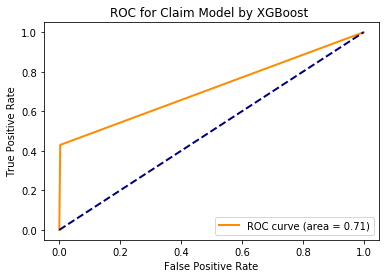

In [104]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr,tpr,'darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Claim Model by XGBoost ')
plt.legend(loc="lower right")

In [98]:
xgb.score(X_test1,y_test1)

0.94343308764763345

In [99]:
xgb.score(X_train1,y_train1)

0.95651842971589507

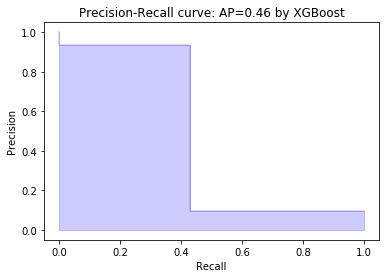

In [106]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f} by XGBoost'.format(average_precision))

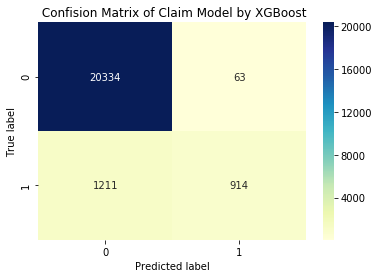

In [107]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test1,pred )
import seaborn as sn
# df_cm = pd.DataFrame(cnf_matrix)
sn.heatmap(cnf_matrix,annot=True, fmt="d", cmap="YlGnBu",linecolor='r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(' Confision Matrix of Claim Model by XGBoost')

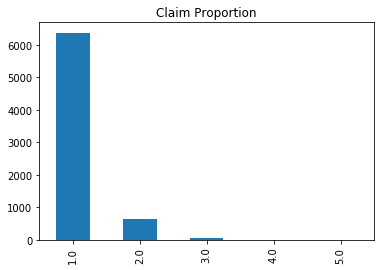

In [89]:
import matplotlib.pyplot as plt
Train1.Claim_Count.value_counts().plot.bar(title='Claim Proportion')
plt.show()

In [3]:
#GBDT
y_test_pred = gb_clf.predict(X_test_unproc)
from sklearn.metrics import classification_report
print (classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97     27207
          1       0.99      0.40      0.57      2823

avg / total       0.95      0.94      0.93     30030



In [17]:
from sklearn.externals import joblib
# joblib.dump(gb_clf, "claim_model_gb0.m")

In [18]:
gb=joblib.load('claim_model_gb0.m')

In [23]:
pred = gb.predict(X_test_unproc)

In [29]:
# y_test_pred = gb_clf.predict(X_test_unproc)
from sklearn.metrics import classification_report
print (classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97     27190
          1       0.99      0.41      0.58      2840

avg / total       0.95      0.94      0.93     30030



In [28]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test1,pred)
metrics.auc(fpr, tpr)

0.70531063356971546

In [41]:
gb.score(X_test_unproc,y_test)

0.94402264402264402

In [42]:
gb.score(X_train_unproc,y_train)

0.94405346002708523

In [65]:
tpr

array([ 0.        ,  0.41091549,  1.        ])

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[27182     8]
 [ 1673  1167]]


In [51]:
# # Compute ROC curve and ROC area for each class
# from sklearn.metrics import roc_curve, auc
# fpr = []
# tpr = []
# roc_auc = []
# for i in range(len(y_test)):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:,i], pred[:,i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred.ravel())
# # roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

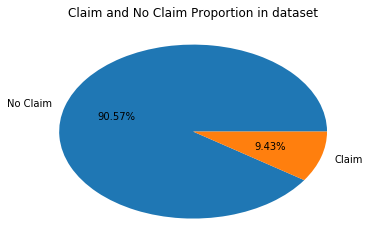

In [42]:
x=Train1.ClaimHappen.value_counts()

labels=['No Claim','Claim']
plt.pie(x,labels=labels,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）


# plt.pie(x,explode=None, labels=labels,
#     colors=('b',  'r'),
#     autopct='%1.2f%%', pctdistance=0.5, shadow=False,
#     labeldistance=1, startangle=None, radius=2,
#     counterclock=True, wedgeprops=None, textprops=None,
#     center = (0, 0), frame = False )

plt.title("Claim and No Claim Proportion in dataset")

plt.show()  
plt.savefig("PieChart1.jpg")

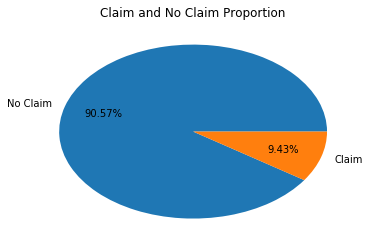

In [45]:
x=Train1.ClaimHappen.value_counts()

labels=['No Claim','Claim']
plt.pie(x,labels=labels,autopct='%1.2f%%',pctdistance=0.7) #画饼图（数据，数据对应的标签，百分数保留两位小数点）


# plt.pie(x,explode=None, labels=labels,
#     colors=('b',  'r'),
#     autopct='%1.2f%%', pctdistance=0.5, shadow=False,
#     labeldistance=1, startangle=None, radius=2,
#     counterclock=True, wedgeprops=None, textprops=None,
#     center = (0, 0), frame = False )

plt.title("Claim and No Claim Proportion")

plt.show()  
plt.savefig("PieChart2.jpg")

In [ ]:
x=Train1.Claim_Count.value_counts()

# labels=['No Claim','Claim']
plt.pie(x,labels=None,autopct='%1.2f%%',pctdistance=0.7) #画饼图（数据，数据对应的标签，百分数保留两位小数点）


# plt.pie(x,explode=None, labels=labels,
#     colors=('b',  'r'),
#     autopct='%1.2f%%', pctdistance=0.5, shadow=False,
#     labeldistance=1, startangle=None, radius=2,
#     counterclock=True, wedgeprops=None, textprops=None,
#     center = (0, 0), frame = False )

plt.title("Claim and No Claim Proportion")

plt.show()  
plt.savefig("PieChart2.jpg")

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=10,max_depth=10,splitter='random')
clf = clf.fit(X_train_unproc,y_train)

In [10]:
y_test_pred = clf.predict(X_test_unproc)
from sklearn.metrics import classification_report
print (classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97     20403
          1       0.94      0.45      0.61      2119

avg / total       0.95      0.95      0.94     22522



In [11]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
metrics.auc(fpr, tpr)

0.72276548732284673

In [12]:
clf.score(X_test_unproc,y_test)

0.94556433709262055

In [13]:
clf.score(X_train_unproc,y_train)

0.94489162908412783

In [17]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
df = pd.DataFrame(y_test_pred,columns=['ClaimHappen'])

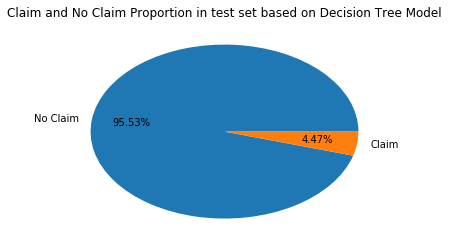

In [46]:
import matplotlib.pyplot as plt
x=df.ClaimHappen.value_counts()
labels=['No Claim','Claim']
plt.pie(x,labels=labels,autopct='%1.2f%%',pctdistance=0.7) #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Claim and No Claim Proportion in test set based on Decision Tree Model")
plt.show()  
# plt.savefig("claim树.jpg")

In [28]:
pro_clf = clf.predict_proba(X_test_unproc)

In [30]:
pro_clf 

array([[ 1.        ,  0.        ],
       [ 0.94309287,  0.05690713],
       [ 1.        ,  0.        ],
       ..., 
       [ 0.93873874,  0.06126126],
       [ 0.94309287,  0.05690713],
       [ 0.94309287,  0.05690713]])

In [34]:
df_pro = pd.DataFrame(pro_clf,columns=['No Claim','Claim'])

In [36]:
df_pro.head()

,No Claim,Claim
0,1.000000,0.000000
1,0.943093,0.056907
2,1.000000,0.000000
3,0.943093,0.056907
4,0.943093,0.056907


In [38]:
from sklearn.externals import joblib
joblib.dump(clf, "claim_model_tree.m")

['claim_model_tree.m']

In [39]:
tree=joblib.load('claim_model_tree.m')

In [48]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test,y_test_pred)

0.13018382026463013

In [49]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_test, y_test_pred)

0.13018382026463013

In [ ]:
n_estimators=10,max_depth=10,min_samples_split=10,min_samples_leaf=3

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 100)
# X_new = pca.fit_transform(X)

In [86]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(oob_score=True,random_state=10)
random_clf.fit(X_train_unproc,y_train)

/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/wujiexi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

In [87]:
y_test_pred = random_clf.predict(X_test_unproc)
from sklearn.metrics import classification_report
print (classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     20403
          1       0.93      0.14      0.25      2119

avg / total       0.92      0.92      0.89     22522

